# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 23:51:37.655440: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T23:51:41.056133
2025-04-14 23:51:41.056133


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 23:51:35"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

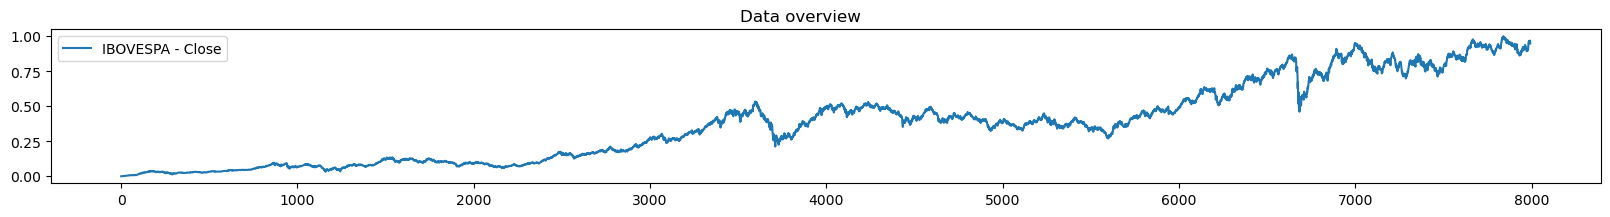

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

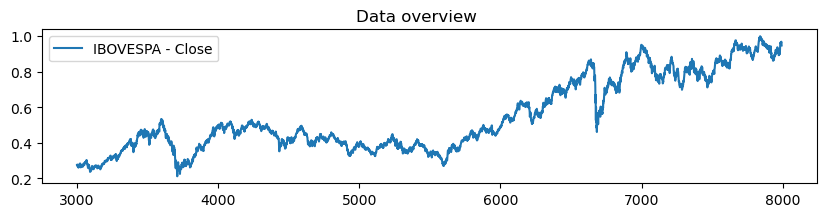

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

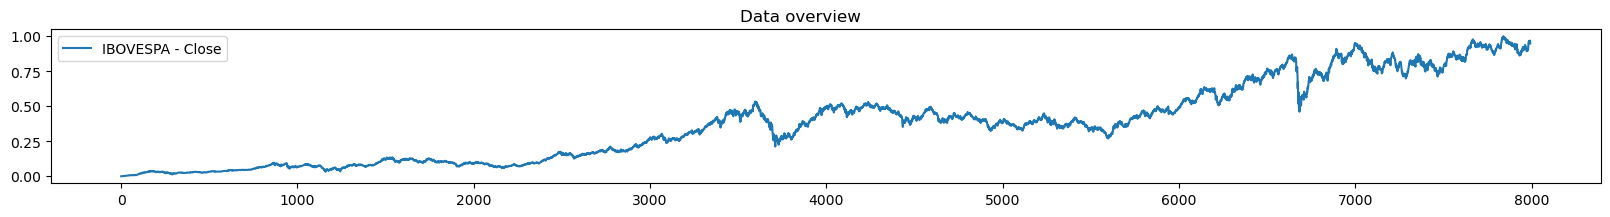

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

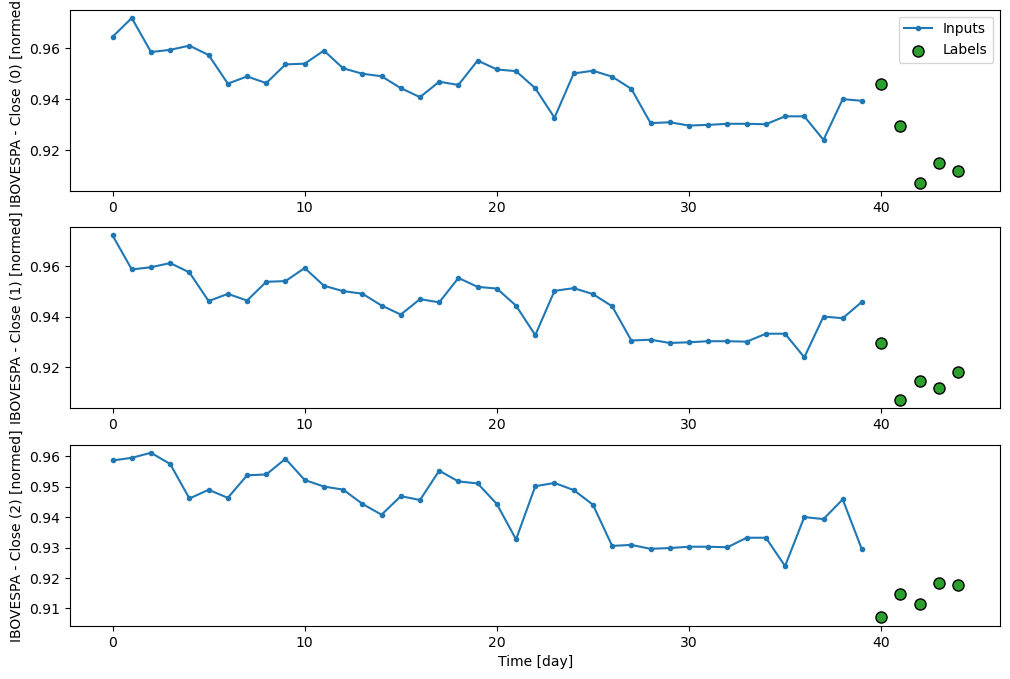

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

1

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9:50 3s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 56.1726 - mean_squared_error: 3.7771e-05 - root_mean_squared_error: 0.0061 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 45.4131 - mean_squared_error: 3.9126e-05 - root_mean_squared_error: 0.0062

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 41.4032 - mean_squared_error: 4.4058e-05 - root_mean_squared_error: 0.0066

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 38.3043 - mean_squared_error: 4.5377e-05 - root_mean_squared_error: 0.0067

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 35.6238 - mean_squared_error: 4.5021e-05 - root_mean_squared_error: 0.0067

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 33.4714 - mean_squared_error: 4.5855e-05 - root_mean_squared_error: 0.0067

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 31.9521 - mean_squared_error: 5.4611e-05 - root_mean_squared_error: 0.0072

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 30.9143 - mean_squared_error: 6.9123e-05 - root_mean_squared_error: 0.0080

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 29.9994 - mean_squared_error: 7.9892e-05 - root_mean_squared_error: 0.0085

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 29.2598 - mean_squared_error: 8.9278e-05 - root_mean_squared_error: 0.0090

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 28.7502 - mean_squared_error: 9.5301e-05 - root_mean_squared_error: 0.0093

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 28.2823 - mean_squared_error: 1.0177e-04 - root_mean_squared_error: 0.0096

 50/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 27.8329 - mean_squared_error: 1.0800e-04 - root_mean_squared_error: 0.0099

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 27.3899 - mean_squared_error: 1.1320e-04 - root_mean_squared_error: 0.0101

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.9624 - mean_squared_error: 1.1769e-04 - root_mean_squared_error: 0.0103

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 26.5474 - mean_squared_error: 1.2146e-04 - root_mean_squared_error: 0.0105

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 26.1595 - mean_squared_error: 1.2487e-04 - root_mean_squared_error: 0.0107

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 25.7891 - mean_squared_error: 1.2780e-04 - root_mean_squared_error: 0.0108

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 25.4648 - mean_squared_error: 1.3076e-04 - root_mean_squared_error: 0.0109

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 25.1569 - mean_squared_error: 1.3337e-04 - root_mean_squared_error: 0.0111

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 24.8831 - mean_squared_error: 1.3646e-04 - root_mean_squared_error: 0.0112

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 24.6598 - mean_squared_error: 1.4308e-04 - root_mean_squared_error: 0.0114

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 24.4752 - mean_squared_error: 1.5335e-04 - root_mean_squared_error: 0.0118

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 24.2964 - mean_squared_error: 1.6310e-04 - root_mean_squared_error: 0.0121

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 24.1129 - mean_squared_error: 1.7182e-04 - root_mean_squared_error: 0.0124

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 23.9248 - mean_squared_error: 1.7962e-04 - root_mean_squared_error: 0.0126

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 23.6784 - mean_squared_error: 1.8967e-04 - root_mean_squared_error: 0.0130

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 23.4458 - mean_squared_error: 2.0123e-04 - root_mean_squared_error: 0.0133

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 23.2251 - mean_squared_error: 2.1435e-04 - root_mean_squared_error: 0.0137

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 23.0246 - mean_squared_error: 2.3312e-04 - root_mean_squared_error: 0.0142

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 22.8275 - mean_squared_error: 2.5289e-04 - root_mean_squared_error: 0.0147

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 22.6795 - mean_squared_error: 2.6725e-04 - root_mean_squared_error: 0.0151

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 22.5437 - mean_squared_error: 2.8754e-04 - root_mean_squared_error: 0.0155

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 22.4093 - mean_squared_error: 3.3646e-04 - root_mean_squared_error: 0.0164

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 22.2846 - mean_squared_error: 3.8705e-04 - root_mean_squared_error: 0.0173

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 22.1797 - mean_squared_error: 4.5487e-04 - root_mean_squared_error: 0.0183

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 22.0838 - mean_squared_error: 5.2846e-04 - root_mean_squared_error: 0.0194

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 22.0124 - mean_squared_error: 5.8237e-04 - root_mean_squared_error: 0.0202

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 21.9426 - mean_squared_error: 6.3557e-04 - root_mean_squared_error: 0.0209

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 21.8472 - mean_squared_error: 7.0211e-04 - root_mean_squared_error: 0.0219

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 21.7539 - mean_squared_error: 7.6700e-04 - root_mean_squared_error: 0.0228

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 21.6580 - mean_squared_error: 8.2749e-04 - root_mean_squared_error: 0.0237

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 21.5606 - mean_squared_error: 8.8414e-04 - root_mean_squared_error: 0.0245

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 21.4699 - mean_squared_error: 9.4016e-04 - root_mean_squared_error: 0.0253

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 21.3797 - mean_squared_error: 9.9273e-04 - root_mean_squared_error: 0.0260

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 21.2897 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0267    

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 21.1975 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0274

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 21.1046 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0280

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 21.0154 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0286

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 20.9264 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0292

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 20.8416 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0297

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 20.7598 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0303

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 20.6807 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0308

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 20.6018 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0314

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 20.5217 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0319

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 20.4402 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 20.3591 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0328

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 20.2823 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0333

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 20.2071 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0339

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 20.1357 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0345

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 20.0634 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0350

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 19.9908 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0356

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 19.9356 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0360

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 19.8984 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0362

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 19.8615 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0365

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 19.8250 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0367 - val_loss: 0.1216 - val_mean_absolute_error: 0.1216 - val_mean_absolute_percentage_error: 12.9393 - val_mean_squared_error: 0.0154 - val_root_mean_squared_error: 0.1242 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.5850 - mean_absolute_error: 0.5850 - mean_absolute_percentage_error: 7860.4531 - mean_squared_error: 0.3423 - root_mean_squared_error: 0.5850

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5803 - mean_absolute_error: 0.5803 - mean_absolute_percentage_error: 5579.1948 - mean_squared_error: 0.3368 - root_mean_squared_error: 0.5803

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5678 - mean_absolute_error: 0.5678 - mean_absolute_percentage_error: 4530.0254 - mean_squared_error: 0.3232 - root_mean_squared_error: 0.5683

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5536 - mean_absolute_error: 0.5536 - mean_absolute_percentage_error: 3982.9001 - mean_squared_error: 0.3157 - root_mean_squared_error: 0.5608

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5421 - mean_absolute_error: 0.5421 - mean_absolute_percentage_error: 3618.7180 - mean_squared_error: 0.3231 - root_mean_squared_error: 0.5674

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5257 - mean_absolute_error: 0.5257 - mean_absolute_percentage_error: 3325.0063 - mean_squared_error: 0.3169 - root_mean_squared_error: 0.5620

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5063 - mean_absolute_error: 0.5063 - mean_absolute_percentage_error: 3077.1484 - mean_squared_error: 0.3055 - root_mean_squared_error: 0.5513

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4858 - mean_absolute_error: 0.4858 - mean_absolute_percentage_error: 2864.1697 - mean_squared_error: 0.2925 - root_mean_squared_error: 0.5387

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4656 - mean_absolute_error: 0.4656 - mean_absolute_percentage_error: 2680.4666 - mean_squared_error: 0.2794 - root_mean_squared_error: 0.5255

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4463 - mean_absolute_error: 0.4463 - mean_absolute_percentage_error: 2520.5435 - mean_squared_error: 0.2670 - root_mean_squared_error: 0.5125

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4282 - mean_absolute_error: 0.4282 - mean_absolute_percentage_error: 2380.4797 - mean_squared_error: 0.2553 - root_mean_squared_error: 0.5000

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4114 - mean_absolute_error: 0.4114 - mean_absolute_percentage_error: 2256.7048 - mean_squared_error: 0.2446 - root_mean_squared_error: 0.4881

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3958 - mean_absolute_error: 0.3958 - mean_absolute_percentage_error: 2146.4612 - mean_squared_error: 0.2346 - root_mean_squared_error: 0.4768

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3813 - mean_absolute_error: 0.3813 - mean_absolute_percentage_error: 2047.5872 - mean_squared_error: 0.2255 - root_mean_squared_error: 0.4662

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3679 - mean_absolute_error: 0.3679 - mean_absolute_percentage_error: 1958.4036 - mean_squared_error: 0.2170 - root_mean_squared_error: 0.4563

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3554 - mean_absolute_error: 0.3554 - mean_absolute_percentage_error: 1877.5269 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4469

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3438 - mean_absolute_error: 0.3438 - mean_absolute_percentage_error: 1803.8339 - mean_squared_error: 0.2020 - root_mean_squared_error: 0.4380

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3330 - mean_absolute_error: 0.3330 - mean_absolute_percentage_error: 1736.4274 - mean_squared_error: 0.1953 - root_mean_squared_error: 0.4297

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3230 - mean_absolute_error: 0.3230 - mean_absolute_percentage_error: 1674.5255 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.4218

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3137 - mean_absolute_error: 0.3137 - mean_absolute_percentage_error: 1617.4348 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.4143

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1564.5957 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.4073

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 1515.5485 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.4006

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1469.8531 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3942

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2822 - mean_absolute_error: 0.2822 - mean_absolute_percentage_error: 1427.1729 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3881

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1387.2096 - mean_squared_error: 0.1593 - root_mean_squared_error: 0.3823

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1349.6917 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3768

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 1314.3921 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3715

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 1281.1182 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3664

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2520 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 1249.6884 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3616

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2470 - mean_absolute_error: 0.2470 - mean_absolute_percentage_error: 1219.9835 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3570

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1198.7621 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3537

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1171.7355 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3494

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1146.0540 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3453

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1121.6146 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3414

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 1098.3217 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3376

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2234 - mean_absolute_error: 0.2234 - mean_absolute_percentage_error: 1076.0991 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3340

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 1054.8721 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3304

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 1034.5670 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3270

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1015.1214 - mean_squared_error: 0.1193 - root_mean_squared_error: 0.3237

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 996.4803 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3205 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 978.5921 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3174

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 961.4117 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.3144

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 944.8957 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.3115

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 929.0043 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.3086

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 917.4766 - mean_squared_error: 0.1085 - root_mean_squared_error: 0.3066

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1950 - mean_absolute_error: 0.1950 - mean_absolute_percentage_error: 906.2664 - mean_squared_error: 0.1073 - root_mean_squared_error: 0.3045

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1931 - mean_absolute_error: 0.1931 - mean_absolute_percentage_error: 895.3612 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.3026

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1913 - mean_absolute_error: 0.1913 - mean_absolute_percentage_error: 884.7494 - mean_squared_error: 0.1049 - root_mean_squared_error: 0.3006

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 871.0345 - mean_squared_error: 0.1034 - root_mean_squared_error: 0.2981

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 857.7911 - mean_squared_error: 0.1019 - root_mean_squared_error: 0.2956

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 844.9927 - mean_squared_error: 0.1005 - root_mean_squared_error: 0.2932

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 832.6149 - mean_squared_error: 0.0991 - root_mean_squared_error: 0.2909

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1805 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 820.6360 - mean_squared_error: 0.0977 - root_mean_squared_error: 0.2886

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1785 - mean_absolute_error: 0.1785 - mean_absolute_percentage_error: 809.0366 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2864

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1766 - mean_absolute_error: 0.1766 - mean_absolute_percentage_error: 797.8042 - mean_squared_error: 0.0952 - root_mean_squared_error: 0.2843

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1753 - mean_absolute_error: 0.1753 - mean_absolute_percentage_error: 789.6077 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2827

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1739 - mean_absolute_error: 0.1739 - mean_absolute_percentage_error: 781.5980 - mean_squared_error: 0.0934 - root_mean_squared_error: 0.2812

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1726 - mean_absolute_error: 0.1726 - mean_absolute_percentage_error: 773.7689 - mean_squared_error: 0.0925 - root_mean_squared_error: 0.2797

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1709 - mean_absolute_error: 0.1709 - mean_absolute_percentage_error: 763.5995 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2777

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1697 - mean_absolute_error: 0.1697 - mean_absolute_percentage_error: 756.1669 - mean_squared_error: 0.0905 - root_mean_squared_error: 0.2762

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1681 - mean_absolute_error: 0.1681 - mean_absolute_percentage_error: 746.5049 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2743

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1669 - mean_absolute_error: 0.1669 - mean_absolute_percentage_error: 739.4375 - mean_squared_error: 0.0886 - root_mean_squared_error: 0.2730

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1658 - mean_absolute_error: 0.1658 - mean_absolute_percentage_error: 732.5267 - mean_squared_error: 0.0879 - root_mean_squared_error: 0.2716 - val_loss: 0.0433 - val_mean_absolute_error: 0.0433 - val_mean_absolute_percentage_error: 4.5742 - val_mean_squared_error: 0.0023 - val_root_mean_squared_error: 0.0478 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.4428 - mean_absolute_error: 0.4428 - mean_absolute_percentage_error: 5948.2715 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4428

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.4414 - mean_absolute_error: 0.4414 - mean_absolute_percentage_error: 4556.8350 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4414 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4391 - mean_absolute_error: 0.4391 - mean_absolute_percentage_error: 3959.5911 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4391

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.4341 - mean_absolute_error: 0.4341 - mean_absolute_percentage_error: 3443.2141 - mean_squared_error: 0.1887 - root_mean_squared_error: 0.4343

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.4265 - mean_absolute_error: 0.4265 - mean_absolute_percentage_error: 3120.4529 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.4271

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.4143 - mean_absolute_error: 0.4143 - mean_absolute_percentage_error: 2868.4116 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.4170

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.4156 - mean_absolute_error: 0.4156 - mean_absolute_percentage_error: 2756.6997 - mean_squared_error: 0.1864 - root_mean_squared_error: 0.4298

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.4147 - mean_absolute_error: 0.4147 - mean_absolute_percentage_error: 2654.4600 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4380

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.4105 - mean_absolute_error: 0.4105 - mean_absolute_percentage_error: 2514.8020 - mean_squared_error: 0.1993 - root_mean_squared_error: 0.4441

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.4043 - mean_absolute_error: 0.4043 - mean_absolute_percentage_error: 2389.2756 - mean_squared_error: 0.2004 - root_mean_squared_error: 0.4455

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.3963 - mean_absolute_error: 0.3963 - mean_absolute_percentage_error: 2274.6907 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4441

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.3877 - mean_absolute_error: 0.3877 - mean_absolute_percentage_error: 2170.7688 - mean_squared_error: 0.1960 - root_mean_squared_error: 0.4409

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.3785 - mean_absolute_error: 0.3785 - mean_absolute_percentage_error: 2076.0122 - mean_squared_error: 0.1923 - root_mean_squared_error: 0.4367

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.3723 - mean_absolute_error: 0.3723 - mean_absolute_percentage_error: 2017.6357 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.4334

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.3629 - mean_absolute_error: 0.3629 - mean_absolute_percentage_error: 1936.3607 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.4283

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.3538 - mean_absolute_error: 0.3538 - mean_absolute_percentage_error: 1861.9285 - mean_squared_error: 0.1810 - root_mean_squared_error: 0.4229

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.3478 - mean_absolute_error: 0.3478 - mean_absolute_percentage_error: 1815.6608 - mean_squared_error: 0.1781 - root_mean_squared_error: 0.4192

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3449 - mean_absolute_error: 0.3449 - mean_absolute_percentage_error: 1793.4595 - mean_squared_error: 0.1766 - root_mean_squared_error: 0.4174

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3420 - mean_absolute_error: 0.3420 - mean_absolute_percentage_error: 1771.8401 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.4155

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3391 - mean_absolute_error: 0.3391 - mean_absolute_percentage_error: 1750.7820 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.4137

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3363 - mean_absolute_error: 0.3363 - mean_absolute_percentage_error: 1730.2642 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.4119

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 1710.2678 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.4100

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.3307 - mean_absolute_error: 0.3307 - mean_absolute_percentage_error: 1690.7721 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.4082

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3280 - mean_absolute_error: 0.3280 - mean_absolute_percentage_error: 1671.7612 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.4064

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3253 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 1653.2206 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.4046

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3174 - mean_absolute_error: 0.3174 - mean_absolute_percentage_error: 1600.2373 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3993

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3149 - mean_absolute_error: 0.3149 - mean_absolute_percentage_error: 1583.4028 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3976

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3124 - mean_absolute_error: 0.3124 - mean_absolute_percentage_error: 1566.9583 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3958

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3051 - mean_absolute_error: 0.3051 - mean_absolute_percentage_error: 1519.8384 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3907

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2981 - mean_absolute_error: 0.2981 - mean_absolute_percentage_error: 1475.8030 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3858

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2915 - mean_absolute_error: 0.2915 - mean_absolute_percentage_error: 1434.5647 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3810

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2852 - mean_absolute_error: 0.2852 - mean_absolute_percentage_error: 1395.8715 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3763

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1371.3717 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3733

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1347.8300 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3704

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1314.1746 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3660

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1282.3586 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3618

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1252.2329 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3578

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1223.6619 - mean_squared_error: 0.1314 - root_mean_squared_error: 0.3539

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1187.7791 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3488

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1154.1985 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3440

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1130.3896 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3405

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 1107.6699 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3371

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2317 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 1085.9587 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3338

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1065.1891 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3306

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 1045.2976 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3275

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 1026.2285 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3245

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1007.9302 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3215

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 990.3610 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.3187 

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 973.4731 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.3159

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 957.2333 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.3132

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 941.6046 - mean_squared_error: 0.1045 - root_mean_squared_error: 0.3106

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2031 - mean_absolute_error: 0.2031 - mean_absolute_percentage_error: 926.5460 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.3081

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 912.0206 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.3056

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 898.0015 - mean_squared_error: 0.1002 - root_mean_squared_error: 0.3032

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1949 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 880.0527 - mean_squared_error: 0.0984 - root_mean_squared_error: 0.3001

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 862.8972 - mean_squared_error: 0.0967 - root_mean_squared_error: 0.2971

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 846.4812 - mean_squared_error: 0.0951 - root_mean_squared_error: 0.2942

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 834.6238 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.2920

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 823.1357 - mean_squared_error: 0.0927 - root_mean_squared_error: 0.2899

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 812.0017 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2879

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 801.2030 - mean_squared_error: 0.0905 - root_mean_squared_error: 0.2859

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 790.7237 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2840

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 780.5505 - mean_squared_error: 0.0884 - root_mean_squared_error: 0.2821

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1754 - mean_absolute_error: 0.1754 - mean_absolute_percentage_error: 770.6678 - mean_squared_error: 0.0873 - root_mean_squared_error: 0.2802

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1736 - mean_absolute_error: 0.1736 - mean_absolute_percentage_error: 761.0628 - mean_squared_error: 0.0864 - root_mean_squared_error: 0.2784

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1720 - mean_absolute_error: 0.1720 - mean_absolute_percentage_error: 751.7261 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2766

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1703 - mean_absolute_error: 0.1703 - mean_absolute_percentage_error: 742.6454 - mean_squared_error: 0.0845 - root_mean_squared_error: 0.2748

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 733.8088 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2731

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 728.0491 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2720

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1667 - mean_absolute_error: 0.1667 - mean_absolute_percentage_error: 722.3909 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2709

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1652 - mean_absolute_error: 0.1652 - mean_absolute_percentage_error: 714.0870 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2692

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 705.9949 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2676

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - mean_absolute_percentage_error: 695.5202 - mean_squared_error: 0.0795 - root_mean_squared_error: 0.2655

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1599 - mean_absolute_error: 0.1599 - mean_absolute_percentage_error: 685.3897 - mean_squared_error: 0.0785 - root_mean_squared_error: 0.2635

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1581 - mean_absolute_error: 0.1581 - mean_absolute_percentage_error: 675.5857 - mean_squared_error: 0.0775 - root_mean_squared_error: 0.2615

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1564 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 666.0914 - mean_squared_error: 0.0765 - root_mean_squared_error: 0.2595

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1547 - mean_absolute_error: 0.1547 - mean_absolute_percentage_error: 656.8939 - mean_squared_error: 0.0755 - root_mean_squared_error: 0.2576

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 647.9792 - mean_squared_error: 0.0745 - root_mean_squared_error: 0.2558

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 641.4704 - mean_squared_error: 0.0739 - root_mean_squared_error: 0.2544

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 633.0184 - mean_squared_error: 0.0730 - root_mean_squared_error: 0.2527

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - mean_absolute_percentage_error: 624.8130 - mean_squared_error: 0.0721 - root_mean_squared_error: 0.2509

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1475 - mean_absolute_error: 0.1475 - mean_absolute_percentage_error: 616.8430 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2492

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 609.0976 - mean_squared_error: 0.0704 - root_mean_squared_error: 0.2476

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 601.5692 - mean_squared_error: 0.0696 - root_mean_squared_error: 0.2460

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.1445 - mean_absolute_error: 0.1445 - mean_absolute_percentage_error: 599.7240 - mean_squared_error: 0.0694 - root_mean_squared_error: 0.2456 - val_loss: 0.0179 - val_mean_absolute_error: 0.0179 - val_mean_absolute_percentage_error: 1.8922 - val_mean_squared_error: 5.1379e-04 - val_root_mean_squared_error: 0.0227 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 4008.2339 - mean_squared_error: 0.0890 - root_mean_squared_error: 0.2984

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 3048.5747 - mean_squared_error: 0.0861 - root_mean_squared_error: 0.2934 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2850 - mean_absolute_error: 0.2850 - mean_absolute_percentage_error: 2485.7634 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2854

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2693 - mean_absolute_error: 0.2693 - mean_absolute_percentage_error: 2086.7646 - mean_squared_error: 0.0741 - root_mean_squared_error: 0.2714

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 1813.0922 - mean_squared_error: 0.0664 - root_mean_squared_error: 0.2557

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - mean_absolute_percentage_error: 1616.0431 - mean_squared_error: 0.0602 - root_mean_squared_error: 0.2424

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 1463.0336 - mean_squared_error: 0.0551 - root_mean_squared_error: 0.2307

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2046 - mean_absolute_error: 0.2046 - mean_absolute_percentage_error: 1339.7019 - mean_squared_error: 0.0508 - root_mean_squared_error: 0.2205

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1961 - mean_absolute_error: 0.1961 - mean_absolute_percentage_error: 1261.6664 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.2137

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 1193.2560 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2075

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1789 - mean_absolute_error: 0.1789 - mean_absolute_percentage_error: 1114.2579 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.2000

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 1046.3505 - mean_squared_error: 0.0402 - root_mean_squared_error: 0.1932

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1629 - mean_absolute_error: 0.1629 - mean_absolute_percentage_error: 987.2214 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1872 

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1577 - mean_absolute_error: 0.1577 - mean_absolute_percentage_error: 947.6077 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1830

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 900.0529 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1778

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 857.5958 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1731

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1401 - mean_absolute_error: 0.1401 - mean_absolute_percentage_error: 819.4318 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 784.9189 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1647

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1306 - mean_absolute_error: 0.1306 - mean_absolute_percentage_error: 753.5386 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1610

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 724.8663 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1575

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 698.5480 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1542

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 674.2956 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1512

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 651.8657 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1483

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 631.0522 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1456

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 611.6807 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1430

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 593.6003 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1406

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 576.6815 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1383

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 560.8110 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1361

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 545.8911 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1340

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 531.8359 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1321

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 518.5719 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1302

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 506.0324 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1284

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 494.1564 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1266

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 482.8895 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1250

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 472.1843 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1234

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 461.9976 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1219

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 452.2921 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1204

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 443.0329 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1190

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 434.1881 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1177

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 427.8091 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1167

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 419.6226 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1154

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 411.7787 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1142

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 404.2552 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1130

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 397.0331 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1118

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 390.0933 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1107

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 383.4192 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1096

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 376.9958 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1086

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 370.8084 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1076

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 364.8438 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1066

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 359.0896 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1056

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 353.5347 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1047

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 348.1686 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1038

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 342.9811 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1029

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 337.9629 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1021

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 333.1066 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1012

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 328.4037 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1004

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 323.8467 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.0997

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 320.5208 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.0991

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 316.2030 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0984

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 313.0489 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0978

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 308.9511 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0971

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 304.9722 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0964

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 303.9972 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0962 - val_loss: 0.0285 - val_mean_absolute_error: 0.0285 - val_mean_absolute_percentage_error: 3.0218 - val_mean_squared_error: 9.8660e-04 - val_root_mean_squared_error: 0.0314 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 1257.4071 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0938

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 866.7205 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0878  

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 704.7822 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0812

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 604.4773 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 517.9208 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 456.6350 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0657

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 410.3267 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0621

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 382.0878 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0598

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 357.9866 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0577

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 337.1440 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0558

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 318.9006 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0541

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 302.8040 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0526

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 288.4700 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0512

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 275.6062 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0499

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 260.3618 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0483

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 246.9261 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0469

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 234.9800 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 226.8508 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 216.9661 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 208.0256 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 201.8608 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 194.2647 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 187.2944 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 180.8753 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 174.9389 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 169.4303 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 164.3025 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 160.6824 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 157.2394 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 155.0354 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 152.9003 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 149.8202 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 147.8440 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 145.9262 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 143.1532 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 140.4997 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 137.9561 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 135.5148 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 133.1693 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 130.9137 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 128.7427 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 126.6514 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 124.6354 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 122.6910 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 120.8140 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 118.4103 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 116.1119 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 114.4533 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 113.3769 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 111.8043 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 110.2803 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 109.2902 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 108.3202 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 107.3695 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 105.9781 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 104.6271 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 103.3147 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 102.0390 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 100.7984 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 99.5915 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286 

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 98.4167 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 97.2728 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 96.1586 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 95.0732 - mean_squared_error: 9.9521e-04 - root_mean_squared_error: 0.0280

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 94.0151 - mean_squared_error: 9.8532e-04 - root_mean_squared_error: 0.0278

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 93.3244 - mean_squared_error: 9.7889e-04 - root_mean_squared_error: 0.0278

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 92.3095 - mean_squared_error: 9.6946e-04 - root_mean_squared_error: 0.0276

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 91.3200 - mean_squared_error: 9.6074e-04 - root_mean_squared_error: 0.0275

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 90.3543 - mean_squared_error: 9.5229e-04 - root_mean_squared_error: 0.0274

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 89.4117 - mean_squared_error: 9.4427e-04 - root_mean_squared_error: 0.0273

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 88.4912 - mean_squared_error: 9.3651e-04 - root_mean_squared_error: 0.0271

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 87.5922 - mean_squared_error: 9.2918e-04 - root_mean_squared_error: 0.0271

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 86.7139 - mean_squared_error: 9.2213e-04 - root_mean_squared_error: 0.0270

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 85.8554 - mean_squared_error: 9.1534e-04 - root_mean_squared_error: 0.0269

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 85.0160 - mean_squared_error: 9.0878e-04 - root_mean_squared_error: 0.0268

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 84.1952 - mean_squared_error: 9.0246e-04 - root_mean_squared_error: 0.0267

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 83.1293 - mean_squared_error: 8.9437e-04 - root_mean_squared_error: 0.0266 - val_loss: 0.0185 - val_mean_absolute_error: 0.0185 - val_mean_absolute_percentage_error: 1.9560 - val_mean_squared_error: 5.1840e-04 - val_root_mean_squared_error: 0.0228 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 639.6124 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0498

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 467.7467 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0459 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 366.0948 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 314.9770 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 281.0934 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0375

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 255.8531 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 236.0852 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 219.7510 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 205.9355 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 194.0007 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 183.5885 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 174.3946 - mean_squared_error: 9.7620e-04 - root_mean_squared_error: 0.0305

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 163.6968 - mean_squared_error: 9.2320e-04 - root_mean_squared_error: 0.0295

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 156.6256 - mean_squared_error: 8.8744e-04 - root_mean_squared_error: 0.0289

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 148.2261 - mean_squared_error: 8.4430e-04 - root_mean_squared_error: 0.0281

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 140.8116 - mean_squared_error: 8.0592e-04 - root_mean_squared_error: 0.0274

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 134.2076 - mean_squared_error: 7.7144e-04 - root_mean_squared_error: 0.0267

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 129.7090 - mean_squared_error: 7.4778e-04 - root_mean_squared_error: 0.0263

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 124.2312 - mean_squared_error: 7.1873e-04 - root_mean_squared_error: 0.0257

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 120.4697 - mean_squared_error: 6.9867e-04 - root_mean_squared_error: 0.0253

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 115.8609 - mean_squared_error: 6.7397e-04 - root_mean_squared_error: 0.0248

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 111.6638 - mean_squared_error: 6.5135e-04 - root_mean_squared_error: 0.0243

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 108.7464 - mean_squared_error: 6.3556e-04 - root_mean_squared_error: 0.0240

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 106.0024 - mean_squared_error: 6.2067e-04 - root_mean_squared_error: 0.0237

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 103.4168 - mean_squared_error: 6.0668e-04 - root_mean_squared_error: 0.0234

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 100.9745 - mean_squared_error: 5.9345e-04 - root_mean_squared_error: 0.0231

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 98.6620 - mean_squared_error: 5.8089e-04 - root_mean_squared_error: 0.0228 

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 95.7636 - mean_squared_error: 5.6516e-04 - root_mean_squared_error: 0.0225

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 93.7164 - mean_squared_error: 5.5406e-04 - root_mean_squared_error: 0.0222

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 91.7691 - mean_squared_error: 5.4359e-04 - root_mean_squared_error: 0.0220

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 89.9143 - mean_squared_error: 5.3369e-04 - root_mean_squared_error: 0.0218

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 88.1443 - mean_squared_error: 5.2429e-04 - root_mean_squared_error: 0.0216

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 86.4535 - mean_squared_error: 5.1539e-04 - root_mean_squared_error: 0.0214

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 85.3676 - mean_squared_error: 5.0975e-04 - root_mean_squared_error: 0.0213

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 84.3131 - mean_squared_error: 5.0435e-04 - root_mean_squared_error: 0.0211

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 82.7869 - mean_squared_error: 4.9668e-04 - root_mean_squared_error: 0.0210

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 81.8047 - mean_squared_error: 4.9181e-04 - root_mean_squared_error: 0.0209

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 81.3242 - mean_squared_error: 4.8951e-04 - root_mean_squared_error: 0.0208

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 80.3833 - mean_squared_error: 4.8505e-04 - root_mean_squared_error: 0.0207

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 79.4675 - mean_squared_error: 4.8073e-04 - root_mean_squared_error: 0.0206

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 78.1386 - mean_squared_error: 4.7449e-04 - root_mean_squared_error: 0.0205

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.8602 - mean_squared_error: 4.6853e-04 - root_mean_squared_error: 0.0203

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.6291 - mean_squared_error: 4.6283e-04 - root_mean_squared_error: 0.0202

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.4428 - mean_squared_error: 4.5735e-04 - root_mean_squared_error: 0.0201

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 73.2984 - mean_squared_error: 4.5208e-04 - root_mean_squared_error: 0.0200

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.1936 - mean_squared_error: 4.4697e-04 - root_mean_squared_error: 0.0199

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.1270 - mean_squared_error: 4.4208e-04 - root_mean_squared_error: 0.0198

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.4359 - mean_squared_error: 4.3892e-04 - root_mean_squared_error: 0.0197

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.0993 - mean_squared_error: 4.3282e-04 - root_mean_squared_error: 0.0196

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.1347 - mean_squared_error: 4.2842e-04 - root_mean_squared_error: 0.0195

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.2006 - mean_squared_error: 4.2416e-04 - root_mean_squared_error: 0.0194

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 66.0003 - mean_squared_error: 4.1866e-04 - root_mean_squared_error: 0.0192

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.8481 - mean_squared_error: 4.1335e-04 - root_mean_squared_error: 0.0191

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.7413 - mean_squared_error: 4.0823e-04 - root_mean_squared_error: 0.0190

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 62.6776 - mean_squared_error: 4.0333e-04 - root_mean_squared_error: 0.0189

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 61.6540 - mean_squared_error: 3.9859e-04 - root_mean_squared_error: 0.0188

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.6685 - mean_squared_error: 3.9403e-04 - root_mean_squared_error: 0.0187

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 59.7190 - mean_squared_error: 3.8965e-04 - root_mean_squared_error: 0.0186

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 59.0291 - mean_squared_error: 3.8646e-04 - root_mean_squared_error: 0.0185

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 58.1372 - mean_squared_error: 3.8236e-04 - root_mean_squared_error: 0.0184

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 57.4884 - mean_squared_error: 3.7937e-04 - root_mean_squared_error: 0.0183

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 56.8561 - mean_squared_error: 3.7647e-04 - root_mean_squared_error: 0.0182

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 56.2396 - mean_squared_error: 3.7367e-04 - root_mean_squared_error: 0.0182

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 55.6384 - mean_squared_error: 3.7099e-04 - root_mean_squared_error: 0.0181

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 55.0519 - mean_squared_error: 3.6840e-04 - root_mean_squared_error: 0.0181

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 54.4795 - mean_squared_error: 3.6591e-04 - root_mean_squared_error: 0.0180

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 53.9208 - mean_squared_error: 3.6362e-04 - root_mean_squared_error: 0.0179

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 53.3758 - mean_squared_error: 3.6172e-04 - root_mean_squared_error: 0.0179

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 52.8435 - mean_squared_error: 3.5995e-04 - root_mean_squared_error: 0.0179

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 52.3236 - mean_squared_error: 3.5839e-04 - root_mean_squared_error: 0.0178

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 51.8155 - mean_squared_error: 3.5694e-04 - root_mean_squared_error: 0.0178

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 51.3189 - mean_squared_error: 3.5564e-04 - root_mean_squared_error: 0.0178

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 50.8334 - mean_squared_error: 3.5451e-04 - root_mean_squared_error: 0.0178

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 50.5156 - mean_squared_error: 3.5379e-04 - root_mean_squared_error: 0.0178

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 50.2025 - mean_squared_error: 3.5312e-04 - root_mean_squared_error: 0.0178

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 49.8939 - mean_squared_error: 3.5250e-04 - root_mean_squared_error: 0.0177

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 49.4392 - mean_squared_error: 3.5165e-04 - root_mean_squared_error: 0.0177

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 48.9948 - mean_squared_error: 3.5093e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0163 - val_mean_absolute_error: 0.0163 - val_mean_absolute_percentage_error: 1.7311 - val_mean_squared_error: 3.8027e-04 - val_root_mean_squared_error: 0.0195 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 520.7238 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0404

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 377.4089 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 294.4378 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 252.0275 - mean_squared_error: 9.8107e-04 - root_mean_squared_error: 0.0309

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 231.4078 - mean_squared_error: 9.1263e-04 - root_mean_squared_error: 0.0297

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 215.1217 - mean_squared_error: 8.5731e-04 - root_mean_squared_error: 0.0288

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 201.6611 - mean_squared_error: 8.1052e-04 - root_mean_squared_error: 0.0279

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 185.0191 - mean_squared_error: 7.5110e-04 - root_mean_squared_error: 0.0268

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 175.7153 - mean_squared_error: 7.1742e-04 - root_mean_squared_error: 0.0261

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 167.4673 - mean_squared_error: 6.8706e-04 - root_mean_squared_error: 0.0255

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 160.1272 - mean_squared_error: 6.6011e-04 - root_mean_squared_error: 0.0250

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 153.4957 - mean_squared_error: 6.3557e-04 - root_mean_squared_error: 0.0245

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 144.7487 - mean_squared_error: 6.0390e-04 - root_mean_squared_error: 0.0238

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 137.1483 - mean_squared_error: 5.7641e-04 - root_mean_squared_error: 0.0232

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 132.6268 - mean_squared_error: 5.6019e-04 - root_mean_squared_error: 0.0229

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 128.4660 - mean_squared_error: 5.4512e-04 - root_mean_squared_error: 0.0225

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 124.6257 - mean_squared_error: 5.3114e-04 - root_mean_squared_error: 0.0222

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 121.0475 - mean_squared_error: 5.1797e-04 - root_mean_squared_error: 0.0219

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 116.1151 - mean_squared_error: 4.9960e-04 - root_mean_squared_error: 0.0215

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 111.6291 - mean_squared_error: 4.8271e-04 - root_mean_squared_error: 0.0211

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 107.5325 - mean_squared_error: 4.6722e-04 - root_mean_squared_error: 0.0208

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 103.7696 - mean_squared_error: 4.5283e-04 - root_mean_squared_error: 0.0204

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 100.3033 - mean_squared_error: 4.3948e-04 - root_mean_squared_error: 0.0201

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 97.0982 - mean_squared_error: 4.2702e-04 - root_mean_squared_error: 0.0198 

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 95.0947 - mean_squared_error: 4.1920e-04 - root_mean_squared_error: 0.0196

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 94.1301 - mean_squared_error: 4.1542e-04 - root_mean_squared_error: 0.0195

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 92.2688 - mean_squared_error: 4.0811e-04 - root_mean_squared_error: 0.0193

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 90.5000 - mean_squared_error: 4.0117e-04 - root_mean_squared_error: 0.0191

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 88.0008 - mean_squared_error: 3.9134e-04 - root_mean_squared_error: 0.0189

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 85.6722 - mean_squared_error: 3.8220e-04 - root_mean_squared_error: 0.0186

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 83.4883 - mean_squared_error: 3.7360e-04 - root_mean_squared_error: 0.0184

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.4325 - mean_squared_error: 3.6551e-04 - root_mean_squared_error: 0.0182

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 79.4942 - mean_squared_error: 3.5792e-04 - root_mean_squared_error: 0.0180

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.2607 - mean_squared_error: 3.5307e-04 - root_mean_squared_error: 0.0178

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.4916 - mean_squared_error: 3.4610e-04 - root_mean_squared_error: 0.0176

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.8138 - mean_squared_error: 3.3948e-04 - root_mean_squared_error: 0.0175

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 73.7423 - mean_squared_error: 3.3526e-04 - root_mean_squared_error: 0.0173

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 72.2012 - mean_squared_error: 3.2923e-04 - root_mean_squared_error: 0.0172

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 70.7344 - mean_squared_error: 3.2358e-04 - root_mean_squared_error: 0.0170

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 69.3373 - mean_squared_error: 3.1833e-04 - root_mean_squared_error: 0.0169

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 68.0033 - mean_squared_error: 3.1337e-04 - root_mean_squared_error: 0.0167

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.7289 - mean_squared_error: 3.0880e-04 - root_mean_squared_error: 0.0166

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.1146 - mean_squared_error: 3.0329e-04 - root_mean_squared_error: 0.0165

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.3416 - mean_squared_error: 3.0080e-04 - root_mean_squared_error: 0.0164

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.2224 - mean_squared_error: 2.9737e-04 - root_mean_squared_error: 0.0163

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.1501 - mean_squared_error: 2.9434e-04 - root_mean_squared_error: 0.0162

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.1205 - mean_squared_error: 2.9154e-04 - root_mean_squared_error: 0.0162

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.8096 - mean_squared_error: 2.8821e-04 - root_mean_squared_error: 0.0161

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.1787 - mean_squared_error: 2.8667e-04 - root_mean_squared_error: 0.0161

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.2617 - mean_squared_error: 2.8459e-04 - root_mean_squared_error: 0.0160

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.3774 - mean_squared_error: 2.8262e-04 - root_mean_squared_error: 0.0160

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.2461 - mean_squared_error: 2.8015e-04 - root_mean_squared_error: 0.0159

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.7002 - mean_squared_error: 2.7902e-04 - root_mean_squared_error: 0.0159

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.4320 - mean_squared_error: 2.7848e-04 - root_mean_squared_error: 0.0159

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.9046 - mean_squared_error: 2.7743e-04 - root_mean_squared_error: 0.0158

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.6453 - mean_squared_error: 2.7691e-04 - root_mean_squared_error: 0.0158

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.1352 - mean_squared_error: 2.7589e-04 - root_mean_squared_error: 0.0158

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.8844 - mean_squared_error: 2.7540e-04 - root_mean_squared_error: 0.0158

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.6363 - mean_squared_error: 2.7490e-04 - root_mean_squared_error: 0.0158

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.1478 - mean_squared_error: 2.7391e-04 - root_mean_squared_error: 0.0158

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 52.4342 - mean_squared_error: 2.7244e-04 - root_mean_squared_error: 0.0157

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 51.7426 - mean_squared_error: 2.7098e-04 - root_mean_squared_error: 0.0157

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 51.0719 - mean_squared_error: 2.6954e-04 - root_mean_squared_error: 0.0157

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 50.4211 - mean_squared_error: 2.6810e-04 - root_mean_squared_error: 0.0156

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 49.7894 - mean_squared_error: 2.6670e-04 - root_mean_squared_error: 0.0156

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 49.1761 - mean_squared_error: 2.6535e-04 - root_mean_squared_error: 0.0156

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 48.5802 - mean_squared_error: 2.6400e-04 - root_mean_squared_error: 0.0155

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 48.0009 - mean_squared_error: 2.6268e-04 - root_mean_squared_error: 0.0155

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 47.2535 - mean_squared_error: 2.6096e-04 - root_mean_squared_error: 0.0155

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 46.5328 - mean_squared_error: 2.5929e-04 - root_mean_squared_error: 0.0154

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 45.8373 - mean_squared_error: 2.5767e-04 - root_mean_squared_error: 0.0154

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 45.1655 - mean_squared_error: 2.5608e-04 - root_mean_squared_error: 0.0153

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 44.6764 - mean_squared_error: 2.5491e-04 - root_mean_squared_error: 0.0153

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 44.1995 - mean_squared_error: 2.5379e-04 - root_mean_squared_error: 0.0153

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 43.7343 - mean_squared_error: 2.5271e-04 - root_mean_squared_error: 0.0153

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 43.2804 - mean_squared_error: 2.5167e-04 - root_mean_squared_error: 0.0152

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 42.6919 - mean_squared_error: 2.5034e-04 - root_mean_squared_error: 0.0152

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 42.2628 - mean_squared_error: 2.4951e-04 - root_mean_squared_error: 0.0152

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 41.9826 - mean_squared_error: 2.4917e-04 - root_mean_squared_error: 0.0152

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 41.7068 - mean_squared_error: 2.4884e-04 - root_mean_squared_error: 0.0152

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 41.4352 - mean_squared_error: 2.4858e-04 - root_mean_squared_error: 0.0152

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 41.1679 - mean_squared_error: 2.4839e-04 - root_mean_squared_error: 0.0152

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 40.7744 - mean_squared_error: 2.4813e-04 - root_mean_squared_error: 0.0152

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 40.3897 - mean_squared_error: 2.4797e-04 - root_mean_squared_error: 0.0152

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 40.1381 - mean_squared_error: 2.4791e-04 - root_mean_squared_error: 0.0152

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 39.8901 - mean_squared_error: 2.4788e-04 - root_mean_squared_error: 0.0152

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 39.6456 - mean_squared_error: 2.4786e-04 - root_mean_squared_error: 0.0152

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 39.2856 - mean_squared_error: 2.4789e-04 - root_mean_squared_error: 0.0152

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 38.9332 - mean_squared_error: 2.4795e-04 - root_mean_squared_error: 0.0152

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 38.4753 - mean_squared_error: 2.4813e-04 - root_mean_squared_error: 0.0152 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0785 - val_mean_squared_error: 1.5952e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 381.8297 - mean_squared_error: 9.0553e-04 - root_mean_squared_error: 0.0301

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 270.1066 - mean_squared_error: 7.0782e-04 - root_mean_squared_error: 0.0265 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 210.3418 - mean_squared_error: 5.7589e-04 - root_mean_squared_error: 0.0237

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 188.6449 - mean_squared_error: 5.2969e-04 - root_mean_squared_error: 0.0227

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 165.3029 - mean_squared_error: 4.7485e-04 - root_mean_squared_error: 0.0214

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 144.2588 - mean_squared_error: 4.2421e-04 - root_mean_squared_error: 0.0202

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 132.3932 - mean_squared_error: 3.9362e-04 - root_mean_squared_error: 0.0194

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 122.6700 - mean_squared_error: 3.6768e-04 - root_mean_squared_error: 0.0187

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 114.4769 - mean_squared_error: 3.4528e-04 - root_mean_squared_error: 0.0181

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 107.4634 - mean_squared_error: 3.2596e-04 - root_mean_squared_error: 0.0175

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 99.5574 - mean_squared_error: 3.0409e-04 - root_mean_squared_error: 0.0169 

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 92.9082 - mean_squared_error: 2.8539e-04 - root_mean_squared_error: 0.0163

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 87.2661 - mean_squared_error: 2.6939e-04 - root_mean_squared_error: 0.0158

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 82.3871 - mean_squared_error: 2.5546e-04 - root_mean_squared_error: 0.0153

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 78.1211 - mean_squared_error: 2.4340e-04 - root_mean_squared_error: 0.0149

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 75.2529 - mean_squared_error: 2.3537e-04 - root_mean_squared_error: 0.0146

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 71.7940 - mean_squared_error: 2.2566e-04 - root_mean_squared_error: 0.0143

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 68.6929 - mean_squared_error: 2.1691e-04 - root_mean_squared_error: 0.0140

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 65.8975 - mean_squared_error: 2.0899e-04 - root_mean_squared_error: 0.0137

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 63.3668 - mean_squared_error: 2.0179e-04 - root_mean_squared_error: 0.0135

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 61.0664 - mean_squared_error: 1.9523e-04 - root_mean_squared_error: 0.0132

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 58.9579 - mean_squared_error: 1.8918e-04 - root_mean_squared_error: 0.0130

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 57.0167 - mean_squared_error: 1.8365e-04 - root_mean_squared_error: 0.0128

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 55.2256 - mean_squared_error: 1.7865e-04 - root_mean_squared_error: 0.0126

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 53.5636 - mean_squared_error: 1.7405e-04 - root_mean_squared_error: 0.0124

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 52.0169 - mean_squared_error: 1.6982e-04 - root_mean_squared_error: 0.0123

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 50.5724 - mean_squared_error: 1.6594e-04 - root_mean_squared_error: 0.0121

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 49.2204 - mean_squared_error: 1.6241e-04 - root_mean_squared_error: 0.0120

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.9506 - mean_squared_error: 1.5916e-04 - root_mean_squared_error: 0.0119

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.0478 - mean_squared_error: 1.5693e-04 - root_mean_squared_error: 0.0118

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 45.9052 - mean_squared_error: 1.5432e-04 - root_mean_squared_error: 0.0117

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.0907 - mean_squared_error: 1.5264e-04 - root_mean_squared_error: 0.0117

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.0589 - mean_squared_error: 1.5088e-04 - root_mean_squared_error: 0.0116

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 43.0832 - mean_squared_error: 1.4938e-04 - root_mean_squared_error: 0.0116

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.1572 - mean_squared_error: 1.4801e-04 - root_mean_squared_error: 0.0115

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 41.2768 - mean_squared_error: 1.4677e-04 - root_mean_squared_error: 0.0115

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.6443 - mean_squared_error: 1.4591e-04 - root_mean_squared_error: 0.0115

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.0340 - mean_squared_error: 1.4507e-04 - root_mean_squared_error: 0.0114

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.2531 - mean_squared_error: 1.4403e-04 - root_mean_squared_error: 0.0114

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.5075 - mean_squared_error: 1.4310e-04 - root_mean_squared_error: 0.0114

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.9699 - mean_squared_error: 1.4244e-04 - root_mean_squared_error: 0.0114

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.2801 - mean_squared_error: 1.4161e-04 - root_mean_squared_error: 0.0113

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.6190 - mean_squared_error: 1.4079e-04 - root_mean_squared_error: 0.0113

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.9849 - mean_squared_error: 1.4000e-04 - root_mean_squared_error: 0.0113

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.5259 - mean_squared_error: 1.3941e-04 - root_mean_squared_error: 0.0113

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.0806 - mean_squared_error: 1.3884e-04 - root_mean_squared_error: 0.0113

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 34.6486 - mean_squared_error: 1.3831e-04 - root_mean_squared_error: 0.0112

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 34.2289 - mean_squared_error: 1.3780e-04 - root_mean_squared_error: 0.0112

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.9558 - mean_squared_error: 1.3746e-04 - root_mean_squared_error: 0.0112

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.6878 - mean_squared_error: 1.3713e-04 - root_mean_squared_error: 0.0112

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.5557 - mean_squared_error: 1.3697e-04 - root_mean_squared_error: 0.0112

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.4249 - mean_squared_error: 1.3682e-04 - root_mean_squared_error: 0.0112

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.2954 - mean_squared_error: 1.3667e-04 - root_mean_squared_error: 0.0112

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.1670 - mean_squared_error: 1.3652e-04 - root_mean_squared_error: 0.0112

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.0398 - mean_squared_error: 1.3637e-04 - root_mean_squared_error: 0.0112

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 32.9137 - mean_squared_error: 1.3623e-04 - root_mean_squared_error: 0.0112

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 32.6650 - mean_squared_error: 1.3595e-04 - root_mean_squared_error: 0.0112

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 32.4207 - mean_squared_error: 1.3568e-04 - root_mean_squared_error: 0.0112

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 32.1807 - mean_squared_error: 1.3542e-04 - root_mean_squared_error: 0.0112

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.7131 - mean_squared_error: 1.3492e-04 - root_mean_squared_error: 0.0112

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.2612 - mean_squared_error: 1.3446e-04 - root_mean_squared_error: 0.0111

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 30.8244 - mean_squared_error: 1.3409e-04 - root_mean_squared_error: 0.0111

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 30.4019 - mean_squared_error: 1.3381e-04 - root_mean_squared_error: 0.0111

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 29.9929 - mean_squared_error: 1.3359e-04 - root_mean_squared_error: 0.0111

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 29.6950 - mean_squared_error: 1.3369e-04 - root_mean_squared_error: 0.0111

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 29.4043 - mean_squared_error: 1.3396e-04 - root_mean_squared_error: 0.0112

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 29.0274 - mean_squared_error: 1.3446e-04 - root_mean_squared_error: 0.0112

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 28.6618 - mean_squared_error: 1.3503e-04 - root_mean_squared_error: 0.0112

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 28.3947 - mean_squared_error: 1.3551e-04 - root_mean_squared_error: 0.0112

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 28.0479 - mean_squared_error: 1.3624e-04 - root_mean_squared_error: 0.0113

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 27.7111 - mean_squared_error: 1.3703e-04 - root_mean_squared_error: 0.0113

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 27.3839 - mean_squared_error: 1.3786e-04 - root_mean_squared_error: 0.0114

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 27.1448 - mean_squared_error: 1.3851e-04 - root_mean_squared_error: 0.0114 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1057 - val_mean_squared_error: 1.6304e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 577.9053 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0451

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 381.8164 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 291.5086 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 245.0957 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 214.4331 - mean_squared_error: 9.5430e-04 - root_mean_squared_error: 0.0301

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 191.8197 - mean_squared_error: 8.5945e-04 - root_mean_squared_error: 0.0285

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 174.1802 - mean_squared_error: 7.8417e-04 - root_mean_squared_error: 0.0271

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 159.9558 - mean_squared_error: 7.2328e-04 - root_mean_squared_error: 0.0259

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 148.2395 - mean_squared_error: 6.7307e-04 - root_mean_squared_error: 0.0249

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 138.4068 - mean_squared_error: 6.3062e-04 - root_mean_squared_error: 0.0240

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 130.0432 - mean_squared_error: 5.9433e-04 - root_mean_squared_error: 0.0232

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 122.7924 - mean_squared_error: 5.6274e-04 - root_mean_squared_error: 0.0225

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 116.4218 - mean_squared_error: 5.3489e-04 - root_mean_squared_error: 0.0219

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 110.7685 - mean_squared_error: 5.1008e-04 - root_mean_squared_error: 0.0213

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 105.7150 - mean_squared_error: 4.8781e-04 - root_mean_squared_error: 0.0208

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 101.1674 - mean_squared_error: 4.6767e-04 - root_mean_squared_error: 0.0203

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 97.0512 - mean_squared_error: 4.4937e-04 - root_mean_squared_error: 0.0199 

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 93.3101 - mean_squared_error: 4.3267e-04 - root_mean_squared_error: 0.0195

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 89.8909 - mean_squared_error: 4.1734e-04 - root_mean_squared_error: 0.0191

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 86.7487 - mean_squared_error: 4.0323e-04 - root_mean_squared_error: 0.0187

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 83.8518 - mean_squared_error: 3.9024e-04 - root_mean_squared_error: 0.0184

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 81.8216 - mean_squared_error: 3.8113e-04 - root_mean_squared_error: 0.0181

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 79.2848 - mean_squared_error: 3.6977e-04 - root_mean_squared_error: 0.0178

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 77.4986 - mean_squared_error: 3.6179e-04 - root_mean_squared_error: 0.0176

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 75.8029 - mean_squared_error: 3.5423e-04 - root_mean_squared_error: 0.0174

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 74.1912 - mean_squared_error: 3.4710e-04 - root_mean_squared_error: 0.0172

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 72.6567 - mean_squared_error: 3.4035e-04 - root_mean_squared_error: 0.0170

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 71.1935 - mean_squared_error: 3.3394e-04 - root_mean_squared_error: 0.0169

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 69.3452 - mean_squared_error: 3.2596e-04 - root_mean_squared_error: 0.0166

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 67.6050 - mean_squared_error: 3.1868e-04 - root_mean_squared_error: 0.0164

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 65.9639 - mean_squared_error: 3.1211e-04 - root_mean_squared_error: 0.0163

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 64.4156 - mean_squared_error: 3.0628e-04 - root_mean_squared_error: 0.0161

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 62.9496 - mean_squared_error: 3.0086e-04 - root_mean_squared_error: 0.0160

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 61.5586 - mean_squared_error: 2.9578e-04 - root_mean_squared_error: 0.0158

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 60.2368 - mean_squared_error: 2.9105e-04 - root_mean_squared_error: 0.0157

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.9786 - mean_squared_error: 2.8656e-04 - root_mean_squared_error: 0.0156

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.7797 - mean_squared_error: 2.8232e-04 - root_mean_squared_error: 0.0155

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.6361 - mean_squared_error: 2.7837e-04 - root_mean_squared_error: 0.0154

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.5438 - mean_squared_error: 2.7464e-04 - root_mean_squared_error: 0.0153

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.4990 - mean_squared_error: 2.7107e-04 - root_mean_squared_error: 0.0152

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.9933 - mean_squared_error: 2.6933e-04 - root_mean_squared_error: 0.0152

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.2549 - mean_squared_error: 2.6680e-04 - root_mean_squared_error: 0.0151

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.5393 - mean_squared_error: 2.6434e-04 - root_mean_squared_error: 0.0150

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.8455 - mean_squared_error: 2.6194e-04 - root_mean_squared_error: 0.0150

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.1728 - mean_squared_error: 2.5965e-04 - root_mean_squared_error: 0.0149

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.3069 - mean_squared_error: 2.5672e-04 - root_mean_squared_error: 0.0148

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.4743 - mean_squared_error: 2.5389e-04 - root_mean_squared_error: 0.0148

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.6733 - mean_squared_error: 2.5121e-04 - root_mean_squared_error: 0.0147

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.0923 - mean_squared_error: 2.4929e-04 - root_mean_squared_error: 0.0146

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.5271 - mean_squared_error: 2.4744e-04 - root_mean_squared_error: 0.0146

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.1588 - mean_squared_error: 2.4624e-04 - root_mean_squared_error: 0.0146

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.7971 - mean_squared_error: 2.4507e-04 - root_mean_squared_error: 0.0145

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.4418 - mean_squared_error: 2.4392e-04 - root_mean_squared_error: 0.0145

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.0926 - mean_squared_error: 2.4280e-04 - root_mean_squared_error: 0.0145

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.7494 - mean_squared_error: 2.4172e-04 - root_mean_squared_error: 0.0144

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.4122 - mean_squared_error: 2.4068e-04 - root_mean_squared_error: 0.0144

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.0808 - mean_squared_error: 2.3967e-04 - root_mean_squared_error: 0.0144

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.7550 - mean_squared_error: 2.3873e-04 - root_mean_squared_error: 0.0144

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.2765 - mean_squared_error: 2.3737e-04 - root_mean_squared_error: 0.0143

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.8096 - mean_squared_error: 2.3607e-04 - root_mean_squared_error: 0.0143

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.3541 - mean_squared_error: 2.3493e-04 - root_mean_squared_error: 0.0143

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.9099 - mean_squared_error: 2.3411e-04 - root_mean_squared_error: 0.0143

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.4763 - mean_squared_error: 2.3337e-04 - root_mean_squared_error: 0.0142

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.0528 - mean_squared_error: 2.3274e-04 - root_mean_squared_error: 0.0142

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.6391 - mean_squared_error: 2.3218e-04 - root_mean_squared_error: 0.0142

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.2347 - mean_squared_error: 2.3169e-04 - root_mean_squared_error: 0.0142

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 40.8396 - mean_squared_error: 2.3132e-04 - root_mean_squared_error: 0.0142

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 40.4532 - mean_squared_error: 2.3100e-04 - root_mean_squared_error: 0.0142

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 40.0752 - mean_squared_error: 2.3073e-04 - root_mean_squared_error: 0.0142

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 39.7055 - mean_squared_error: 2.3053e-04 - root_mean_squared_error: 0.0142

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 39.3441 - mean_squared_error: 2.3039e-04 - root_mean_squared_error: 0.0142 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0994 - val_mean_squared_error: 1.6496e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 738.0967 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0570

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 600.6917 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0547  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 497.3868 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 426.7011 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0482

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 379.4048 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 345.6705 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0437

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 307.0424 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 286.9537 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 262.5558 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 242.6496 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 231.2867 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 221.0764 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 211.8721 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 199.6301 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 188.9190 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 179.4759 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 173.7758 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 168.4780 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 163.5416 - mean_squared_error: 9.7530e-04 - root_mean_squared_error: 0.0297

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 156.7308 - mean_squared_error: 9.3582e-04 - root_mean_squared_error: 0.0290

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 148.6067 - mean_squared_error: 8.8869e-04 - root_mean_squared_error: 0.0282

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 141.3922 - mean_squared_error: 8.4670e-04 - root_mean_squared_error: 0.0274

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 134.9391 - mean_squared_error: 8.0903e-04 - root_mean_squared_error: 0.0267

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 129.1319 - mean_squared_error: 7.7503e-04 - root_mean_squared_error: 0.0261

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 123.8747 - mean_squared_error: 7.4416e-04 - root_mean_squared_error: 0.0255

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 119.0933 - mean_squared_error: 7.1599e-04 - root_mean_squared_error: 0.0249

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 114.7190 - mean_squared_error: 6.9016e-04 - root_mean_squared_error: 0.0244

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 110.6975 - mean_squared_error: 6.6639e-04 - root_mean_squared_error: 0.0239

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 107.8887 - mean_squared_error: 6.4981e-04 - root_mean_squared_error: 0.0236

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 105.2390 - mean_squared_error: 6.3416e-04 - root_mean_squared_error: 0.0233

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 102.7344 - mean_squared_error: 6.1938e-04 - root_mean_squared_error: 0.0230

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 100.3634 - mean_squared_error: 6.0540e-04 - root_mean_squared_error: 0.0227

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 97.3909 - mean_squared_error: 5.8792e-04 - root_mean_squared_error: 0.0223 

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 94.6144 - mean_squared_error: 5.7170e-04 - root_mean_squared_error: 0.0220

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 92.0139 - mean_squared_error: 5.5658e-04 - root_mean_squared_error: 0.0216

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 89.5720 - mean_squared_error: 5.4250e-04 - root_mean_squared_error: 0.0213

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 87.2748 - mean_squared_error: 5.2950e-04 - root_mean_squared_error: 0.0210

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 85.6390 - mean_squared_error: 5.2040e-04 - root_mean_squared_error: 0.0208

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 84.0737 - mean_squared_error: 5.1194e-04 - root_mean_squared_error: 0.0207

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 82.5741 - mean_squared_error: 5.0397e-04 - root_mean_squared_error: 0.0205

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 81.1348 - mean_squared_error: 4.9635e-04 - root_mean_squared_error: 0.0203

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 79.7518 - mean_squared_error: 4.8906e-04 - root_mean_squared_error: 0.0202

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 78.4216 - mean_squared_error: 4.8208e-04 - root_mean_squared_error: 0.0200

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 77.1412 - mean_squared_error: 4.7539e-04 - root_mean_squared_error: 0.0199

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 75.9076 - mean_squared_error: 4.6895e-04 - root_mean_squared_error: 0.0198

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.7179 - mean_squared_error: 4.6274e-04 - root_mean_squared_error: 0.0196

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 73.5705 - mean_squared_error: 4.5680e-04 - root_mean_squared_error: 0.0195

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 72.4628 - mean_squared_error: 4.5108e-04 - root_mean_squared_error: 0.0194

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 71.3927 - mean_squared_error: 4.4557e-04 - root_mean_squared_error: 0.0192

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 70.3580 - mean_squared_error: 4.4025e-04 - root_mean_squared_error: 0.0191

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.3570 - mean_squared_error: 4.3510e-04 - root_mean_squared_error: 0.0190

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 68.3881 - mean_squared_error: 4.3012e-04 - root_mean_squared_error: 0.0189

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.1432 - mean_squared_error: 4.2370e-04 - root_mean_squared_error: 0.0188

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.9489 - mean_squared_error: 4.1753e-04 - root_mean_squared_error: 0.0186

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 64.8027 - mean_squared_error: 4.1165e-04 - root_mean_squared_error: 0.0185

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.7012 - mean_squared_error: 4.0600e-04 - root_mean_squared_error: 0.0184

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.6418 - mean_squared_error: 4.0057e-04 - root_mean_squared_error: 0.0182

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.6225 - mean_squared_error: 3.9539e-04 - root_mean_squared_error: 0.0181

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.6406 - mean_squared_error: 3.9042e-04 - root_mean_squared_error: 0.0180

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.6938 - mean_squared_error: 3.8565e-04 - root_mean_squared_error: 0.0179

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.0056 - mean_squared_error: 3.8219e-04 - root_mean_squared_error: 0.0178

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.3353 - mean_squared_error: 3.7884e-04 - root_mean_squared_error: 0.0177

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.6822 - mean_squared_error: 3.7561e-04 - root_mean_squared_error: 0.0177

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.0458 - mean_squared_error: 3.7251e-04 - root_mean_squared_error: 0.0176

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.4253 - mean_squared_error: 3.6952e-04 - root_mean_squared_error: 0.0175

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.6215 - mean_squared_error: 3.6569e-04 - root_mean_squared_error: 0.0175

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.8441 - mean_squared_error: 3.6239e-04 - root_mean_squared_error: 0.0174

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.0915 - mean_squared_error: 3.5941e-04 - root_mean_squared_error: 0.0173

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.3625 - mean_squared_error: 3.5669e-04 - root_mean_squared_error: 0.0173

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.6557 - mean_squared_error: 3.5414e-04 - root_mean_squared_error: 0.0172

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.9703 - mean_squared_error: 3.5179e-04 - root_mean_squared_error: 0.0172

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.3050 - mean_squared_error: 3.4958e-04 - root_mean_squared_error: 0.0171

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.6591 - mean_squared_error: 3.4752e-04 - root_mean_squared_error: 0.0171

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.0322 - mean_squared_error: 3.4558e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1189 - val_mean_squared_error: 1.6488e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 584.5483 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 387.9426 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0401 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 297.2201 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 252.1356 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0333

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 221.6047 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 199.0222 - mean_squared_error: 9.2823e-04 - root_mean_squared_error: 0.0297

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 181.3229 - mean_squared_error: 8.5268e-04 - root_mean_squared_error: 0.0284

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 166.9606 - mean_squared_error: 7.9117e-04 - root_mean_squared_error: 0.0273

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 155.0441 - mean_squared_error: 7.3947e-04 - root_mean_squared_error: 0.0263

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 144.9826 - mean_squared_error: 6.9507e-04 - root_mean_squared_error: 0.0254

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 136.3650 - mean_squared_error: 6.5652e-04 - root_mean_squared_error: 0.0246

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 128.8558 - mean_squared_error: 6.2256e-04 - root_mean_squared_error: 0.0239

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 122.2399 - mean_squared_error: 5.9243e-04 - root_mean_squared_error: 0.0232

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 116.3604 - mean_squared_error: 5.6549e-04 - root_mean_squared_error: 0.0226

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 111.0971 - mean_squared_error: 5.4123e-04 - root_mean_squared_error: 0.0221

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 106.3555 - mean_squared_error: 5.1924e-04 - root_mean_squared_error: 0.0216

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 102.0594 - mean_squared_error: 4.9922e-04 - root_mean_squared_error: 0.0211

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 98.1498 - mean_squared_error: 4.8090e-04 - root_mean_squared_error: 0.0207 

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 94.5725 - mean_squared_error: 4.6406e-04 - root_mean_squared_error: 0.0203

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 91.2825 - mean_squared_error: 4.4852e-04 - root_mean_squared_error: 0.0199

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 88.2474 - mean_squared_error: 4.3420e-04 - root_mean_squared_error: 0.0195

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 85.4359 - mean_squared_error: 4.2091e-04 - root_mean_squared_error: 0.0192

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 82.8235 - mean_squared_error: 4.0858e-04 - root_mean_squared_error: 0.0189

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 80.3889 - mean_squared_error: 3.9709e-04 - root_mean_squared_error: 0.0186

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 78.1140 - mean_squared_error: 3.8643e-04 - root_mean_squared_error: 0.0183

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 75.9826 - mean_squared_error: 3.7649e-04 - root_mean_squared_error: 0.0180

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 73.9807 - mean_squared_error: 3.6722e-04 - root_mean_squared_error: 0.0178

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 72.0971 - mean_squared_error: 3.5868e-04 - root_mean_squared_error: 0.0175

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 70.3213 - mean_squared_error: 3.5085e-04 - root_mean_squared_error: 0.0173

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 68.6466 - mean_squared_error: 3.4390e-04 - root_mean_squared_error: 0.0172

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 67.0631 - mean_squared_error: 3.3749e-04 - root_mean_squared_error: 0.0170

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.5618 - mean_squared_error: 3.3150e-04 - root_mean_squared_error: 0.0168

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.1361 - mean_squared_error: 3.2589e-04 - root_mean_squared_error: 0.0167

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.7799 - mean_squared_error: 3.2061e-04 - root_mean_squared_error: 0.0166

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.4879 - mean_squared_error: 3.1559e-04 - root_mean_squared_error: 0.0164

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.2562 - mean_squared_error: 3.1088e-04 - root_mean_squared_error: 0.0163

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.0804 - mean_squared_error: 3.0646e-04 - root_mean_squared_error: 0.0162

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.9564 - mean_squared_error: 3.0224e-04 - root_mean_squared_error: 0.0161

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.8803 - mean_squared_error: 2.9820e-04 - root_mean_squared_error: 0.0160

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.8493 - mean_squared_error: 2.9431e-04 - root_mean_squared_error: 0.0159

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.8604 - mean_squared_error: 2.9057e-04 - root_mean_squared_error: 0.0158

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.9111 - mean_squared_error: 2.8700e-04 - root_mean_squared_error: 0.0157

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.9994 - mean_squared_error: 2.8360e-04 - root_mean_squared_error: 0.0156

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.1226 - mean_squared_error: 2.8032e-04 - root_mean_squared_error: 0.0155

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.2790 - mean_squared_error: 2.7720e-04 - root_mean_squared_error: 0.0155

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.4668 - mean_squared_error: 2.7424e-04 - root_mean_squared_error: 0.0154

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.6838 - mean_squared_error: 2.7140e-04 - root_mean_squared_error: 0.0153

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.9284 - mean_squared_error: 2.6869e-04 - root_mean_squared_error: 0.0152

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.1990 - mean_squared_error: 2.6611e-04 - root_mean_squared_error: 0.0152

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.4946 - mean_squared_error: 2.6369e-04 - root_mean_squared_error: 0.0151

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.8137 - mean_squared_error: 2.6147e-04 - root_mean_squared_error: 0.0151

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.1550 - mean_squared_error: 2.5937e-04 - root_mean_squared_error: 0.0150

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.5177 - mean_squared_error: 2.5761e-04 - root_mean_squared_error: 0.0150

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.9009 - mean_squared_error: 2.5622e-04 - root_mean_squared_error: 0.0149

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.3034 - mean_squared_error: 2.5503e-04 - root_mean_squared_error: 0.0149

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.7241 - mean_squared_error: 2.5397e-04 - root_mean_squared_error: 0.0149

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.1622 - mean_squared_error: 2.5306e-04 - root_mean_squared_error: 0.0149

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.6169 - mean_squared_error: 2.5228e-04 - root_mean_squared_error: 0.0149

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.0874 - mean_squared_error: 2.5159e-04 - root_mean_squared_error: 0.0149

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 41.5732 - mean_squared_error: 2.5103e-04 - root_mean_squared_error: 0.0149

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 41.4472 - mean_squared_error: 2.5089e-04 - root_mean_squared_error: 0.0149 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1166 - val_mean_squared_error: 1.6576e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 709.4816 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0547

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 477.9068 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0494

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 364.5894 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 306.5551 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0403

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 267.6957 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 239.4147 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 217.5356 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 199.8613 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 185.2391 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 172.9060 - mean_squared_error: 9.8731e-04 - root_mean_squared_error: 0.0301

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 162.3509 - mean_squared_error: 9.2937e-04 - root_mean_squared_error: 0.0291

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 153.1705 - mean_squared_error: 8.7862e-04 - root_mean_squared_error: 0.0282

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 147.0313 - mean_squared_error: 8.4458e-04 - root_mean_squared_error: 0.0275

 50/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 143.2447 - mean_squared_error: 8.2355e-04 - root_mean_squared_error: 0.0271

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 141.4340 - mean_squared_error: 8.1348e-04 - root_mean_squared_error: 0.0270

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 139.6752 - mean_squared_error: 8.0369e-04 - root_mean_squared_error: 0.0268

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 137.9662 - mean_squared_error: 7.9416e-04 - root_mean_squared_error: 0.0266

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 136.3049 - mean_squared_error: 7.8490e-04 - root_mean_squared_error: 0.0264

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 134.6892 - mean_squared_error: 7.7588e-04 - root_mean_squared_error: 0.0263

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 133.1171 - mean_squared_error: 7.6710e-04 - root_mean_squared_error: 0.0261

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 128.6445 - mean_squared_error: 7.4207e-04 - root_mean_squared_error: 0.0256

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 125.8520 - mean_squared_error: 7.2641e-04 - root_mean_squared_error: 0.0253

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 123.1960 - mean_squared_error: 7.1150e-04 - root_mean_squared_error: 0.0250

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 121.9161 - mean_squared_error: 7.0430e-04 - root_mean_squared_error: 0.0249

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 117.0942 - mean_squared_error: 6.7713e-04 - root_mean_squared_error: 0.0243

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 113.7592 - mean_squared_error: 6.5828e-04 - root_mean_squared_error: 0.0239

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 110.6356 - mean_squared_error: 6.4059e-04 - root_mean_squared_error: 0.0236

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 108.6600 - mean_squared_error: 6.2939e-04 - root_mean_squared_error: 0.0233

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 105.8446 - mean_squared_error: 6.1344e-04 - root_mean_squared_error: 0.0230

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 103.1931 - mean_squared_error: 5.9843e-04 - root_mean_squared_error: 0.0227

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 100.6895 - mean_squared_error: 5.8424e-04 - root_mean_squared_error: 0.0224

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 97.5608 - mean_squared_error: 5.6654e-04 - root_mean_squared_error: 0.0220 

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 94.6477 - mean_squared_error: 5.5008e-04 - root_mean_squared_error: 0.0216

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 92.5908 - mean_squared_error: 5.3851e-04 - root_mean_squared_error: 0.0214

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 90.0031 - mean_squared_error: 5.2403e-04 - root_mean_squared_error: 0.0210

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 87.5757 - mean_squared_error: 5.1050e-04 - root_mean_squared_error: 0.0207

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 85.2941 - mean_squared_error: 4.9795e-04 - root_mean_squared_error: 0.0205

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.1454 - mean_squared_error: 4.8640e-04 - root_mean_squared_error: 0.0202

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.1194 - mean_squared_error: 4.7585e-04 - root_mean_squared_error: 0.0200

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 79.2058 - mean_squared_error: 4.6612e-04 - root_mean_squared_error: 0.0197

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 77.3932 - mean_squared_error: 4.5697e-04 - root_mean_squared_error: 0.0195

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 75.6730 - mean_squared_error: 4.4835e-04 - root_mean_squared_error: 0.0194

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.0380 - mean_squared_error: 4.4020e-04 - root_mean_squared_error: 0.0192

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 72.4815 - mean_squared_error: 4.3245e-04 - root_mean_squared_error: 0.0190

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 70.9982 - mean_squared_error: 4.2512e-04 - root_mean_squared_error: 0.0188

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 69.5830 - mean_squared_error: 4.1817e-04 - root_mean_squared_error: 0.0187

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.2310 - mean_squared_error: 4.1156e-04 - root_mean_squared_error: 0.0185

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.9376 - mean_squared_error: 4.0523e-04 - root_mean_squared_error: 0.0184

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.6992 - mean_squared_error: 3.9917e-04 - root_mean_squared_error: 0.0183

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.8041 - mean_squared_error: 3.9477e-04 - root_mean_squared_error: 0.0181

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.9364 - mean_squared_error: 3.9051e-04 - root_mean_squared_error: 0.0181

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.0951 - mean_squared_error: 3.8640e-04 - root_mean_squared_error: 0.0180

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.0123 - mean_squared_error: 3.8112e-04 - root_mean_squared_error: 0.0178

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.9713 - mean_squared_error: 3.7605e-04 - root_mean_squared_error: 0.0177

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.9699 - mean_squared_error: 3.7119e-04 - root_mean_squared_error: 0.0176

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.0058 - mean_squared_error: 3.6654e-04 - root_mean_squared_error: 0.0175

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.0766 - mean_squared_error: 3.6209e-04 - root_mean_squared_error: 0.0174

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.1802 - mean_squared_error: 3.5781e-04 - root_mean_squared_error: 0.0173

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.3150 - mean_squared_error: 3.5370e-04 - root_mean_squared_error: 0.0172

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.4793 - mean_squared_error: 3.4980e-04 - root_mean_squared_error: 0.0171

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.6718 - mean_squared_error: 3.4611e-04 - root_mean_squared_error: 0.0170

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.8907 - mean_squared_error: 3.4260e-04 - root_mean_squared_error: 0.0169

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.1351 - mean_squared_error: 3.3947e-04 - root_mean_squared_error: 0.0169

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.4039 - mean_squared_error: 3.3674e-04 - root_mean_squared_error: 0.0168

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.6956 - mean_squared_error: 3.3426e-04 - root_mean_squared_error: 0.0168

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.0091 - mean_squared_error: 3.3194e-04 - root_mean_squared_error: 0.0167

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.3433 - mean_squared_error: 3.2980e-04 - root_mean_squared_error: 0.0167

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.6972 - mean_squared_error: 3.2780e-04 - root_mean_squared_error: 0.0166

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.0700 - mean_squared_error: 3.2594e-04 - root_mean_squared_error: 0.0166

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.4609 - mean_squared_error: 3.2421e-04 - root_mean_squared_error: 0.0166

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.3116 - mean_squared_error: 3.2378e-04 - root_mean_squared_error: 0.0166 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0879 - val_mean_squared_error: 1.5957e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 564.6704 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0441

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 374.9531 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0390 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 287.2483 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 243.5314 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 214.0246 - mean_squared_error: 9.6272e-04 - root_mean_squared_error: 0.0304

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 192.1969 - mean_squared_error: 8.7409e-04 - root_mean_squared_error: 0.0289

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 175.0447 - mean_squared_error: 8.0210e-04 - root_mean_squared_error: 0.0275

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 164.3516 - mean_squared_error: 7.5705e-04 - root_mean_squared_error: 0.0267

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 155.0857 - mean_squared_error: 7.1767e-04 - root_mean_squared_error: 0.0259

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 144.4777 - mean_squared_error: 6.7199e-04 - root_mean_squared_error: 0.0250

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 135.4724 - mean_squared_error: 6.3267e-04 - root_mean_squared_error: 0.0242

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 127.6935 - mean_squared_error: 5.9836e-04 - root_mean_squared_error: 0.0234

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 120.8821 - mean_squared_error: 5.6810e-04 - root_mean_squared_error: 0.0228

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 114.8590 - mean_squared_error: 5.4122e-04 - root_mean_squared_error: 0.0222

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 109.4888 - mean_squared_error: 5.1713e-04 - root_mean_squared_error: 0.0216

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 104.6680 - mean_squared_error: 4.9540e-04 - root_mean_squared_error: 0.0211

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 100.3155 - mean_squared_error: 4.7569e-04 - root_mean_squared_error: 0.0206

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 97.3172 - mean_squared_error: 4.6205e-04 - root_mean_squared_error: 0.0203 

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 93.6315 - mean_squared_error: 4.4521e-04 - root_mean_squared_error: 0.0199

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 90.2552 - mean_squared_error: 4.2973e-04 - root_mean_squared_error: 0.0195

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 87.1478 - mean_squared_error: 4.1545e-04 - root_mean_squared_error: 0.0191

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 84.2792 - mean_squared_error: 4.0229e-04 - root_mean_squared_error: 0.0187

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 81.6197 - mean_squared_error: 3.9008e-04 - root_mean_squared_error: 0.0184

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 79.1471 - mean_squared_error: 3.7875e-04 - root_mean_squared_error: 0.0181

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 76.8413 - mean_squared_error: 3.6820e-04 - root_mean_squared_error: 0.0178

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 75.2113 - mean_squared_error: 3.6080e-04 - root_mean_squared_error: 0.0176

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 73.1580 - mean_squared_error: 3.5151e-04 - root_mean_squared_error: 0.0174

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 71.2295 - mean_squared_error: 3.4285e-04 - root_mean_squared_error: 0.0171

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 69.4150 - mean_squared_error: 3.3488e-04 - root_mean_squared_error: 0.0169

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 67.7045 - mean_squared_error: 3.2759e-04 - root_mean_squared_error: 0.0167

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 66.0915 - mean_squared_error: 3.2114e-04 - root_mean_squared_error: 0.0166

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 64.5667 - mean_squared_error: 3.1523e-04 - root_mean_squared_error: 0.0164

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 63.1214 - mean_squared_error: 3.0974e-04 - root_mean_squared_error: 0.0163

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.7491 - mean_squared_error: 3.0464e-04 - root_mean_squared_error: 0.0161

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.4439 - mean_squared_error: 2.9985e-04 - root_mean_squared_error: 0.0160

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.2005 - mean_squared_error: 2.9529e-04 - root_mean_squared_error: 0.0159

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.0152 - mean_squared_error: 2.9105e-04 - root_mean_squared_error: 0.0158

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.8837 - mean_squared_error: 2.8705e-04 - root_mean_squared_error: 0.0157

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.8020 - mean_squared_error: 2.8324e-04 - root_mean_squared_error: 0.0156

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.7666 - mean_squared_error: 2.7958e-04 - root_mean_squared_error: 0.0155

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.7744 - mean_squared_error: 2.7606e-04 - root_mean_squared_error: 0.0154

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.8228 - mean_squared_error: 2.7267e-04 - root_mean_squared_error: 0.0153

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.9093 - mean_squared_error: 2.6943e-04 - root_mean_squared_error: 0.0152

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.0320 - mean_squared_error: 2.6635e-04 - root_mean_squared_error: 0.0151

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.1883 - mean_squared_error: 2.6338e-04 - root_mean_squared_error: 0.0151

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.3766 - mean_squared_error: 2.6054e-04 - root_mean_squared_error: 0.0150

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.5951 - mean_squared_error: 2.5786e-04 - root_mean_squared_error: 0.0149

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.8418 - mean_squared_error: 2.5531e-04 - root_mean_squared_error: 0.0149

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.1151 - mean_squared_error: 2.5287e-04 - root_mean_squared_error: 0.0148

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.4135 - mean_squared_error: 2.5056e-04 - root_mean_squared_error: 0.0147

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.7359 - mean_squared_error: 2.4841e-04 - root_mean_squared_error: 0.0147

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.2428 - mean_squared_error: 2.4693e-04 - root_mean_squared_error: 0.0146

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.6041 - mean_squared_error: 2.4507e-04 - root_mean_squared_error: 0.0146

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.9859 - mean_squared_error: 2.4341e-04 - root_mean_squared_error: 0.0146

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.3879 - mean_squared_error: 2.4218e-04 - root_mean_squared_error: 0.0145

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.8086 - mean_squared_error: 2.4110e-04 - root_mean_squared_error: 0.0145

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 42.2469 - mean_squared_error: 2.4012e-04 - root_mean_squared_error: 0.0145

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 41.7022 - mean_squared_error: 2.3926e-04 - root_mean_squared_error: 0.0145

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 41.1736 - mean_squared_error: 2.3853e-04 - root_mean_squared_error: 0.0145

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 40.6604 - mean_squared_error: 2.3788e-04 - root_mean_squared_error: 0.0145

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 40.1619 - mean_squared_error: 2.3732e-04 - root_mean_squared_error: 0.0145

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 39.9183 - mean_squared_error: 2.3705e-04 - root_mean_squared_error: 0.0145 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0514 - val_mean_squared_error: 1.5061e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 743.1840 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0565

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 502.5661 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0512 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 383.1714 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 322.5281 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0419

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 281.4046 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 251.2680 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 227.9154 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 209.0664 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 193.5035 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 180.4154 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 171.8853 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 161.8572 - mean_squared_error: 9.4362e-04 - root_mean_squared_error: 0.0291

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 153.0844 - mean_squared_error: 8.9354e-04 - root_mean_squared_error: 0.0282

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 145.3353 - mean_squared_error: 8.4921e-04 - root_mean_squared_error: 0.0274

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 138.4345 - mean_squared_error: 8.0964e-04 - root_mean_squared_error: 0.0267

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 132.2448 - mean_squared_error: 7.7407e-04 - root_mean_squared_error: 0.0260

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 126.6594 - mean_squared_error: 7.4190e-04 - root_mean_squared_error: 0.0254

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 121.5929 - mean_squared_error: 7.1265e-04 - root_mean_squared_error: 0.0248

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 116.9729 - mean_squared_error: 6.8591e-04 - root_mean_squared_error: 0.0243

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 112.7373 - mean_squared_error: 6.6136e-04 - root_mean_squared_error: 0.0238

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 108.8395 - mean_squared_error: 6.3878e-04 - root_mean_squared_error: 0.0233

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 105.2383 - mean_squared_error: 6.1793e-04 - root_mean_squared_error: 0.0229

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 101.8995 - mean_squared_error: 5.9862e-04 - root_mean_squared_error: 0.0225

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 98.7946 - mean_squared_error: 5.8068e-04 - root_mean_squared_error: 0.0221 

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 95.8986 - mean_squared_error: 5.6401e-04 - root_mean_squared_error: 0.0217

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 93.1905 - mean_squared_error: 5.4849e-04 - root_mean_squared_error: 0.0214

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 90.6512 - mean_squared_error: 5.3399e-04 - root_mean_squared_error: 0.0211

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 88.2652 - mean_squared_error: 5.2051e-04 - root_mean_squared_error: 0.0208

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 86.0191 - mean_squared_error: 5.0805e-04 - root_mean_squared_error: 0.0205

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 83.9020 - mean_squared_error: 4.9668e-04 - root_mean_squared_error: 0.0203

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 81.9035 - mean_squared_error: 4.8622e-04 - root_mean_squared_error: 0.0200

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 80.0117 - mean_squared_error: 4.7644e-04 - root_mean_squared_error: 0.0198

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.2174 - mean_squared_error: 4.6729e-04 - root_mean_squared_error: 0.0196

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 76.5129 - mean_squared_error: 4.5869e-04 - root_mean_squared_error: 0.0194

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 74.8909 - mean_squared_error: 4.5053e-04 - root_mean_squared_error: 0.0193

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 73.3459 - mean_squared_error: 4.4282e-04 - root_mean_squared_error: 0.0191

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 71.8724 - mean_squared_error: 4.3554e-04 - root_mean_squared_error: 0.0189

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 70.4650 - mean_squared_error: 4.2861e-04 - root_mean_squared_error: 0.0188

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 69.1189 - mean_squared_error: 4.2196e-04 - root_mean_squared_error: 0.0186

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 67.8302 - mean_squared_error: 4.1559e-04 - root_mean_squared_error: 0.0185

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 66.5952 - mean_squared_error: 4.0947e-04 - root_mean_squared_error: 0.0184

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 65.4104 - mean_squared_error: 4.0360e-04 - root_mean_squared_error: 0.0182

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 64.8361 - mean_squared_error: 4.0077e-04 - root_mean_squared_error: 0.0182

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 64.5532 - mean_squared_error: 3.9938e-04 - root_mean_squared_error: 0.0181

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 63.9959 - mean_squared_error: 3.9664e-04 - root_mean_squared_error: 0.0181

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 63.7214 - mean_squared_error: 3.9528e-04 - root_mean_squared_error: 0.0181

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 63.1803 - mean_squared_error: 3.9262e-04 - root_mean_squared_error: 0.0180

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.6497 - mean_squared_error: 3.9000e-04 - root_mean_squared_error: 0.0179

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.3883 - mean_squared_error: 3.8872e-04 - root_mean_squared_error: 0.0179

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.8730 - mean_squared_error: 3.8620e-04 - root_mean_squared_error: 0.0179

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.6190 - mean_squared_error: 3.8497e-04 - root_mean_squared_error: 0.0178

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.3674 - mean_squared_error: 3.8374e-04 - root_mean_squared_error: 0.0178

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.6265 - mean_squared_error: 3.8015e-04 - root_mean_squared_error: 0.0177

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 60.1439 - mean_squared_error: 3.7781e-04 - root_mean_squared_error: 0.0177

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.9059 - mean_squared_error: 3.7667e-04 - root_mean_squared_error: 0.0176

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.9751 - mean_squared_error: 3.7219e-04 - root_mean_squared_error: 0.0175

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.2983 - mean_squared_error: 3.6895e-04 - root_mean_squared_error: 0.0175

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.4234 - mean_squared_error: 3.6485e-04 - root_mean_squared_error: 0.0174

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.5782 - mean_squared_error: 3.6100e-04 - root_mean_squared_error: 0.0173

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.7611 - mean_squared_error: 3.5735e-04 - root_mean_squared_error: 0.0172

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.9706 - mean_squared_error: 3.5396e-04 - root_mean_squared_error: 0.0171

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.2060 - mean_squared_error: 3.5106e-04 - root_mean_squared_error: 0.0171

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.4654 - mean_squared_error: 3.4836e-04 - root_mean_squared_error: 0.0170

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.7476 - mean_squared_error: 3.4582e-04 - root_mean_squared_error: 0.0170

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.0517 - mean_squared_error: 3.4343e-04 - root_mean_squared_error: 0.0169

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.3766 - mean_squared_error: 3.4121e-04 - root_mean_squared_error: 0.0169

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.7213 - mean_squared_error: 3.3912e-04 - root_mean_squared_error: 0.0169

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.0848 - mean_squared_error: 3.3714e-04 - root_mean_squared_error: 0.0168

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.7740 - mean_squared_error: 3.3619e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0634 - val_mean_squared_error: 1.5287e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 700.8862 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0529

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 473.0434 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 360.2244 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 302.7513 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 264.1454 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 236.1089 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 214.3245 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 196.7038 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 182.1351 - mean_squared_error: 9.7470e-04 - root_mean_squared_error: 0.0299

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 169.8677 - mean_squared_error: 9.1126e-04 - root_mean_squared_error: 0.0288

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 159.3907 - mean_squared_error: 8.5665e-04 - root_mean_squared_error: 0.0278

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 150.3012 - mean_squared_error: 8.0904e-04 - root_mean_squared_error: 0.0269

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 142.3273 - mean_squared_error: 7.6718e-04 - root_mean_squared_error: 0.0262

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 135.2660 - mean_squared_error: 7.3001e-04 - root_mean_squared_error: 0.0254

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 128.9645 - mean_squared_error: 6.9676e-04 - root_mean_squared_error: 0.0248

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 124.6635 - mean_squared_error: 6.7402e-04 - root_mean_squared_error: 0.0243

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 119.4175 - mean_squared_error: 6.4621e-04 - root_mean_squared_error: 0.0237

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 114.6580 - mean_squared_error: 6.2092e-04 - root_mean_squared_error: 0.0232

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 110.3174 - mean_squared_error: 5.9779e-04 - root_mean_squared_error: 0.0227

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 106.3371 - mean_squared_error: 5.7654e-04 - root_mean_squared_error: 0.0222

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 102.6734 - mean_squared_error: 5.5700e-04 - root_mean_squared_error: 0.0218

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 99.2881 - mean_squared_error: 5.3896e-04 - root_mean_squared_error: 0.0214 

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 96.1489 - mean_squared_error: 5.2224e-04 - root_mean_squared_error: 0.0210

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 93.2293 - mean_squared_error: 5.0672e-04 - root_mean_squared_error: 0.0207

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 90.5057 - mean_squared_error: 4.9229e-04 - root_mean_squared_error: 0.0203

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 87.9586 - mean_squared_error: 4.7887e-04 - root_mean_squared_error: 0.0200

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 85.5698 - mean_squared_error: 4.6634e-04 - root_mean_squared_error: 0.0197

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 83.3250 - mean_squared_error: 4.5470e-04 - root_mean_squared_error: 0.0195

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 81.2117 - mean_squared_error: 4.4398e-04 - root_mean_squared_error: 0.0192

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 79.2196 - mean_squared_error: 4.3424e-04 - root_mean_squared_error: 0.0190

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 77.3390 - mean_squared_error: 4.2531e-04 - root_mean_squared_error: 0.0188

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 75.5588 - mean_squared_error: 4.1700e-04 - root_mean_squared_error: 0.0186

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 73.8702 - mean_squared_error: 4.0923e-04 - root_mean_squared_error: 0.0184

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 72.2660 - mean_squared_error: 4.0195e-04 - root_mean_squared_error: 0.0183

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 70.7394 - mean_squared_error: 3.9505e-04 - root_mean_squared_error: 0.0181

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 69.2851 - mean_squared_error: 3.8853e-04 - root_mean_squared_error: 0.0180

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 67.8979 - mean_squared_error: 3.8238e-04 - root_mean_squared_error: 0.0178

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 66.5729 - mean_squared_error: 3.7652e-04 - root_mean_squared_error: 0.0177

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 65.3054 - mean_squared_error: 3.7090e-04 - root_mean_squared_error: 0.0175

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 64.0921 - mean_squared_error: 3.6552e-04 - root_mean_squared_error: 0.0174

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 62.9290 - mean_squared_error: 3.6034e-04 - root_mean_squared_error: 0.0173

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 61.8132 - mean_squared_error: 3.5537e-04 - root_mean_squared_error: 0.0172

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 60.7422 - mean_squared_error: 3.5064e-04 - root_mean_squared_error: 0.0171

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.7129 - mean_squared_error: 3.4609e-04 - root_mean_squared_error: 0.0170

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.7230 - mean_squared_error: 3.4173e-04 - root_mean_squared_error: 0.0169

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.7705 - mean_squared_error: 3.3757e-04 - root_mean_squared_error: 0.0168

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.8529 - mean_squared_error: 3.3359e-04 - root_mean_squared_error: 0.0167

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.9682 - mean_squared_error: 3.2979e-04 - root_mean_squared_error: 0.0166

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.1144 - mean_squared_error: 3.2615e-04 - root_mean_squared_error: 0.0165

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.2903 - mean_squared_error: 3.2273e-04 - root_mean_squared_error: 0.0164

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.4941 - mean_squared_error: 3.1951e-04 - root_mean_squared_error: 0.0163

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 52.7243 - mean_squared_error: 3.1648e-04 - root_mean_squared_error: 0.0163

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.9795 - mean_squared_error: 3.1368e-04 - root_mean_squared_error: 0.0162

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.2591 - mean_squared_error: 3.1136e-04 - root_mean_squared_error: 0.0162

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.5614 - mean_squared_error: 3.0922e-04 - root_mean_squared_error: 0.0161

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.8851 - mean_squared_error: 3.0722e-04 - root_mean_squared_error: 0.0161

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.2294 - mean_squared_error: 3.0537e-04 - root_mean_squared_error: 0.0161

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.5932 - mean_squared_error: 3.0366e-04 - root_mean_squared_error: 0.0160

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.9758 - mean_squared_error: 3.0207e-04 - root_mean_squared_error: 0.0160

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.3761 - mean_squared_error: 3.0060e-04 - root_mean_squared_error: 0.0160

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.0832 - mean_squared_error: 2.9989e-04 - root_mean_squared_error: 0.0160 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0768 - val_mean_squared_error: 1.5664e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 688.1479 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 464.7308 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0468

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 353.7442 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 296.9753 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 258.9682 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 231.4534 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 210.0786 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 196.8003 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 188.9809 - mean_squared_error: 9.8586e-04 - root_mean_squared_error: 0.0302

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 178.5157 - mean_squared_error: 9.3353e-04 - root_mean_squared_error: 0.0293

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 169.3122 - mean_squared_error: 8.8715e-04 - root_mean_squared_error: 0.0285

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 158.6433 - mean_squared_error: 8.3300e-04 - root_mean_squared_error: 0.0275

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 149.4172 - mean_squared_error: 7.8589e-04 - root_mean_squared_error: 0.0266

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 141.3442 - mean_squared_error: 7.4454e-04 - root_mean_squared_error: 0.0258

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 134.2130 - mean_squared_error: 7.0794e-04 - root_mean_squared_error: 0.0251

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 129.3835 - mean_squared_error: 6.8310e-04 - root_mean_squared_error: 0.0246

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 126.3800 - mean_squared_error: 6.6762e-04 - root_mean_squared_error: 0.0242

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 122.1640 - mean_squared_error: 6.4586e-04 - root_mean_squared_error: 0.0238

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 118.2605 - mean_squared_error: 6.2567e-04 - root_mean_squared_error: 0.0234

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 113.4831 - mean_squared_error: 6.0090e-04 - root_mean_squared_error: 0.0228

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 110.1838 - mean_squared_error: 5.8375e-04 - root_mean_squared_error: 0.0225

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 106.1134 - mean_squared_error: 5.6255e-04 - root_mean_squared_error: 0.0220

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 102.3733 - mean_squared_error: 5.4305e-04 - root_mean_squared_error: 0.0216

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 98.9252 - mean_squared_error: 5.2511e-04 - root_mean_squared_error: 0.0212 

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 95.7327 - mean_squared_error: 5.0850e-04 - root_mean_squared_error: 0.0208

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 92.7682 - mean_squared_error: 4.9309e-04 - root_mean_squared_error: 0.0204

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 90.0067 - mean_squared_error: 4.7877e-04 - root_mean_squared_error: 0.0201

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 87.4275 - mean_squared_error: 4.6548e-04 - root_mean_squared_error: 0.0198

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 85.0118 - mean_squared_error: 4.5308e-04 - root_mean_squared_error: 0.0195

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 83.8602 - mean_squared_error: 4.4718e-04 - root_mean_squared_error: 0.0193

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 82.1984 - mean_squared_error: 4.3876e-04 - root_mean_squared_error: 0.0191

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 80.6108 - mean_squared_error: 4.3085e-04 - root_mean_squared_error: 0.0189

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 78.6007 - mean_squared_error: 4.2103e-04 - root_mean_squared_error: 0.0187

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 76.7056 - mean_squared_error: 4.1221e-04 - root_mean_squared_error: 0.0185

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 74.9135 - mean_squared_error: 4.0398e-04 - root_mean_squared_error: 0.0183

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 73.2149 - mean_squared_error: 3.9626e-04 - root_mean_squared_error: 0.0181

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 71.6023 - mean_squared_error: 3.8903e-04 - root_mean_squared_error: 0.0180

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 70.0688 - mean_squared_error: 3.8219e-04 - root_mean_squared_error: 0.0178

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 68.6085 - mean_squared_error: 3.7570e-04 - root_mean_squared_error: 0.0177

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 67.2167 - mean_squared_error: 3.6960e-04 - root_mean_squared_error: 0.0175

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.8882 - mean_squared_error: 3.6382e-04 - root_mean_squared_error: 0.0174

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 64.6184 - mean_squared_error: 3.5829e-04 - root_mean_squared_error: 0.0173

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.4032 - mean_squared_error: 3.5300e-04 - root_mean_squared_error: 0.0171

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.2392 - mean_squared_error: 3.4792e-04 - root_mean_squared_error: 0.0170

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.1229 - mean_squared_error: 3.4304e-04 - root_mean_squared_error: 0.0169

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.0519 - mean_squared_error: 3.3839e-04 - root_mean_squared_error: 0.0168

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.0231 - mean_squared_error: 3.3394e-04 - root_mean_squared_error: 0.0167

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.0341 - mean_squared_error: 3.2965e-04 - root_mean_squared_error: 0.0166

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.0828 - mean_squared_error: 3.2558e-04 - root_mean_squared_error: 0.0165

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.1668 - mean_squared_error: 3.2169e-04 - root_mean_squared_error: 0.0164

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.2840 - mean_squared_error: 3.1797e-04 - root_mean_squared_error: 0.0163

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.6426 - mean_squared_error: 3.1528e-04 - root_mean_squared_error: 0.0162

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.0179 - mean_squared_error: 3.1268e-04 - root_mean_squared_error: 0.0162

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.2103 - mean_squared_error: 3.0940e-04 - root_mean_squared_error: 0.0161

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.4301 - mean_squared_error: 3.0632e-04 - root_mean_squared_error: 0.0160

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.6758 - mean_squared_error: 3.0342e-04 - root_mean_squared_error: 0.0159

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.9459 - mean_squared_error: 3.0075e-04 - root_mean_squared_error: 0.0159

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.2400 - mean_squared_error: 2.9855e-04 - root_mean_squared_error: 0.0158

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.5563 - mean_squared_error: 2.9653e-04 - root_mean_squared_error: 0.0158

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.8937 - mean_squared_error: 2.9466e-04 - root_mean_squared_error: 0.0158

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.2512 - mean_squared_error: 2.9292e-04 - root_mean_squared_error: 0.0157

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.7820 - mean_squared_error: 2.9173e-04 - root_mean_squared_error: 0.0157

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.3232 - mean_squared_error: 2.9060e-04 - root_mean_squared_error: 0.0157

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.8744 - mean_squared_error: 2.8953e-04 - root_mean_squared_error: 0.0157

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.2913 - mean_squared_error: 2.8821e-04 - root_mean_squared_error: 0.0157

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.1484 - mean_squared_error: 2.8789e-04 - root_mean_squared_error: 0.0157 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0788 - val_mean_squared_error: 1.5724e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 657.9387 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0501

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 443.6894 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0452

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 338.4615 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 296.4922 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 265.6393 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 235.2374 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 212.1020 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 193.7106 - mean_squared_error: 9.9553e-04 - root_mean_squared_error: 0.0305

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 178.6607 - mean_squared_error: 9.2158e-04 - root_mean_squared_error: 0.0292

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 166.0898 - mean_squared_error: 8.5921e-04 - root_mean_squared_error: 0.0281

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 155.4366 - mean_squared_error: 8.0587e-04 - root_mean_squared_error: 0.0271

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 146.2556 - mean_squared_error: 7.5963e-04 - root_mean_squared_error: 0.0262

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 138.2405 - mean_squared_error: 7.1909e-04 - root_mean_squared_error: 0.0254

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 131.1753 - mean_squared_error: 6.8330e-04 - root_mean_squared_error: 0.0247

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 124.8914 - mean_squared_error: 6.5138e-04 - root_mean_squared_error: 0.0240

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 119.2626 - mean_squared_error: 6.2272e-04 - root_mean_squared_error: 0.0234

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 115.4107 - mean_squared_error: 6.0306e-04 - root_mean_squared_error: 0.0230

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 112.9978 - mean_squared_error: 5.9072e-04 - root_mean_squared_error: 0.0227

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 109.5912 - mean_squared_error: 5.7327e-04 - root_mean_squared_error: 0.0223

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 106.4145 - mean_squared_error: 5.5696e-04 - root_mean_squared_error: 0.0220

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 102.4944 - mean_squared_error: 5.3679e-04 - root_mean_squared_error: 0.0215

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 98.8916 - mean_squared_error: 5.1824e-04 - root_mean_squared_error: 0.0211 

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 95.5698 - mean_squared_error: 5.0117e-04 - root_mean_squared_error: 0.0207

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 92.4940 - mean_squared_error: 4.8537e-04 - root_mean_squared_error: 0.0203

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 89.6375 - mean_squared_error: 4.7071e-04 - root_mean_squared_error: 0.0200

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 86.9761 - mean_squared_error: 4.5709e-04 - root_mean_squared_error: 0.0197

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 84.4904 - mean_squared_error: 4.4445e-04 - root_mean_squared_error: 0.0193

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 82.1619 - mean_squared_error: 4.3265e-04 - root_mean_squared_error: 0.0191

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 79.9758 - mean_squared_error: 4.2167e-04 - root_mean_squared_error: 0.0188

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 77.9195 - mean_squared_error: 4.1155e-04 - root_mean_squared_error: 0.0185

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 75.9816 - mean_squared_error: 4.0224e-04 - root_mean_squared_error: 0.0183

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 74.1545 - mean_squared_error: 3.9389e-04 - root_mean_squared_error: 0.0181

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 72.4265 - mean_squared_error: 3.8610e-04 - root_mean_squared_error: 0.0179

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 70.7884 - mean_squared_error: 3.7878e-04 - root_mean_squared_error: 0.0178

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 69.2332 - mean_squared_error: 3.7192e-04 - root_mean_squared_error: 0.0176

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 67.7540 - mean_squared_error: 3.6543e-04 - root_mean_squared_error: 0.0174

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 66.3454 - mean_squared_error: 3.5927e-04 - root_mean_squared_error: 0.0173

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 65.3325 - mean_squared_error: 3.5490e-04 - root_mean_squared_error: 0.0172

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 64.0360 - mean_squared_error: 3.4934e-04 - root_mean_squared_error: 0.0171

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 62.7972 - mean_squared_error: 3.4405e-04 - root_mean_squared_error: 0.0169

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 61.6119 - mean_squared_error: 3.3898e-04 - root_mean_squared_error: 0.0168

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 60.4767 - mean_squared_error: 3.3413e-04 - root_mean_squared_error: 0.0167

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.3884 - mean_squared_error: 3.2945e-04 - root_mean_squared_error: 0.0166

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.3442 - mean_squared_error: 3.2499e-04 - root_mean_squared_error: 0.0165

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.8379 - mean_squared_error: 3.2285e-04 - root_mean_squared_error: 0.0164

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.0970 - mean_squared_error: 3.1970e-04 - root_mean_squared_error: 0.0163

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.1426 - mean_squared_error: 3.1565e-04 - root_mean_squared_error: 0.0162

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.2245 - mean_squared_error: 3.1179e-04 - root_mean_squared_error: 0.0161

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.3405 - mean_squared_error: 3.0811e-04 - root_mean_squared_error: 0.0161

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.4885 - mean_squared_error: 3.0459e-04 - root_mean_squared_error: 0.0160

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.6666 - mean_squared_error: 3.0122e-04 - root_mean_squared_error: 0.0159

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.8731 - mean_squared_error: 2.9800e-04 - root_mean_squared_error: 0.0158

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.1069 - mean_squared_error: 2.9498e-04 - root_mean_squared_error: 0.0157

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.3664 - mean_squared_error: 2.9216e-04 - root_mean_squared_error: 0.0157

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.6500 - mean_squared_error: 2.8946e-04 - root_mean_squared_error: 0.0156

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.9571 - mean_squared_error: 2.8722e-04 - root_mean_squared_error: 0.0156

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.2863 - mean_squared_error: 2.8524e-04 - root_mean_squared_error: 0.0155

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.6365 - mean_squared_error: 2.8342e-04 - root_mean_squared_error: 0.0155

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.0065 - mean_squared_error: 2.8173e-04 - root_mean_squared_error: 0.0154

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.3955 - mean_squared_error: 2.8019e-04 - root_mean_squared_error: 0.0154

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.8025 - mean_squared_error: 2.7878e-04 - root_mean_squared_error: 0.0154

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.2268 - mean_squared_error: 2.7746e-04 - root_mean_squared_error: 0.0154

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.6680 - mean_squared_error: 2.7625e-04 - root_mean_squared_error: 0.0154 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0784 - val_mean_squared_error: 1.5697e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 619.4606 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0474

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 416.5232 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0426

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 317.1810 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 266.4484 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 232.4579 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 207.7226 - mean_squared_error: 9.9124e-04 - root_mean_squared_error: 0.0305

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 188.6181 - mean_squared_error: 9.0429e-04 - root_mean_squared_error: 0.0290

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 173.1820 - mean_squared_error: 8.3363e-04 - root_mean_squared_error: 0.0278

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 160.4220 - mean_squared_error: 7.7477e-04 - root_mean_squared_error: 0.0267

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 149.6772 - mean_squared_error: 7.2472e-04 - root_mean_squared_error: 0.0257

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 142.6682 - mean_squared_error: 6.9184e-04 - root_mean_squared_error: 0.0250

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 134.4200 - mean_squared_error: 6.5295e-04 - root_mean_squared_error: 0.0242

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 128.9179 - mean_squared_error: 6.2693e-04 - root_mean_squared_error: 0.0237

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 122.3413 - mean_squared_error: 5.9579e-04 - root_mean_squared_error: 0.0230

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 116.4914 - mean_squared_error: 5.6803e-04 - root_mean_squared_error: 0.0224

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 111.2508 - mean_squared_error: 5.4309e-04 - root_mean_squared_error: 0.0218

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 106.5272 - mean_squared_error: 5.2056e-04 - root_mean_squared_error: 0.0213

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 103.2779 - mean_squared_error: 5.0502e-04 - root_mean_squared_error: 0.0210

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 100.2519 - mean_squared_error: 4.9051e-04 - root_mean_squared_error: 0.0206

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 96.5223 - mean_squared_error: 4.7259e-04 - root_mean_squared_error: 0.0202 

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 93.9273 - mean_squared_error: 4.6011e-04 - root_mean_squared_error: 0.0199

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 90.7083 - mean_squared_error: 4.4465e-04 - root_mean_squared_error: 0.0195

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 88.4563 - mean_squared_error: 4.3385e-04 - root_mean_squared_error: 0.0192

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 86.3289 - mean_squared_error: 4.2365e-04 - root_mean_squared_error: 0.0190

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 83.6693 - mean_squared_error: 4.1092e-04 - root_mean_squared_error: 0.0187

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 81.1913 - mean_squared_error: 3.9909e-04 - root_mean_squared_error: 0.0184

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 79.4409 - mean_squared_error: 3.9079e-04 - root_mean_squared_error: 0.0181

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 77.2374 - mean_squared_error: 3.8039e-04 - root_mean_squared_error: 0.0179

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 75.1695 - mean_squared_error: 3.7069e-04 - root_mean_squared_error: 0.0176

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 73.2252 - mean_squared_error: 3.6176e-04 - root_mean_squared_error: 0.0174

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 71.8415 - mean_squared_error: 3.5555e-04 - root_mean_squared_error: 0.0172

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 70.5177 - mean_squared_error: 3.4981e-04 - root_mean_squared_error: 0.0171

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 69.2509 - mean_squared_error: 3.4452e-04 - root_mean_squared_error: 0.0170

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 68.0359 - mean_squared_error: 3.3951e-04 - root_mean_squared_error: 0.0168

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 66.8690 - mean_squared_error: 3.3475e-04 - root_mean_squared_error: 0.0167

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 65.7472 - mean_squared_error: 3.3021e-04 - root_mean_squared_error: 0.0166

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 64.6679 - mean_squared_error: 3.2590e-04 - root_mean_squared_error: 0.0165

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 63.6285 - mean_squared_error: 3.2176e-04 - root_mean_squared_error: 0.0164

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 62.6265 - mean_squared_error: 3.1777e-04 - root_mean_squared_error: 0.0163

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 61.6602 - mean_squared_error: 3.1396e-04 - root_mean_squared_error: 0.0162

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 60.7279 - mean_squared_error: 3.1033e-04 - root_mean_squared_error: 0.0161

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.8275 - mean_squared_error: 3.0685e-04 - root_mean_squared_error: 0.0160

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.9574 - mean_squared_error: 3.0350e-04 - root_mean_squared_error: 0.0159

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.1157 - mean_squared_error: 3.0025e-04 - root_mean_squared_error: 0.0159

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.3011 - mean_squared_error: 2.9710e-04 - root_mean_squared_error: 0.0158

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.5123 - mean_squared_error: 2.9406e-04 - root_mean_squared_error: 0.0157

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.4985 - mean_squared_error: 2.9013e-04 - root_mean_squared_error: 0.0156

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.5258 - mean_squared_error: 2.8638e-04 - root_mean_squared_error: 0.0155

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.8219 - mean_squared_error: 2.8369e-04 - root_mean_squared_error: 0.0154

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.9152 - mean_squared_error: 2.8022e-04 - root_mean_squared_error: 0.0153

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.0432 - mean_squared_error: 2.7689e-04 - root_mean_squared_error: 0.0153

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.2041 - mean_squared_error: 2.7374e-04 - root_mean_squared_error: 0.0152

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.3957 - mean_squared_error: 2.7073e-04 - root_mean_squared_error: 0.0151

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.6162 - mean_squared_error: 2.6786e-04 - root_mean_squared_error: 0.0150

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.8639 - mean_squared_error: 2.6511e-04 - root_mean_squared_error: 0.0150

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.1377 - mean_squared_error: 2.6254e-04 - root_mean_squared_error: 0.0149

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.4360 - mean_squared_error: 2.6014e-04 - root_mean_squared_error: 0.0148

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.7576 - mean_squared_error: 2.5789e-04 - root_mean_squared_error: 0.0148

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.1011 - mean_squared_error: 2.5585e-04 - root_mean_squared_error: 0.0147

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.4662 - mean_squared_error: 2.5425e-04 - root_mean_squared_error: 0.0147

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.8512 - mean_squared_error: 2.5281e-04 - root_mean_squared_error: 0.0147

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.2551 - mean_squared_error: 2.5147e-04 - root_mean_squared_error: 0.0146

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.6770 - mean_squared_error: 2.5026e-04 - root_mean_squared_error: 0.0146

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.1162 - mean_squared_error: 2.4917e-04 - root_mean_squared_error: 0.0146

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 42.5719 - mean_squared_error: 2.4820e-04 - root_mean_squared_error: 0.0146

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.0432 - mean_squared_error: 2.4731e-04 - root_mean_squared_error: 0.0146

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.7850 - mean_squared_error: 2.4689e-04 - root_mean_squared_error: 0.0146 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0495 - val_mean_squared_error: 1.5176e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 658.6255 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0498

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 444.9867 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0450

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 338.8492 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0398

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 284.5101 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 247.8855 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 221.1013 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 200.3624 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 183.6570 - mean_squared_error: 9.2150e-04 - root_mean_squared_error: 0.0291

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 169.8960 - mean_squared_error: 8.5450e-04 - root_mean_squared_error: 0.0279

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 158.3463 - mean_squared_error: 7.9787e-04 - root_mean_squared_error: 0.0269

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 148.5075 - mean_squared_error: 7.4937e-04 - root_mean_squared_error: 0.0260

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 139.9852 - mean_squared_error: 7.0720e-04 - root_mean_squared_error: 0.0251

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 132.5167 - mean_squared_error: 6.7018e-04 - root_mean_squared_error: 0.0244

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 125.9083 - mean_squared_error: 6.3738e-04 - root_mean_squared_error: 0.0237

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 120.0152 - mean_squared_error: 6.0809e-04 - root_mean_squared_error: 0.0231

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 114.7238 - mean_squared_error: 5.8173e-04 - root_mean_squared_error: 0.0225

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 109.9435 - mean_squared_error: 5.5787e-04 - root_mean_squared_error: 0.0220

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 105.6041 - mean_squared_error: 5.3616e-04 - root_mean_squared_error: 0.0215

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 101.6425 - mean_squared_error: 5.1630e-04 - root_mean_squared_error: 0.0210

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 98.0072 - mean_squared_error: 4.9805e-04 - root_mean_squared_error: 0.0206 

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 94.6598 - mean_squared_error: 4.8130e-04 - root_mean_squared_error: 0.0202

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 91.5644 - mean_squared_error: 4.6581e-04 - root_mean_squared_error: 0.0198

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 88.6928 - mean_squared_error: 4.5147e-04 - root_mean_squared_error: 0.0195

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 86.0205 - mean_squared_error: 4.3815e-04 - root_mean_squared_error: 0.0192

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 83.5266 - mean_squared_error: 4.2579e-04 - root_mean_squared_error: 0.0189

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 81.1929 - mean_squared_error: 4.1429e-04 - root_mean_squared_error: 0.0186

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 79.0034 - mean_squared_error: 4.0356e-04 - root_mean_squared_error: 0.0183

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 76.9454 - mean_squared_error: 3.9366e-04 - root_mean_squared_error: 0.0181

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 75.0073 - mean_squared_error: 3.8457e-04 - root_mean_squared_error: 0.0178

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 73.1807 - mean_squared_error: 3.7641e-04 - root_mean_squared_error: 0.0176

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 71.4550 - mean_squared_error: 3.6886e-04 - root_mean_squared_error: 0.0175

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 69.8204 - mean_squared_error: 3.6180e-04 - root_mean_squared_error: 0.0173

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 68.2692 - mean_squared_error: 3.5519e-04 - root_mean_squared_error: 0.0171

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 66.7950 - mean_squared_error: 3.4895e-04 - root_mean_squared_error: 0.0170

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 65.3915 - mean_squared_error: 3.4302e-04 - root_mean_squared_error: 0.0168

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 64.0544 - mean_squared_error: 3.3745e-04 - root_mean_squared_error: 0.0167

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 62.7787 - mean_squared_error: 3.3220e-04 - root_mean_squared_error: 0.0166

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 61.5600 - mean_squared_error: 3.2719e-04 - root_mean_squared_error: 0.0165

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 60.3940 - mean_squared_error: 3.2239e-04 - root_mean_squared_error: 0.0163

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.2775 - mean_squared_error: 3.1779e-04 - root_mean_squared_error: 0.0162

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.2072 - mean_squared_error: 3.1337e-04 - root_mean_squared_error: 0.0161

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.4331 - mean_squared_error: 3.1019e-04 - root_mean_squared_error: 0.0160

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.9303 - mean_squared_error: 3.0814e-04 - root_mean_squared_error: 0.0160

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.4375 - mean_squared_error: 3.0613e-04 - root_mean_squared_error: 0.0159

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.7163 - mean_squared_error: 3.0318e-04 - root_mean_squared_error: 0.0159

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.2472 - mean_squared_error: 3.0127e-04 - root_mean_squared_error: 0.0158

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.5605 - mean_squared_error: 2.9848e-04 - root_mean_squared_error: 0.0157

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.1136 - mean_squared_error: 2.9668e-04 - root_mean_squared_error: 0.0157

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.6751 - mean_squared_error: 2.9492e-04 - root_mean_squared_error: 0.0157

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.2448 - mean_squared_error: 2.9320e-04 - root_mean_squared_error: 0.0156

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.8222 - mean_squared_error: 2.9152e-04 - root_mean_squared_error: 0.0156

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.4074 - mean_squared_error: 2.8987e-04 - root_mean_squared_error: 0.0155

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.0000 - mean_squared_error: 2.8826e-04 - root_mean_squared_error: 0.0155

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.4022 - mean_squared_error: 2.8591e-04 - root_mean_squared_error: 0.0154

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.0125 - mean_squared_error: 2.8440e-04 - root_mean_squared_error: 0.0154

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.4405 - mean_squared_error: 2.8222e-04 - root_mean_squared_error: 0.0153

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.8832 - mean_squared_error: 2.8014e-04 - root_mean_squared_error: 0.0153

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.3399 - mean_squared_error: 2.7816e-04 - root_mean_squared_error: 0.0152

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.8099 - mean_squared_error: 2.7625e-04 - root_mean_squared_error: 0.0152

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.2930 - mean_squared_error: 2.7451e-04 - root_mean_squared_error: 0.0152

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.9556 - mean_squared_error: 2.7354e-04 - root_mean_squared_error: 0.0151

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.6235 - mean_squared_error: 2.7259e-04 - root_mean_squared_error: 0.0151

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.2968 - mean_squared_error: 2.7169e-04 - root_mean_squared_error: 0.0151

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.1354 - mean_squared_error: 2.7126e-04 - root_mean_squared_error: 0.0151

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.8163 - mean_squared_error: 2.7042e-04 - root_mean_squared_error: 0.0151

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.6586 - mean_squared_error: 2.7000e-04 - root_mean_squared_error: 0.0151

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.3468 - mean_squared_error: 2.6920e-04 - root_mean_squared_error: 0.0151

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.0398 - mean_squared_error: 2.6842e-04 - root_mean_squared_error: 0.0150

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.7375 - mean_squared_error: 2.6769e-04 - root_mean_squared_error: 0.0150

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.5881 - mean_squared_error: 2.6733e-04 - root_mean_squared_error: 0.0150

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.4398 - mean_squared_error: 2.6699e-04 - root_mean_squared_error: 0.0150

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.2926 - mean_squared_error: 2.6664e-04 - root_mean_squared_error: 0.0150

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.0015 - mean_squared_error: 2.6598e-04 - root_mean_squared_error: 0.0150

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.8575 - mean_squared_error: 2.6566e-04 - root_mean_squared_error: 0.0150

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.5728 - mean_squared_error: 2.6504e-04 - root_mean_squared_error: 0.0150

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.1535 - mean_squared_error: 2.6415e-04 - root_mean_squared_error: 0.0150

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.7435 - mean_squared_error: 2.6330e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0183 - val_mean_squared_error: 1.4592e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 639.2435 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0482

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 471.5760 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0449 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 369.9811 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 312.4747 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 275.3649 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 247.5242 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 226.0034 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 208.4914 - mean_squared_error: 9.9911e-04 - root_mean_squared_error: 0.0306

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 193.9302 - mean_squared_error: 9.3184e-04 - root_mean_squared_error: 0.0294

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 181.5450 - mean_squared_error: 8.7450e-04 - root_mean_squared_error: 0.0284

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 170.8755 - mean_squared_error: 8.2492e-04 - root_mean_squared_error: 0.0275

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 158.7260 - mean_squared_error: 7.6810e-04 - root_mean_squared_error: 0.0264

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 148.4533 - mean_squared_error: 7.1968e-04 - root_mean_squared_error: 0.0255

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 139.6120 - mean_squared_error: 6.7780e-04 - root_mean_squared_error: 0.0246

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 131.9003 - mean_squared_error: 6.4114e-04 - root_mean_squared_error: 0.0239

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 125.1093 - mean_squared_error: 6.0884e-04 - root_mean_squared_error: 0.0232

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 119.0748 - mean_squared_error: 5.8008e-04 - root_mean_squared_error: 0.0226

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 113.6733 - mean_squared_error: 5.5429e-04 - root_mean_squared_error: 0.0220

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 108.8086 - mean_squared_error: 5.3101e-04 - root_mean_squared_error: 0.0215

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 105.4639 - mean_squared_error: 5.1498e-04 - root_mean_squared_error: 0.0211

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 101.3589 - mean_squared_error: 4.9525e-04 - root_mean_squared_error: 0.0206

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 97.6052 - mean_squared_error: 4.7717e-04 - root_mean_squared_error: 0.0202 

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 94.1569 - mean_squared_error: 4.6055e-04 - root_mean_squared_error: 0.0198

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 90.9786 - mean_squared_error: 4.4528e-04 - root_mean_squared_error: 0.0194

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 88.0366 - mean_squared_error: 4.3115e-04 - root_mean_squared_error: 0.0191

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 85.3053 - mean_squared_error: 4.1806e-04 - root_mean_squared_error: 0.0188

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 82.7615 - mean_squared_error: 4.0590e-04 - root_mean_squared_error: 0.0184

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 80.3863 - mean_squared_error: 3.9463e-04 - root_mean_squared_error: 0.0182

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 78.1620 - mean_squared_error: 3.8413e-04 - root_mean_squared_error: 0.0179

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 76.0741 - mean_squared_error: 3.7436e-04 - root_mean_squared_error: 0.0176

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 74.1107 - mean_squared_error: 3.6538e-04 - root_mean_squared_error: 0.0174

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 72.2608 - mean_squared_error: 3.5716e-04 - root_mean_squared_error: 0.0172

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 70.5174 - mean_squared_error: 3.4984e-04 - root_mean_squared_error: 0.0170

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 68.8690 - mean_squared_error: 3.4303e-04 - root_mean_squared_error: 0.0168

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 67.3068 - mean_squared_error: 3.3667e-04 - root_mean_squared_error: 0.0167

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 65.8241 - mean_squared_error: 3.3075e-04 - root_mean_squared_error: 0.0165

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 64.4143 - mean_squared_error: 3.2515e-04 - root_mean_squared_error: 0.0164

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 63.4013 - mean_squared_error: 3.2114e-04 - root_mean_squared_error: 0.0163

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 62.7463 - mean_squared_error: 3.1858e-04 - root_mean_squared_error: 0.0163

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 62.1068 - mean_squared_error: 3.1610e-04 - root_mean_squared_error: 0.0162

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 61.4820 - mean_squared_error: 3.1368e-04 - root_mean_squared_error: 0.0161

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 60.8715 - mean_squared_error: 3.1133e-04 - root_mean_squared_error: 0.0161

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 60.2748 - mean_squared_error: 3.0903e-04 - root_mean_squared_error: 0.0160

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.9815 - mean_squared_error: 3.0790e-04 - root_mean_squared_error: 0.0160

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 59.4044 - mean_squared_error: 3.0568e-04 - root_mean_squared_error: 0.0159

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.8399 - mean_squared_error: 3.0349e-04 - root_mean_squared_error: 0.0159

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 58.2876 - mean_squared_error: 3.0136e-04 - root_mean_squared_error: 0.0158

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 58.0159 - mean_squared_error: 3.0031e-04 - root_mean_squared_error: 0.0158

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.4811 - mean_squared_error: 2.9824e-04 - root_mean_squared_error: 0.0158

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 56.9574 - mean_squared_error: 2.9621e-04 - root_mean_squared_error: 0.0157

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 56.6997 - mean_squared_error: 2.9521e-04 - root_mean_squared_error: 0.0157

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 56.1921 - mean_squared_error: 2.9324e-04 - root_mean_squared_error: 0.0156

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 55.9422 - mean_squared_error: 2.9228e-04 - root_mean_squared_error: 0.0156

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 55.6949 - mean_squared_error: 2.9132e-04 - root_mean_squared_error: 0.0156

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 55.4502 - mean_squared_error: 2.9039e-04 - root_mean_squared_error: 0.0156

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 55.2080 - mean_squared_error: 2.8946e-04 - root_mean_squared_error: 0.0155

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.9682 - mean_squared_error: 2.8854e-04 - root_mean_squared_error: 0.0155

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.7307 - mean_squared_error: 2.8763e-04 - root_mean_squared_error: 0.0155

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.4956 - mean_squared_error: 2.8673e-04 - root_mean_squared_error: 0.0155

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.2628 - mean_squared_error: 2.8584e-04 - root_mean_squared_error: 0.0154

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.0323 - mean_squared_error: 2.8496e-04 - root_mean_squared_error: 0.0154

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.8041 - mean_squared_error: 2.8408e-04 - root_mean_squared_error: 0.0154

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.5780 - mean_squared_error: 2.8322e-04 - root_mean_squared_error: 0.0154

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.1325 - mean_squared_error: 2.8152e-04 - root_mean_squared_error: 0.0153

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.6956 - mean_squared_error: 2.7986e-04 - root_mean_squared_error: 0.0153

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.4803 - mean_squared_error: 2.7905e-04 - root_mean_squared_error: 0.0153

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.0557 - mean_squared_error: 2.7746e-04 - root_mean_squared_error: 0.0152

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.6389 - mean_squared_error: 2.7590e-04 - root_mean_squared_error: 0.0152

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.0280 - mean_squared_error: 2.7363e-04 - root_mean_squared_error: 0.0151

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.6299 - mean_squared_error: 2.7215e-04 - root_mean_squared_error: 0.0151

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 50.2388 - mean_squared_error: 2.7071e-04 - root_mean_squared_error: 0.0151

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.6651 - mean_squared_error: 2.6861e-04 - root_mean_squared_error: 0.0150

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.1063 - mean_squared_error: 2.6661e-04 - root_mean_squared_error: 0.0150

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.7418 - mean_squared_error: 2.6533e-04 - root_mean_squared_error: 0.0149

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.3836 - mean_squared_error: 2.6409e-04 - root_mean_squared_error: 0.0149

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.2067 - mean_squared_error: 2.6349e-04 - root_mean_squared_error: 0.0149

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.0314 - mean_squared_error: 2.6290e-04 - root_mean_squared_error: 0.0149

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.8574 - mean_squared_error: 2.6231e-04 - root_mean_squared_error: 0.0148

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.5139 - mean_squared_error: 2.6117e-04 - root_mean_squared_error: 0.0148

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.1759 - mean_squared_error: 2.6004e-04 - root_mean_squared_error: 0.0148

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.6796 - mean_squared_error: 2.5863e-04 - root_mean_squared_error: 0.0148

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.3554 - mean_squared_error: 2.5779e-04 - root_mean_squared_error: 0.0147

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.0365 - mean_squared_error: 2.5699e-04 - root_mean_squared_error: 0.0147

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.7226 - mean_squared_error: 2.5624e-04 - root_mean_squared_error: 0.0147

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.5675 - mean_squared_error: 2.5587e-04 - root_mean_squared_error: 0.0147

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.4136 - mean_squared_error: 2.5552e-04 - root_mean_squared_error: 0.0147

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.2609 - mean_squared_error: 2.5516e-04 - root_mean_squared_error: 0.0147

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.1093 - mean_squared_error: 2.5482e-04 - root_mean_squared_error: 0.0147

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.8097 - mean_squared_error: 2.5415e-04 - root_mean_squared_error: 0.0147

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.5147 - mean_squared_error: 2.5350e-04 - root_mean_squared_error: 0.0147

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.0806 - mean_squared_error: 2.5262e-04 - root_mean_squared_error: 0.0147

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.9380 - mean_squared_error: 2.5233e-04 - root_mean_squared_error: 0.0147

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 43.6561 - mean_squared_error: 2.5179e-04 - root_mean_squared_error: 0.0146

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 43.5167 - mean_squared_error: 2.5153e-04 - root_mean_squared_error: 0.0146

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 43.3784 - mean_squared_error: 2.5127e-04 - root_mean_squared_error: 0.0146

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 43.1047 - mean_squared_error: 2.5077e-04 - root_mean_squared_error: 0.0146

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.9693 - mean_squared_error: 2.5053e-04 - root_mean_squared_error: 0.0146

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.8349 - mean_squared_error: 2.5030e-04 - root_mean_squared_error: 0.0146

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.7015 - mean_squared_error: 2.5007e-04 - root_mean_squared_error: 0.0146

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.4380 - mean_squared_error: 2.4963e-04 - root_mean_squared_error: 0.0146 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0284 - val_mean_squared_error: 1.5019e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 666.6910 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0502

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 493.0390 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 387.6534 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0427

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 343.9369 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 300.4815 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 268.9773 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 244.6443 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 231.1345 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 219.2704 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 208.7391 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 190.8058 - mean_squared_error: 9.7383e-04 - root_mean_squared_error: 0.0300

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 176.1060 - mean_squared_error: 9.0116e-04 - root_mean_squared_error: 0.0288

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 163.8103 - mean_squared_error: 8.3992e-04 - root_mean_squared_error: 0.0276

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 153.3816 - mean_squared_error: 7.8763e-04 - root_mean_squared_error: 0.0267

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 144.3851 - mean_squared_error: 7.4234e-04 - root_mean_squared_error: 0.0258

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 136.5252 - mean_squared_error: 7.0270e-04 - root_mean_squared_error: 0.0250

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 129.5883 - mean_squared_error: 6.6767e-04 - root_mean_squared_error: 0.0243

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 123.4150 - mean_squared_error: 6.3645e-04 - root_mean_squared_error: 0.0236

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 120.5741 - mean_squared_error: 6.2206e-04 - root_mean_squared_error: 0.0233

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 117.8809 - mean_squared_error: 6.0840e-04 - root_mean_squared_error: 0.0230

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 115.3228 - mean_squared_error: 5.9542e-04 - root_mean_squared_error: 0.0228

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 112.8893 - mean_squared_error: 5.8305e-04 - root_mean_squared_error: 0.0225

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 109.4549 - mean_squared_error: 5.6557e-04 - root_mean_squared_error: 0.0221

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 107.2966 - mean_squared_error: 5.5457e-04 - root_mean_squared_error: 0.0219

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 105.2345 - mean_squared_error: 5.4404e-04 - root_mean_squared_error: 0.0216

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 104.2372 - mean_squared_error: 5.3895e-04 - root_mean_squared_error: 0.0215

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 103.2613 - mean_squared_error: 5.3396e-04 - root_mean_squared_error: 0.0214

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 101.3712 - mean_squared_error: 5.2430e-04 - root_mean_squared_error: 0.0212

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 100.4554 - mean_squared_error: 5.1962e-04 - root_mean_squared_error: 0.0211

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 99.5586 - mean_squared_error: 5.1504e-04 - root_mean_squared_error: 0.0210 

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 98.6803 - mean_squared_error: 5.1056e-04 - root_mean_squared_error: 0.0208

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 97.8198 - mean_squared_error: 5.0618e-04 - root_mean_squared_error: 0.0207

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 96.9763 - mean_squared_error: 5.0188e-04 - root_mean_squared_error: 0.0206

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 95.3387 - mean_squared_error: 4.9353e-04 - root_mean_squared_error: 0.0205

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 94.5433 - mean_squared_error: 4.8947e-04 - root_mean_squared_error: 0.0204

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 92.9973 - mean_squared_error: 4.8159e-04 - root_mean_squared_error: 0.0202

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 92.2459 - mean_squared_error: 4.7776e-04 - root_mean_squared_error: 0.0201

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 91.5083 - mean_squared_error: 4.7401e-04 - root_mean_squared_error: 0.0200

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 90.0732 - mean_squared_error: 4.6671e-04 - root_mean_squared_error: 0.0198

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 88.6888 - mean_squared_error: 4.5967e-04 - root_mean_squared_error: 0.0196

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 87.3523 - mean_squared_error: 4.5288e-04 - root_mean_squared_error: 0.0195

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 86.0611 - mean_squared_error: 4.4634e-04 - root_mean_squared_error: 0.0193

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 84.8133 - mean_squared_error: 4.4006e-04 - root_mean_squared_error: 0.0192

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 84.2049 - mean_squared_error: 4.3699e-04 - root_mean_squared_error: 0.0191

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 83.6062 - mean_squared_error: 4.3398e-04 - root_mean_squared_error: 0.0190

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 83.0173 - mean_squared_error: 4.3102e-04 - root_mean_squared_error: 0.0189

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 82.4377 - mean_squared_error: 4.2811e-04 - root_mean_squared_error: 0.0189

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 81.3059 - mean_squared_error: 4.2244e-04 - root_mean_squared_error: 0.0187

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 80.2091 - mean_squared_error: 4.1697e-04 - root_mean_squared_error: 0.0186

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 79.1459 - mean_squared_error: 4.1171e-04 - root_mean_squared_error: 0.0185

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 78.1147 - mean_squared_error: 4.0668e-04 - root_mean_squared_error: 0.0183

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 77.1140 - mean_squared_error: 4.0186e-04 - root_mean_squared_error: 0.0182

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 76.6246 - mean_squared_error: 3.9952e-04 - root_mean_squared_error: 0.0182

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 75.6672 - mean_squared_error: 3.9499e-04 - root_mean_squared_error: 0.0181

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 74.7382 - mean_squared_error: 3.9077e-04 - root_mean_squared_error: 0.0180

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 73.8355 - mean_squared_error: 3.8670e-04 - root_mean_squared_error: 0.0179

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 73.3936 - mean_squared_error: 3.8471e-04 - root_mean_squared_error: 0.0178

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 72.5278 - mean_squared_error: 3.8084e-04 - root_mean_squared_error: 0.0177

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 71.2722 - mean_squared_error: 3.7526e-04 - root_mean_squared_error: 0.0176

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 70.0655 - mean_squared_error: 3.6995e-04 - root_mean_squared_error: 0.0175

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 68.9047 - mean_squared_error: 3.6489e-04 - root_mean_squared_error: 0.0173

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 68.1549 - mean_squared_error: 3.6162e-04 - root_mean_squared_error: 0.0173

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 67.7870 - mean_squared_error: 3.6003e-04 - root_mean_squared_error: 0.0172

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 67.0645 - mean_squared_error: 3.5689e-04 - root_mean_squared_error: 0.0172

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 66.3595 - mean_squared_error: 3.5383e-04 - root_mean_squared_error: 0.0171

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 65.3335 - mean_squared_error: 3.4944e-04 - root_mean_squared_error: 0.0170

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 64.6695 - mean_squared_error: 3.4662e-04 - root_mean_squared_error: 0.0169

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 63.7022 - mean_squared_error: 3.4252e-04 - root_mean_squared_error: 0.0168

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 63.0755 - mean_squared_error: 3.3987e-04 - root_mean_squared_error: 0.0168

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 62.4627 - mean_squared_error: 3.3729e-04 - root_mean_squared_error: 0.0167

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.8634 - mean_squared_error: 3.3475e-04 - root_mean_squared_error: 0.0166

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 61.2771 - mean_squared_error: 3.3227e-04 - root_mean_squared_error: 0.0166

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.7034 - mean_squared_error: 3.2984e-04 - root_mean_squared_error: 0.0165

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 60.4211 - mean_squared_error: 3.2865e-04 - root_mean_squared_error: 0.0165

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.8655 - mean_squared_error: 3.2629e-04 - root_mean_squared_error: 0.0164

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.0536 - mean_squared_error: 3.2285e-04 - root_mean_squared_error: 0.0163

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.7885 - mean_squared_error: 3.2172e-04 - root_mean_squared_error: 0.0163

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.2666 - mean_squared_error: 3.1951e-04 - root_mean_squared_error: 0.0163

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.7553 - mean_squared_error: 3.1737e-04 - root_mean_squared_error: 0.0162

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.5036 - mean_squared_error: 3.1631e-04 - root_mean_squared_error: 0.0162

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.2543 - mean_squared_error: 3.1527e-04 - root_mean_squared_error: 0.0162

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.7631 - mean_squared_error: 3.1320e-04 - root_mean_squared_error: 0.0161

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.2815 - mean_squared_error: 3.1118e-04 - root_mean_squared_error: 0.0161

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.8092 - mean_squared_error: 3.0920e-04 - root_mean_squared_error: 0.0160

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.3461 - mean_squared_error: 3.0727e-04 - root_mean_squared_error: 0.0160

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.8918 - mean_squared_error: 3.0539e-04 - root_mean_squared_error: 0.0159

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.2263 - mean_squared_error: 3.0265e-04 - root_mean_squared_error: 0.0158

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.5791 - mean_squared_error: 2.9999e-04 - root_mean_squared_error: 0.0158

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.1575 - mean_squared_error: 2.9827e-04 - root_mean_squared_error: 0.0157

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.7433 - mean_squared_error: 2.9658e-04 - root_mean_squared_error: 0.0157

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.3365 - mean_squared_error: 2.9493e-04 - root_mean_squared_error: 0.0156

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.7396 - mean_squared_error: 2.9253e-04 - root_mean_squared_error: 0.0156

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.1582 - mean_squared_error: 2.9024e-04 - root_mean_squared_error: 0.0155

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.9678 - mean_squared_error: 2.8950e-04 - root_mean_squared_error: 0.0155

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.7790 - mean_squared_error: 2.8877e-04 - root_mean_squared_error: 0.0155

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.4061 - mean_squared_error: 2.8734e-04 - root_mean_squared_error: 0.0155

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.0395 - mean_squared_error: 2.8596e-04 - root_mean_squared_error: 0.0154

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.6790 - mean_squared_error: 2.8460e-04 - root_mean_squared_error: 0.0154

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.3242 - mean_squared_error: 2.8328e-04 - root_mean_squared_error: 0.0154

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.9754 - mean_squared_error: 2.8209e-04 - root_mean_squared_error: 0.0153

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.6325 - mean_squared_error: 2.8104e-04 - root_mean_squared_error: 0.0153

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.2950 - mean_squared_error: 2.8002e-04 - root_mean_squared_error: 0.0153

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.9630 - mean_squared_error: 2.7905e-04 - root_mean_squared_error: 0.0153

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.6361 - mean_squared_error: 2.7812e-04 - root_mean_squared_error: 0.0153

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.1552 - mean_squared_error: 2.7677e-04 - root_mean_squared_error: 0.0152

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.6854 - mean_squared_error: 2.7549e-04 - root_mean_squared_error: 0.0152

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.0756 - mean_squared_error: 2.7392e-04 - root_mean_squared_error: 0.0152

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.4839 - mean_squared_error: 2.7247e-04 - root_mean_squared_error: 0.0152

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.9094 - mean_squared_error: 2.7112e-04 - root_mean_squared_error: 0.0151

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.4896 - mean_squared_error: 2.7019e-04 - root_mean_squared_error: 0.0151

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.3519 - mean_squared_error: 2.6988e-04 - root_mean_squared_error: 0.0151 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0399 - val_mean_squared_error: 1.5193e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 1:30 385ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 632.7877 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

  3/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 515.5795 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0459  

  4/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 467.1501 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0446

  6/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 394.7209 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0419

  9/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 325.7059 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 284.4695 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 246.0449 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 224.7103 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 207.3384 - mean_squared_error: 9.9833e-04 - root_mean_squared_error: 0.0306

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 192.8845 - mean_squared_error: 9.3147e-04 - root_mean_squared_error: 0.0295

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 176.8733 - mean_squared_error: 8.5705e-04 - root_mean_squared_error: 0.0281

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 163.6695 - mean_squared_error: 7.9525e-04 - root_mean_squared_error: 0.0270

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 152.5752 - mean_squared_error: 7.4290e-04 - root_mean_squared_error: 0.0260

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 143.1149 - mean_squared_error: 6.9798e-04 - root_mean_squared_error: 0.0251

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 134.9151 - mean_squared_error: 6.5888e-04 - root_mean_squared_error: 0.0243

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 127.7281 - mean_squared_error: 6.2455e-04 - root_mean_squared_error: 0.0236

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 121.3680 - mean_squared_error: 5.9411e-04 - root_mean_squared_error: 0.0229

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 115.6957 - mean_squared_error: 5.6692e-04 - root_mean_squared_error: 0.0223

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 110.6017 - mean_squared_error: 5.4245e-04 - root_mean_squared_error: 0.0217

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 105.9993 - mean_squared_error: 5.2028e-04 - root_mean_squared_error: 0.0212

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 101.8206 - mean_squared_error: 5.0011e-04 - root_mean_squared_error: 0.0208

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 98.0053 - mean_squared_error: 4.8164e-04 - root_mean_squared_error: 0.0203 

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 94.5038 - mean_squared_error: 4.6468e-04 - root_mean_squared_error: 0.0199

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 91.2795 - mean_squared_error: 4.4909e-04 - root_mean_squared_error: 0.0195

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 88.2976 - mean_squared_error: 4.3469e-04 - root_mean_squared_error: 0.0192

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 85.5312 - mean_squared_error: 4.2134e-04 - root_mean_squared_error: 0.0189

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 82.9567 - mean_squared_error: 4.0895e-04 - root_mean_squared_error: 0.0185

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 80.5541 - mean_squared_error: 3.9747e-04 - root_mean_squared_error: 0.0182

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 78.3058 - mean_squared_error: 3.8677e-04 - root_mean_squared_error: 0.0180

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 76.1965 - mean_squared_error: 3.7681e-04 - root_mean_squared_error: 0.0177

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 74.2140 - mean_squared_error: 3.6763e-04 - root_mean_squared_error: 0.0175

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 72.3469 - mean_squared_error: 3.5922e-04 - root_mean_squared_error: 0.0173

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 70.5873 - mean_squared_error: 3.5169e-04 - root_mean_squared_error: 0.0171

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 68.9248 - mean_squared_error: 3.4472e-04 - root_mean_squared_error: 0.0169

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 67.3500 - mean_squared_error: 3.3820e-04 - root_mean_squared_error: 0.0167

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 66.2219 - mean_squared_error: 3.3357e-04 - root_mean_squared_error: 0.0166

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 64.7834 - mean_squared_error: 3.2772e-04 - root_mean_squared_error: 0.0165

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 63.4145 - mean_squared_error: 3.2217e-04 - root_mean_squared_error: 0.0163

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 62.1105 - mean_squared_error: 3.1694e-04 - root_mean_squared_error: 0.0162

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 60.8668 - mean_squared_error: 3.1201e-04 - root_mean_squared_error: 0.0161

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 59.6791 - mean_squared_error: 3.0734e-04 - root_mean_squared_error: 0.0160

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 58.5432 - mean_squared_error: 3.0287e-04 - root_mean_squared_error: 0.0159

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 57.4558 - mean_squared_error: 2.9859e-04 - root_mean_squared_error: 0.0158

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 56.4136 - mean_squared_error: 2.9447e-04 - root_mean_squared_error: 0.0156

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.4139 - mean_squared_error: 2.9053e-04 - root_mean_squared_error: 0.0155

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.4545 - mean_squared_error: 2.8679e-04 - root_mean_squared_error: 0.0155

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.5324 - mean_squared_error: 2.8319e-04 - root_mean_squared_error: 0.0154

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.6458 - mean_squared_error: 2.7975e-04 - root_mean_squared_error: 0.0153

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.7928 - mean_squared_error: 2.7649e-04 - root_mean_squared_error: 0.0152

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.9710 - mean_squared_error: 2.7337e-04 - root_mean_squared_error: 0.0151

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 50.1787 - mean_squared_error: 2.7039e-04 - root_mean_squared_error: 0.0150

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.4142 - mean_squared_error: 2.6753e-04 - root_mean_squared_error: 0.0150

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.6760 - mean_squared_error: 2.6484e-04 - root_mean_squared_error: 0.0149

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.9629 - mean_squared_error: 2.6232e-04 - root_mean_squared_error: 0.0148

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.2734 - mean_squared_error: 2.5993e-04 - root_mean_squared_error: 0.0148

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.6063 - mean_squared_error: 2.5776e-04 - root_mean_squared_error: 0.0147

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.9611 - mean_squared_error: 2.5603e-04 - root_mean_squared_error: 0.0147

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.3363 - mean_squared_error: 2.5445e-04 - root_mean_squared_error: 0.0147

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.7306 - mean_squared_error: 2.5298e-04 - root_mean_squared_error: 0.0146

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.1434 - mean_squared_error: 2.5163e-04 - root_mean_squared_error: 0.0146

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 43.5737 - mean_squared_error: 2.5040e-04 - root_mean_squared_error: 0.0146

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 43.0207 - mean_squared_error: 2.4928e-04 - root_mean_squared_error: 0.0146

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.4838 - mean_squared_error: 2.4827e-04 - root_mean_squared_error: 0.0146

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.2215 - mean_squared_error: 2.4779e-04 - root_mean_squared_error: 0.0146 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0184 - val_mean_squared_error: 1.4747e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 587.0431 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0446

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 432.3962 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0415 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 364.8542 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0389

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 301.5556 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 275.0464 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 245.0085 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 236.6416 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 229.0050 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 221.9834 - mean_squared_error: 9.9568e-04 - root_mean_squared_error: 0.0308

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 215.4615 - mean_squared_error: 9.6841e-04 - root_mean_squared_error: 0.0304

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 203.6361 - mean_squared_error: 9.1835e-04 - root_mean_squared_error: 0.0295

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 193.2988 - mean_squared_error: 8.7410e-04 - root_mean_squared_error: 0.0287

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 179.9021 - mean_squared_error: 8.1614e-04 - root_mean_squared_error: 0.0276

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 168.4863 - mean_squared_error: 7.6652e-04 - root_mean_squared_error: 0.0267

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 158.6434 - mean_squared_error: 7.2353e-04 - root_mean_squared_error: 0.0258

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 150.0467 - mean_squared_error: 6.8573e-04 - root_mean_squared_error: 0.0251

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 142.4904 - mean_squared_error: 6.5230e-04 - root_mean_squared_error: 0.0244

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 135.7852 - mean_squared_error: 6.2250e-04 - root_mean_squared_error: 0.0237

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 129.7738 - mean_squared_error: 5.9569e-04 - root_mean_squared_error: 0.0232

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 124.3454 - mean_squared_error: 5.7140e-04 - root_mean_squared_error: 0.0226

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 119.4174 - mean_squared_error: 5.4934e-04 - root_mean_squared_error: 0.0221

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 114.9184 - mean_squared_error: 5.2917e-04 - root_mean_squared_error: 0.0217

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 110.7939 - mean_squared_error: 5.1066e-04 - root_mean_squared_error: 0.0212

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 106.9964 - mean_squared_error: 4.9357e-04 - root_mean_squared_error: 0.0208

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 103.4888 - mean_squared_error: 4.7777e-04 - root_mean_squared_error: 0.0205

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 100.2366 - mean_squared_error: 4.6309e-04 - root_mean_squared_error: 0.0201

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 97.2140 - mean_squared_error: 4.4941e-04 - root_mean_squared_error: 0.0198 

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 94.3962 - mean_squared_error: 4.3663e-04 - root_mean_squared_error: 0.0194

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 91.7608 - mean_squared_error: 4.2466e-04 - root_mean_squared_error: 0.0191

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 89.2891 - mean_squared_error: 4.1342e-04 - root_mean_squared_error: 0.0189

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 86.9668 - mean_squared_error: 4.0288e-04 - root_mean_squared_error: 0.0186

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 85.4950 - mean_squared_error: 3.9621e-04 - root_mean_squared_error: 0.0184

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 84.0793 - mean_squared_error: 3.8980e-04 - root_mean_squared_error: 0.0182

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 82.0539 - mean_squared_error: 3.8063e-04 - root_mean_squared_error: 0.0180

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 79.5221 - mean_squared_error: 3.6919e-04 - root_mean_squared_error: 0.0177

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 77.1636 - mean_squared_error: 3.5856e-04 - root_mean_squared_error: 0.0174

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 74.9609 - mean_squared_error: 3.4873e-04 - root_mean_squared_error: 0.0171

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 72.8977 - mean_squared_error: 3.3956e-04 - root_mean_squared_error: 0.0169

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 70.9606 - mean_squared_error: 3.3104e-04 - root_mean_squared_error: 0.0166

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 69.1389 - mean_squared_error: 3.2324e-04 - root_mean_squared_error: 0.0164

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 67.4223 - mean_squared_error: 3.1613e-04 - root_mean_squared_error: 0.0162

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 65.8044 - mean_squared_error: 3.0984e-04 - root_mean_squared_error: 0.0161

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 64.6490 - mean_squared_error: 3.0541e-04 - root_mean_squared_error: 0.0160

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 63.1793 - mean_squared_error: 2.9983e-04 - root_mean_squared_error: 0.0158

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 61.7843 - mean_squared_error: 2.9460e-04 - root_mean_squared_error: 0.0157

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 60.4582 - mean_squared_error: 2.8968e-04 - root_mean_squared_error: 0.0156

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 59.1955 - mean_squared_error: 2.8500e-04 - root_mean_squared_error: 0.0154

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 58.2879 - mean_squared_error: 2.8169e-04 - root_mean_squared_error: 0.0153

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 57.1265 - mean_squared_error: 2.7750e-04 - root_mean_squared_error: 0.0152

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 56.2899 - mean_squared_error: 2.7451e-04 - root_mean_squared_error: 0.0152

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 55.2171 - mean_squared_error: 2.7067e-04 - root_mean_squared_error: 0.0151

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 54.1903 - mean_squared_error: 2.6699e-04 - root_mean_squared_error: 0.0150

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 53.4485 - mean_squared_error: 2.6432e-04 - root_mean_squared_error: 0.0149

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 52.4949 - mean_squared_error: 2.6089e-04 - root_mean_squared_error: 0.0148

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 51.5800 - mean_squared_error: 2.5764e-04 - root_mean_squared_error: 0.0147

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 50.7012 - mean_squared_error: 2.5452e-04 - root_mean_squared_error: 0.0146

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.0644 - mean_squared_error: 2.5227e-04 - root_mean_squared_error: 0.0146

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 49.4461 - mean_squared_error: 2.5009e-04 - root_mean_squared_error: 0.0145

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 49.0437 - mean_squared_error: 2.4869e-04 - root_mean_squared_error: 0.0145

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.6488 - mean_squared_error: 2.4733e-04 - root_mean_squared_error: 0.0144

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.0701 - mean_squared_error: 2.4534e-04 - root_mean_squared_error: 0.0144

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 47.5071 - mean_squared_error: 2.4342e-04 - root_mean_squared_error: 0.0143

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.9590 - mean_squared_error: 2.4156e-04 - root_mean_squared_error: 0.0143

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.4253 - mean_squared_error: 2.3976e-04 - root_mean_squared_error: 0.0142

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.9055 - mean_squared_error: 2.3805e-04 - root_mean_squared_error: 0.0142

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.3990 - mean_squared_error: 2.3642e-04 - root_mean_squared_error: 0.0142

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.0685 - mean_squared_error: 2.3538e-04 - root_mean_squared_error: 0.0141

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 44.7435 - mean_squared_error: 2.3437e-04 - root_mean_squared_error: 0.0141

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 44.4238 - mean_squared_error: 2.3339e-04 - root_mean_squared_error: 0.0141

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.9540 - mean_squared_error: 2.3197e-04 - root_mean_squared_error: 0.0140

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.4959 - mean_squared_error: 2.3091e-04 - root_mean_squared_error: 0.0140

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.0489 - mean_squared_error: 2.2991e-04 - root_mean_squared_error: 0.0140

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.7567 - mean_squared_error: 2.2929e-04 - root_mean_squared_error: 0.0140

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.4691 - mean_squared_error: 2.2870e-04 - root_mean_squared_error: 0.0140

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.0459 - mean_squared_error: 2.2785e-04 - root_mean_squared_error: 0.0140

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.6323 - mean_squared_error: 2.2705e-04 - root_mean_squared_error: 0.0140

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.2281 - mean_squared_error: 2.2634e-04 - root_mean_squared_error: 0.0139

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.8329 - mean_squared_error: 2.2567e-04 - root_mean_squared_error: 0.0139

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.4464 - mean_squared_error: 2.2506e-04 - root_mean_squared_error: 0.0139

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.0684 - mean_squared_error: 2.2450e-04 - root_mean_squared_error: 0.0139

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.6988 - mean_squared_error: 2.2398e-04 - root_mean_squared_error: 0.0139 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0122 - val_mean_squared_error: 1.4605e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 576.5513 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0437

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 388.4049 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 312.5220 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 258.7749 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 224.0748 - mean_squared_error: 9.7324e-04 - root_mean_squared_error: 0.0305

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 199.2105 - mean_squared_error: 8.7152e-04 - root_mean_squared_error: 0.0287

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 184.5118 - mean_squared_error: 8.1031e-04 - root_mean_squared_error: 0.0276

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 172.1352 - mean_squared_error: 7.5832e-04 - root_mean_squared_error: 0.0266

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 158.3539 - mean_squared_error: 7.0030e-04 - root_mean_squared_error: 0.0254

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 146.9137 - mean_squared_error: 6.5174e-04 - root_mean_squared_error: 0.0244

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 137.2623 - mean_squared_error: 6.1038e-04 - root_mean_squared_error: 0.0236

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 130.9416 - mean_squared_error: 5.8314e-04 - root_mean_squared_error: 0.0230

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 123.4876 - mean_squared_error: 5.5086e-04 - root_mean_squared_error: 0.0222

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 116.9503 - mean_squared_error: 5.2251e-04 - root_mean_squared_error: 0.0216

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 112.5466 - mean_squared_error: 5.0338e-04 - root_mean_squared_error: 0.0211

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 108.5095 - mean_squared_error: 4.8581e-04 - root_mean_squared_error: 0.0207

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 103.6183 - mean_squared_error: 4.6449e-04 - root_mean_squared_error: 0.0202

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 100.2719 - mean_squared_error: 4.4986e-04 - root_mean_squared_error: 0.0198

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 96.1806 - mean_squared_error: 4.3194e-04 - root_mean_squared_error: 0.0194 

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 93.3590 - mean_squared_error: 4.1955e-04 - root_mean_squared_error: 0.0191

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 90.7228 - mean_squared_error: 4.0794e-04 - root_mean_squared_error: 0.0188

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 87.4629 - mean_squared_error: 3.9357e-04 - root_mean_squared_error: 0.0184

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 85.1901 - mean_squared_error: 3.8357e-04 - root_mean_squared_error: 0.0181

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 83.0501 - mean_squared_error: 3.7417e-04 - root_mean_squared_error: 0.0179

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 80.3814 - mean_squared_error: 3.6245e-04 - root_mean_squared_error: 0.0176

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 77.9033 - mean_squared_error: 3.5159e-04 - root_mean_squared_error: 0.0173

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 75.5946 - mean_squared_error: 3.4150e-04 - root_mean_squared_error: 0.0170

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 73.4384 - mean_squared_error: 3.3217e-04 - root_mean_squared_error: 0.0167

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 71.4185 - mean_squared_error: 3.2347e-04 - root_mean_squared_error: 0.0165

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 69.5221 - mean_squared_error: 3.1538e-04 - root_mean_squared_error: 0.0163

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 68.1745 - mean_squared_error: 3.0978e-04 - root_mean_squared_error: 0.0161

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 67.3092 - mean_squared_error: 3.0625e-04 - root_mean_squared_error: 0.0160

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 66.4690 - mean_squared_error: 3.0288e-04 - root_mean_squared_error: 0.0159

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 64.8617 - mean_squared_error: 2.9677e-04 - root_mean_squared_error: 0.0157

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 63.3430 - mean_squared_error: 2.9116e-04 - root_mean_squared_error: 0.0156

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 61.9042 - mean_squared_error: 2.8592e-04 - root_mean_squared_error: 0.0155

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 60.5385 - mean_squared_error: 2.8102e-04 - root_mean_squared_error: 0.0153

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 59.2403 - mean_squared_error: 2.7640e-04 - root_mean_squared_error: 0.0152

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.0042 - mean_squared_error: 2.7201e-04 - root_mean_squared_error: 0.0151

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 57.1156 - mean_squared_error: 2.6891e-04 - root_mean_squared_error: 0.0150

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 56.2580 - mean_squared_error: 2.6596e-04 - root_mean_squared_error: 0.0149

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 55.4295 - mean_squared_error: 2.6312e-04 - root_mean_squared_error: 0.0149

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 54.6287 - mean_squared_error: 2.6039e-04 - root_mean_squared_error: 0.0148

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 53.8540 - mean_squared_error: 2.5773e-04 - root_mean_squared_error: 0.0147

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.1041 - mean_squared_error: 2.5517e-04 - root_mean_squared_error: 0.0146

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 52.3779 - mean_squared_error: 2.5268e-04 - root_mean_squared_error: 0.0146

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.6741 - mean_squared_error: 2.5026e-04 - root_mean_squared_error: 0.0145

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 50.9918 - mean_squared_error: 2.4792e-04 - root_mean_squared_error: 0.0145

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.3303 - mean_squared_error: 2.4569e-04 - root_mean_squared_error: 0.0144

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.6882 - mean_squared_error: 2.4351e-04 - root_mean_squared_error: 0.0143

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.2706 - mean_squared_error: 2.4210e-04 - root_mean_squared_error: 0.0143

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.4594 - mean_squared_error: 2.3937e-04 - root_mean_squared_error: 0.0142

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 47.6788 - mean_squared_error: 2.3679e-04 - root_mean_squared_error: 0.0142

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.9269 - mean_squared_error: 2.3432e-04 - root_mean_squared_error: 0.0141

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.2018 - mean_squared_error: 2.3198e-04 - root_mean_squared_error: 0.0140

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.5020 - mean_squared_error: 2.2973e-04 - root_mean_squared_error: 0.0140

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 44.8264 - mean_squared_error: 2.2763e-04 - root_mean_squared_error: 0.0139

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.1737 - mean_squared_error: 2.2567e-04 - root_mean_squared_error: 0.0139

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.5425 - mean_squared_error: 2.2384e-04 - root_mean_squared_error: 0.0138

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.9318 - mean_squared_error: 2.2219e-04 - root_mean_squared_error: 0.0138

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.3411 - mean_squared_error: 2.2096e-04 - root_mean_squared_error: 0.0137

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.7690 - mean_squared_error: 2.1985e-04 - root_mean_squared_error: 0.0137

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.2144 - mean_squared_error: 2.1884e-04 - root_mean_squared_error: 0.0137

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.6766 - mean_squared_error: 2.1792e-04 - root_mean_squared_error: 0.0137

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.1549 - mean_squared_error: 2.1711e-04 - root_mean_squared_error: 0.0137

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.6485 - mean_squared_error: 2.1641e-04 - root_mean_squared_error: 0.0137

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.1567 - mean_squared_error: 2.1579e-04 - root_mean_squared_error: 0.0137

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 38.9165 - mean_squared_error: 2.1550e-04 - root_mean_squared_error: 0.0137 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0071 - val_mean_squared_error: 1.4509e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 597.1249 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0452

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 403.6839 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 307.3272 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0362

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 257.7328 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0333

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 224.3772 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 200.0443 - mean_squared_error: 9.0584e-04 - root_mean_squared_error: 0.0292

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 181.2377 - mean_squared_error: 8.2366e-04 - root_mean_squared_error: 0.0277

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 166.1020 - mean_squared_error: 7.5721e-04 - root_mean_squared_error: 0.0264

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 153.6415 - mean_squared_error: 7.0220e-04 - root_mean_squared_error: 0.0253

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 143.1820 - mean_squared_error: 6.5567e-04 - root_mean_squared_error: 0.0244

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 134.2689 - mean_squared_error: 6.1578e-04 - root_mean_squared_error: 0.0235

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 126.5449 - mean_squared_error: 5.8107e-04 - root_mean_squared_error: 0.0228

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 119.7808 - mean_squared_error: 5.5067e-04 - root_mean_squared_error: 0.0221

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 113.7990 - mean_squared_error: 5.2375e-04 - root_mean_squared_error: 0.0215

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 108.4674 - mean_squared_error: 4.9972e-04 - root_mean_squared_error: 0.0209

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 103.6817 - mean_squared_error: 4.7810e-04 - root_mean_squared_error: 0.0204

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 99.3600 - mean_squared_error: 4.5854e-04 - root_mean_squared_error: 0.0199 

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 95.4386 - mean_squared_error: 4.4075e-04 - root_mean_squared_error: 0.0195

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 91.8595 - mean_squared_error: 4.2447e-04 - root_mean_squared_error: 0.0191

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 88.5758 - mean_squared_error: 4.0952e-04 - root_mean_squared_error: 0.0187

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 85.5528 - mean_squared_error: 3.9581e-04 - root_mean_squared_error: 0.0183

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 82.7577 - mean_squared_error: 3.8314e-04 - root_mean_squared_error: 0.0180

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 80.1650 - mean_squared_error: 3.7141e-04 - root_mean_squared_error: 0.0177

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 77.7523 - mean_squared_error: 3.6053e-04 - root_mean_squared_error: 0.0174

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 75.5010 - mean_squared_error: 3.5045e-04 - root_mean_squared_error: 0.0171

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 73.3943 - mean_squared_error: 3.4106e-04 - root_mean_squared_error: 0.0169

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 71.4179 - mean_squared_error: 3.3233e-04 - root_mean_squared_error: 0.0166

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 69.5604 - mean_squared_error: 3.2432e-04 - root_mean_squared_error: 0.0164

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 67.8113 - mean_squared_error: 3.1700e-04 - root_mean_squared_error: 0.0162

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 66.1632 - mean_squared_error: 3.1049e-04 - root_mean_squared_error: 0.0160

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 64.6063 - mean_squared_error: 3.0450e-04 - root_mean_squared_error: 0.0159

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 63.1315 - mean_squared_error: 2.9890e-04 - root_mean_squared_error: 0.0157

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 61.7320 - mean_squared_error: 2.9365e-04 - root_mean_squared_error: 0.0156

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 60.4017 - mean_squared_error: 2.8871e-04 - root_mean_squared_error: 0.0155

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 59.1353 - mean_squared_error: 2.8401e-04 - root_mean_squared_error: 0.0154

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 57.9289 - mean_squared_error: 2.7961e-04 - root_mean_squared_error: 0.0152

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 56.7778 - mean_squared_error: 2.7547e-04 - root_mean_squared_error: 0.0151

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 55.9486 - mean_squared_error: 2.7251e-04 - root_mean_squared_error: 0.0151

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 54.8850 - mean_squared_error: 2.6869e-04 - root_mean_squared_error: 0.0150

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 53.8669 - mean_squared_error: 2.6505e-04 - root_mean_squared_error: 0.0149

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.1313 - mean_squared_error: 2.6241e-04 - root_mean_squared_error: 0.0148

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.1856 - mean_squared_error: 2.5901e-04 - root_mean_squared_error: 0.0147

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.2783 - mean_squared_error: 2.5579e-04 - root_mean_squared_error: 0.0146

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.4065 - mean_squared_error: 2.5270e-04 - root_mean_squared_error: 0.0145

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.5684 - mean_squared_error: 2.4974e-04 - root_mean_squared_error: 0.0145

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.7622 - mean_squared_error: 2.4694e-04 - root_mean_squared_error: 0.0144

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 47.9858 - mean_squared_error: 2.4426e-04 - root_mean_squared_error: 0.0143

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.2374 - mean_squared_error: 2.4171e-04 - root_mean_squared_error: 0.0142

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.5153 - mean_squared_error: 2.3926e-04 - root_mean_squared_error: 0.0142

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.8182 - mean_squared_error: 2.3695e-04 - root_mean_squared_error: 0.0141

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.1449 - mean_squared_error: 2.3479e-04 - root_mean_squared_error: 0.0141

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.4940 - mean_squared_error: 2.3276e-04 - root_mean_squared_error: 0.0140

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.8643 - mean_squared_error: 2.3083e-04 - root_mean_squared_error: 0.0140

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.2554 - mean_squared_error: 2.2941e-04 - root_mean_squared_error: 0.0139

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.6658 - mean_squared_error: 2.2811e-04 - root_mean_squared_error: 0.0139

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.0944 - mean_squared_error: 2.2693e-04 - root_mean_squared_error: 0.0139

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.5404 - mean_squared_error: 2.2583e-04 - root_mean_squared_error: 0.0139

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.0031 - mean_squared_error: 2.2487e-04 - root_mean_squared_error: 0.0139

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.4816 - mean_squared_error: 2.2400e-04 - root_mean_squared_error: 0.0139

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.9753 - mean_squared_error: 2.2323e-04 - root_mean_squared_error: 0.0138

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.6055 - mean_squared_error: 2.2270e-04 - root_mean_squared_error: 0.0138 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0130 - val_mean_squared_error: 1.4741e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 571.2308 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0432

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 385.3972 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0390 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 293.5655 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 247.0561 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 215.6125 - mean_squared_error: 9.3123e-04 - root_mean_squared_error: 0.0298

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 192.6154 - mean_squared_error: 8.3773e-04 - root_mean_squared_error: 0.0281

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 174.7926 - mean_squared_error: 7.6401e-04 - root_mean_squared_error: 0.0267

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 160.4018 - mean_squared_error: 7.0405e-04 - root_mean_squared_error: 0.0255

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 151.2977 - mean_squared_error: 6.6586e-04 - root_mean_squared_error: 0.0248

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 140.8757 - mean_squared_error: 6.2177e-04 - root_mean_squared_error: 0.0238

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 132.0172 - mean_squared_error: 5.8398e-04 - root_mean_squared_error: 0.0230

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 124.3545 - mean_squared_error: 5.5109e-04 - root_mean_squared_error: 0.0223

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 119.2452 - mean_squared_error: 5.2909e-04 - root_mean_squared_error: 0.0218

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 113.1422 - mean_squared_error: 5.0279e-04 - root_mean_squared_error: 0.0212

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 109.0159 - mean_squared_error: 4.8498e-04 - root_mean_squared_error: 0.0207

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 105.2227 - mean_squared_error: 4.6857e-04 - root_mean_squared_error: 0.0203

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 101.7221 - mean_squared_error: 4.5339e-04 - root_mean_squared_error: 0.0200

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 97.4533 - mean_squared_error: 4.3484e-04 - root_mean_squared_error: 0.0195 

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 93.5818 - mean_squared_error: 4.1797e-04 - root_mean_squared_error: 0.0191

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 90.0521 - mean_squared_error: 4.0254e-04 - root_mean_squared_error: 0.0187

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 86.8156 - mean_squared_error: 3.8837e-04 - root_mean_squared_error: 0.0183

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 84.5592 - mean_squared_error: 3.7851e-04 - root_mean_squared_error: 0.0180

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 81.7536 - mean_squared_error: 3.6627e-04 - root_mean_squared_error: 0.0177

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 79.1538 - mean_squared_error: 3.5493e-04 - root_mean_squared_error: 0.0174

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 76.7379 - mean_squared_error: 3.4443e-04 - root_mean_squared_error: 0.0171

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 74.4854 - mean_squared_error: 3.3468e-04 - root_mean_squared_error: 0.0168

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 72.3805 - mean_squared_error: 3.2564e-04 - root_mean_squared_error: 0.0166

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 70.4073 - mean_squared_error: 3.1721e-04 - root_mean_squared_error: 0.0163

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 69.0067 - mean_squared_error: 3.1130e-04 - root_mean_squared_error: 0.0162

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 67.2365 - mean_squared_error: 3.0403e-04 - root_mean_squared_error: 0.0160

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 65.5684 - mean_squared_error: 2.9740e-04 - root_mean_squared_error: 0.0158

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 63.9963 - mean_squared_error: 2.9157e-04 - root_mean_squared_error: 0.0156

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 62.5095 - mean_squared_error: 2.8615e-04 - root_mean_squared_error: 0.0155

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 61.1003 - mean_squared_error: 2.8108e-04 - root_mean_squared_error: 0.0153

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 59.7622 - mean_squared_error: 2.7633e-04 - root_mean_squared_error: 0.0152

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 58.4896 - mean_squared_error: 2.7184e-04 - root_mean_squared_error: 0.0151

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 57.2776 - mean_squared_error: 2.6759e-04 - root_mean_squared_error: 0.0150

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 56.1225 - mean_squared_error: 2.6363e-04 - root_mean_squared_error: 0.0149

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 55.0198 - mean_squared_error: 2.5988e-04 - root_mean_squared_error: 0.0148

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 53.9659 - mean_squared_error: 2.5630e-04 - root_mean_squared_error: 0.0147

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 52.9573 - mean_squared_error: 2.5288e-04 - root_mean_squared_error: 0.0146

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.9911 - mean_squared_error: 2.4959e-04 - root_mean_squared_error: 0.0145

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.0645 - mean_squared_error: 2.4643e-04 - root_mean_squared_error: 0.0144

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.1755 - mean_squared_error: 2.4343e-04 - root_mean_squared_error: 0.0143

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.3216 - mean_squared_error: 2.4057e-04 - root_mean_squared_error: 0.0143

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.5006 - mean_squared_error: 2.3781e-04 - root_mean_squared_error: 0.0142

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 47.7110 - mean_squared_error: 2.3520e-04 - root_mean_squared_error: 0.0141

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.9507 - mean_squared_error: 2.3272e-04 - root_mean_squared_error: 0.0140

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.2178 - mean_squared_error: 2.3034e-04 - root_mean_squared_error: 0.0140

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.5109 - mean_squared_error: 2.2807e-04 - root_mean_squared_error: 0.0139

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 44.9968 - mean_squared_error: 2.2645e-04 - root_mean_squared_error: 0.0139

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.3320 - mean_squared_error: 2.2440e-04 - root_mean_squared_error: 0.0138

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.6895 - mean_squared_error: 2.2249e-04 - root_mean_squared_error: 0.0138

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.0681 - mean_squared_error: 2.2069e-04 - root_mean_squared_error: 0.0137

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.4670 - mean_squared_error: 2.1918e-04 - root_mean_squared_error: 0.0137

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.8853 - mean_squared_error: 2.1797e-04 - root_mean_squared_error: 0.0137

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.3218 - mean_squared_error: 2.1689e-04 - root_mean_squared_error: 0.0136

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.7755 - mean_squared_error: 2.1589e-04 - root_mean_squared_error: 0.0136

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.2457 - mean_squared_error: 2.1500e-04 - root_mean_squared_error: 0.0136

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.7317 - mean_squared_error: 2.1421e-04 - root_mean_squared_error: 0.0136

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.2326 - mean_squared_error: 2.1352e-04 - root_mean_squared_error: 0.0136

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 38.7481 - mean_squared_error: 2.1292e-04 - root_mean_squared_error: 0.0136

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 38.6294 - mean_squared_error: 2.1278e-04 - root_mean_squared_error: 0.0136 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0158 - val_mean_squared_error: 1.4825e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 560.8621 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0425

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 378.3978 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 288.1414 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 242.0399 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 210.9690 - mean_squared_error: 8.9149e-04 - root_mean_squared_error: 0.0291

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 188.2244 - mean_squared_error: 7.9990e-04 - root_mean_squared_error: 0.0274

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 170.5903 - mean_squared_error: 7.2764e-04 - root_mean_squared_error: 0.0260

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 156.3923 - mean_squared_error: 6.6921e-04 - root_mean_squared_error: 0.0248

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 144.7008 - mean_squared_error: 6.2084e-04 - root_mean_squared_error: 0.0238

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 134.8882 - mean_squared_error: 5.7994e-04 - root_mean_squared_error: 0.0229

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 126.5262 - mean_squared_error: 5.4488e-04 - root_mean_squared_error: 0.0221

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 119.2784 - mean_squared_error: 5.1437e-04 - root_mean_squared_error: 0.0214

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 112.9279 - mean_squared_error: 4.8762e-04 - root_mean_squared_error: 0.0208

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 107.3100 - mean_squared_error: 4.6393e-04 - root_mean_squared_error: 0.0202

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 102.3009 - mean_squared_error: 4.4277e-04 - root_mean_squared_error: 0.0197

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 97.8035 - mean_squared_error: 4.2374e-04 - root_mean_squared_error: 0.0192 

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 93.7413 - mean_squared_error: 4.0651e-04 - root_mean_squared_error: 0.0188

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 90.0550 - mean_squared_error: 3.9083e-04 - root_mean_squared_error: 0.0184

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 86.6902 - mean_squared_error: 3.7648e-04 - root_mean_squared_error: 0.0180

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 83.6026 - mean_squared_error: 3.6331e-04 - root_mean_squared_error: 0.0176

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 80.7598 - mean_squared_error: 3.5123e-04 - root_mean_squared_error: 0.0173

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 78.1308 - mean_squared_error: 3.4006e-04 - root_mean_squared_error: 0.0170

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 75.6918 - mean_squared_error: 3.2973e-04 - root_mean_squared_error: 0.0167

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 73.9745 - mean_squared_error: 3.2248e-04 - root_mean_squared_error: 0.0165

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 71.8195 - mean_squared_error: 3.1342e-04 - root_mean_squared_error: 0.0162

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 69.8043 - mean_squared_error: 3.0503e-04 - root_mean_squared_error: 0.0160

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 67.9145 - mean_squared_error: 2.9720e-04 - root_mean_squared_error: 0.0158

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 66.1390 - mean_squared_error: 2.9000e-04 - root_mean_squared_error: 0.0155

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 64.4679 - mean_squared_error: 2.8347e-04 - root_mean_squared_error: 0.0154

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 62.8932 - mean_squared_error: 2.7766e-04 - root_mean_squared_error: 0.0152

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 61.4072 - mean_squared_error: 2.7242e-04 - root_mean_squared_error: 0.0151

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 60.0002 - mean_squared_error: 2.6753e-04 - root_mean_squared_error: 0.0149

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 58.6655 - mean_squared_error: 2.6297e-04 - root_mean_squared_error: 0.0148

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 57.3973 - mean_squared_error: 2.5868e-04 - root_mean_squared_error: 0.0147

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 56.1904 - mean_squared_error: 2.5462e-04 - root_mean_squared_error: 0.0146

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 55.0406 - mean_squared_error: 2.5081e-04 - root_mean_squared_error: 0.0145

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 53.9442 - mean_squared_error: 2.4725e-04 - root_mean_squared_error: 0.0144

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 52.8969 - mean_squared_error: 2.4388e-04 - root_mean_squared_error: 0.0143

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.8953 - mean_squared_error: 2.4065e-04 - root_mean_squared_error: 0.0142

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 50.9364 - mean_squared_error: 2.3755e-04 - root_mean_squared_error: 0.0141

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 50.0174 - mean_squared_error: 2.3458e-04 - root_mean_squared_error: 0.0140

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 49.1358 - mean_squared_error: 2.3173e-04 - root_mean_squared_error: 0.0140

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 48.2896 - mean_squared_error: 2.2903e-04 - root_mean_squared_error: 0.0139

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 47.4765 - mean_squared_error: 2.2644e-04 - root_mean_squared_error: 0.0138

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.6945 - mean_squared_error: 2.2396e-04 - root_mean_squared_error: 0.0138

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 45.9422 - mean_squared_error: 2.2162e-04 - root_mean_squared_error: 0.0137

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 45.2174 - mean_squared_error: 2.1938e-04 - root_mean_squared_error: 0.0136

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 44.5185 - mean_squared_error: 2.1725e-04 - root_mean_squared_error: 0.0136

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.8440 - mean_squared_error: 2.1521e-04 - root_mean_squared_error: 0.0135

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.1928 - mean_squared_error: 2.1330e-04 - root_mean_squared_error: 0.0135

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 42.5637 - mean_squared_error: 2.1152e-04 - root_mean_squared_error: 0.0134

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.9554 - mean_squared_error: 2.0986e-04 - root_mean_squared_error: 0.0134

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.3668 - mean_squared_error: 2.0838e-04 - root_mean_squared_error: 0.0133

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.7975 - mean_squared_error: 2.0729e-04 - root_mean_squared_error: 0.0133

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.2461 - mean_squared_error: 2.0632e-04 - root_mean_squared_error: 0.0133

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.7117 - mean_squared_error: 2.0543e-04 - root_mean_squared_error: 0.0133

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.1934 - mean_squared_error: 2.0464e-04 - root_mean_squared_error: 0.0133

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 38.6907 - mean_squared_error: 2.0396e-04 - root_mean_squared_error: 0.0133

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 38.2027 - mean_squared_error: 2.0337e-04 - root_mean_squared_error: 0.0133

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.7288 - mean_squared_error: 2.0287e-04 - root_mean_squared_error: 0.0133

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.4973 - mean_squared_error: 2.0263e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0111 - val_mean_squared_error: 1.4793e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 542.7028 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0412

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 366.2074 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 279.0102 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 234.6277 - mean_squared_error: 9.5670e-04 - root_mean_squared_error: 0.0304

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 204.5854 - mean_squared_error: 8.4337e-04 - root_mean_squared_error: 0.0283

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 182.6004 - mean_squared_error: 7.5734e-04 - root_mean_squared_error: 0.0267

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 165.5604 - mean_squared_error: 6.8949e-04 - root_mean_squared_error: 0.0254

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 151.8165 - mean_squared_error: 6.3444e-04 - root_mean_squared_error: 0.0242

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 140.4851 - mean_squared_error: 5.8875e-04 - root_mean_squared_error: 0.0232

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 130.9648 - mean_squared_error: 5.5004e-04 - root_mean_squared_error: 0.0224

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 122.8502 - mean_squared_error: 5.1686e-04 - root_mean_squared_error: 0.0216

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 115.8160 - mean_squared_error: 4.8796e-04 - root_mean_squared_error: 0.0209

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 109.6527 - mean_squared_error: 4.6262e-04 - root_mean_squared_error: 0.0203

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 104.2003 - mean_squared_error: 4.4018e-04 - root_mean_squared_error: 0.0197

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 99.3386 - mean_squared_error: 4.2014e-04 - root_mean_squared_error: 0.0192 

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 94.9735 - mean_squared_error: 4.0211e-04 - root_mean_squared_error: 0.0187

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 91.0305 - mean_squared_error: 3.8578e-04 - root_mean_squared_error: 0.0183

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 87.4519 - mean_squared_error: 3.7092e-04 - root_mean_squared_error: 0.0179

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 84.1847 - mean_squared_error: 3.5732e-04 - root_mean_squared_error: 0.0175

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 81.1864 - mean_squared_error: 3.4483e-04 - root_mean_squared_error: 0.0172

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 78.4259 - mean_squared_error: 3.3337e-04 - root_mean_squared_error: 0.0169

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 75.8730 - mean_squared_error: 3.2279e-04 - root_mean_squared_error: 0.0166

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 73.5048 - mean_squared_error: 3.1299e-04 - root_mean_squared_error: 0.0163

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 71.3006 - mean_squared_error: 3.0390e-04 - root_mean_squared_error: 0.0160

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 69.2436 - mean_squared_error: 2.9550e-04 - root_mean_squared_error: 0.0158

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 67.3186 - mean_squared_error: 2.8768e-04 - root_mean_squared_error: 0.0155

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 65.5124 - mean_squared_error: 2.8041e-04 - root_mean_squared_error: 0.0153

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 63.8149 - mean_squared_error: 2.7377e-04 - root_mean_squared_error: 0.0151

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 62.2163 - mean_squared_error: 2.6775e-04 - root_mean_squared_error: 0.0149

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 60.7102 - mean_squared_error: 2.6246e-04 - root_mean_squared_error: 0.0148

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 59.2875 - mean_squared_error: 2.5763e-04 - root_mean_squared_error: 0.0147

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 57.9399 - mean_squared_error: 2.5313e-04 - root_mean_squared_error: 0.0145

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 56.6609 - mean_squared_error: 2.4893e-04 - root_mean_squared_error: 0.0144

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 55.4452 - mean_squared_error: 2.4498e-04 - root_mean_squared_error: 0.0143

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.2878 - mean_squared_error: 2.4123e-04 - root_mean_squared_error: 0.0142

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 53.1852 - mean_squared_error: 2.3774e-04 - root_mean_squared_error: 0.0141

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.3916 - mean_squared_error: 2.3526e-04 - root_mean_squared_error: 0.0140

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 51.6250 - mean_squared_error: 2.3289e-04 - root_mean_squared_error: 0.0140

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.8836 - mean_squared_error: 2.3059e-04 - root_mean_squared_error: 0.0139

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.1664 - mean_squared_error: 2.2836e-04 - root_mean_squared_error: 0.0139

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 49.4721 - mean_squared_error: 2.2621e-04 - root_mean_squared_error: 0.0138

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.7996 - mean_squared_error: 2.2411e-04 - root_mean_squared_error: 0.0137

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 48.1477 - mean_squared_error: 2.2208e-04 - root_mean_squared_error: 0.0137

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.3096 - mean_squared_error: 2.1950e-04 - root_mean_squared_error: 0.0136

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.5045 - mean_squared_error: 2.1703e-04 - root_mean_squared_error: 0.0135

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 45.9213 - mean_squared_error: 2.1525e-04 - root_mean_squared_error: 0.0135

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 45.1698 - mean_squared_error: 2.1298e-04 - root_mean_squared_error: 0.0134

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.6247 - mean_squared_error: 2.1135e-04 - root_mean_squared_error: 0.0134

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 44.0947 - mean_squared_error: 2.0978e-04 - root_mean_squared_error: 0.0133

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.5791 - mean_squared_error: 2.0827e-04 - root_mean_squared_error: 0.0133

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.0772 - mean_squared_error: 2.0681e-04 - root_mean_squared_error: 0.0133

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.4284 - mean_squared_error: 2.0495e-04 - root_mean_squared_error: 0.0132

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.8019 - mean_squared_error: 2.0321e-04 - root_mean_squared_error: 0.0132

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.1965 - mean_squared_error: 2.0160e-04 - root_mean_squared_error: 0.0131

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.6109 - mean_squared_error: 2.0008e-04 - root_mean_squared_error: 0.0131

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.0445 - mean_squared_error: 1.9884e-04 - root_mean_squared_error: 0.0131

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.4964 - mean_squared_error: 1.9789e-04 - root_mean_squared_error: 0.0130

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.9655 - mean_squared_error: 1.9707e-04 - root_mean_squared_error: 0.0130

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.5781 - mean_squared_error: 1.9651e-04 - root_mean_squared_error: 0.0130

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.1994 - mean_squared_error: 1.9599e-04 - root_mean_squared_error: 0.0130

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.8294 - mean_squared_error: 1.9555e-04 - root_mean_squared_error: 0.0130

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.4676 - mean_squared_error: 1.9515e-04 - root_mean_squared_error: 0.0130

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.1137 - mean_squared_error: 1.9480e-04 - root_mean_squared_error: 0.0130

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.6539 - mean_squared_error: 1.9441e-04 - root_mean_squared_error: 0.0130

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.4293 - mean_squared_error: 1.9423e-04 - root_mean_squared_error: 0.0130 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0481 - val_mean_squared_error: 1.6028e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 541.1185 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 399.3838 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 313.8358 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 264.9619 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 233.7001 - mean_squared_error: 9.4456e-04 - root_mean_squared_error: 0.0302

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 217.2866 - mean_squared_error: 8.8335e-04 - root_mean_squared_error: 0.0291

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 203.6319 - mean_squared_error: 8.3153e-04 - root_mean_squared_error: 0.0281

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 186.7077 - mean_squared_error: 7.6619e-04 - root_mean_squared_error: 0.0269

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 172.7950 - mean_squared_error: 7.1154e-04 - root_mean_squared_error: 0.0258

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 161.0899 - mean_squared_error: 6.6513e-04 - root_mean_squared_error: 0.0249

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 151.0881 - mean_squared_error: 6.2540e-04 - root_mean_squared_error: 0.0240

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 142.4342 - mean_squared_error: 5.9086e-04 - root_mean_squared_error: 0.0233

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 134.8542 - mean_squared_error: 5.6041e-04 - root_mean_squared_error: 0.0226

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 128.1748 - mean_squared_error: 5.3343e-04 - root_mean_squared_error: 0.0220

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 120.3802 - mean_squared_error: 5.0179e-04 - root_mean_squared_error: 0.0212

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 113.6055 - mean_squared_error: 4.7419e-04 - root_mean_squared_error: 0.0206

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 107.6605 - mean_squared_error: 4.5002e-04 - root_mean_squared_error: 0.0200

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 102.3915 - mean_squared_error: 4.2857e-04 - root_mean_squared_error: 0.0194

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 97.6860 - mean_squared_error: 4.0938e-04 - root_mean_squared_error: 0.0189 

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 93.4564 - mean_squared_error: 3.9209e-04 - root_mean_squared_error: 0.0185

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 90.5524 - mean_squared_error: 3.8020e-04 - root_mean_squared_error: 0.0182

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 87.8525 - mean_squared_error: 3.6912e-04 - root_mean_squared_error: 0.0179

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 84.5304 - mean_squared_error: 3.5545e-04 - root_mean_squared_error: 0.0175

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 81.4852 - mean_squared_error: 3.4290e-04 - root_mean_squared_error: 0.0171

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 79.3629 - mean_squared_error: 3.3418e-04 - root_mean_squared_error: 0.0169

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 76.7243 - mean_squared_error: 3.2336e-04 - root_mean_squared_error: 0.0166

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 74.2798 - mean_squared_error: 3.1334e-04 - root_mean_squared_error: 0.0163

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 72.0086 - mean_squared_error: 3.0406e-04 - root_mean_squared_error: 0.0160

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 69.8914 - mean_squared_error: 2.9545e-04 - root_mean_squared_error: 0.0158

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 67.9133 - mean_squared_error: 2.8749e-04 - root_mean_squared_error: 0.0155

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 66.0594 - mean_squared_error: 2.8007e-04 - root_mean_squared_error: 0.0153

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 64.3184 - mean_squared_error: 2.7322e-04 - root_mean_squared_error: 0.0151

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 62.6806 - mean_squared_error: 2.6703e-04 - root_mean_squared_error: 0.0149

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 61.1374 - mean_squared_error: 2.6146e-04 - root_mean_squared_error: 0.0148

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 59.6825 - mean_squared_error: 2.5656e-04 - root_mean_squared_error: 0.0146

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.3058 - mean_squared_error: 2.5199e-04 - root_mean_squared_error: 0.0145

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 57.0004 - mean_squared_error: 2.4772e-04 - root_mean_squared_error: 0.0144

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 56.0647 - mean_squared_error: 2.4471e-04 - root_mean_squared_error: 0.0143

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 55.1636 - mean_squared_error: 2.4182e-04 - root_mean_squared_error: 0.0142

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.2951 - mean_squared_error: 2.3904e-04 - root_mean_squared_error: 0.0141

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 53.1851 - mean_squared_error: 2.3555e-04 - root_mean_squared_error: 0.0141

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.1266 - mean_squared_error: 2.3229e-04 - root_mean_squared_error: 0.0140

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 51.1156 - mean_squared_error: 2.2921e-04 - root_mean_squared_error: 0.0139

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.1487 - mean_squared_error: 2.2626e-04 - root_mean_squared_error: 0.0138

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 49.2231 - mean_squared_error: 2.2343e-04 - root_mean_squared_error: 0.0137

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.3359 - mean_squared_error: 2.2071e-04 - root_mean_squared_error: 0.0136

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.6943 - mean_squared_error: 2.1874e-04 - root_mean_squared_error: 0.0136

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.0724 - mean_squared_error: 2.1686e-04 - root_mean_squared_error: 0.0135

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.2717 - mean_squared_error: 2.1445e-04 - root_mean_squared_error: 0.0135

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 45.5020 - mean_squared_error: 2.1213e-04 - root_mean_squared_error: 0.0134

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.7618 - mean_squared_error: 2.0993e-04 - root_mean_squared_error: 0.0133

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 44.2247 - mean_squared_error: 2.0836e-04 - root_mean_squared_error: 0.0133

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.5315 - mean_squared_error: 2.0635e-04 - root_mean_squared_error: 0.0132

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.0278 - mean_squared_error: 2.0490e-04 - root_mean_squared_error: 0.0132

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.5374 - mean_squared_error: 2.0350e-04 - root_mean_squared_error: 0.0132

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.0597 - mean_squared_error: 2.0216e-04 - root_mean_squared_error: 0.0131

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.4419 - mean_squared_error: 2.0049e-04 - root_mean_squared_error: 0.0131

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.8448 - mean_squared_error: 1.9893e-04 - root_mean_squared_error: 0.0130

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.2671 - mean_squared_error: 1.9746e-04 - root_mean_squared_error: 0.0130

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.7084 - mean_squared_error: 1.9637e-04 - root_mean_squared_error: 0.0130

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.1676 - mean_squared_error: 1.9548e-04 - root_mean_squared_error: 0.0130

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.6436 - mean_squared_error: 1.9470e-04 - root_mean_squared_error: 0.0130

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.1355 - mean_squared_error: 1.9399e-04 - root_mean_squared_error: 0.0130

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.6428 - mean_squared_error: 1.9338e-04 - root_mean_squared_error: 0.0129

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.1647 - mean_squared_error: 1.9286e-04 - root_mean_squared_error: 0.0129

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.7005 - mean_squared_error: 1.9243e-04 - root_mean_squared_error: 0.0129

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.2499 - mean_squared_error: 1.9205e-04 - root_mean_squared_error: 0.0129 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0405 - val_mean_squared_error: 1.5726e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 489.5148 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 328.7475 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0332 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 250.1530 - mean_squared_error: 8.8261e-04 - root_mean_squared_error: 0.0293

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 210.2179 - mean_squared_error: 7.5793e-04 - root_mean_squared_error: 0.0270

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 183.3527 - mean_squared_error: 6.6791e-04 - root_mean_squared_error: 0.0252

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 163.6939 - mean_squared_error: 5.9992e-04 - root_mean_squared_error: 0.0238

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 148.4346 - mean_squared_error: 5.4621e-04 - root_mean_squared_error: 0.0226

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 136.1572 - mean_squared_error: 5.0295e-04 - root_mean_squared_error: 0.0216

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 126.0489 - mean_squared_error: 4.6719e-04 - root_mean_squared_error: 0.0207

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 117.5675 - mean_squared_error: 4.3694e-04 - root_mean_squared_error: 0.0199

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 110.3421 - mean_squared_error: 4.1101e-04 - root_mean_squared_error: 0.0193

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 104.0739 - mean_squared_error: 3.8839e-04 - root_mean_squared_error: 0.0187

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 99.8868 - mean_squared_error: 3.7327e-04 - root_mean_squared_error: 0.0183 

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 94.8744 - mean_squared_error: 3.5515e-04 - root_mean_squared_error: 0.0178

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 90.4113 - mean_squared_error: 3.3899e-04 - root_mean_squared_error: 0.0173

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 86.4081 - mean_squared_error: 3.2445e-04 - root_mean_squared_error: 0.0169

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 82.7961 - mean_squared_error: 3.1130e-04 - root_mean_squared_error: 0.0165

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 79.5204 - mean_squared_error: 2.9934e-04 - root_mean_squared_error: 0.0161

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 76.5336 - mean_squared_error: 2.8840e-04 - root_mean_squared_error: 0.0158

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 73.7949 - mean_squared_error: 2.7834e-04 - root_mean_squared_error: 0.0155

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 71.8857 - mean_squared_error: 2.7136e-04 - root_mean_squared_error: 0.0153

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 70.6757 - mean_squared_error: 2.6694e-04 - root_mean_squared_error: 0.0151

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 68.3912 - mean_squared_error: 2.5861e-04 - root_mean_squared_error: 0.0149

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 67.3119 - mean_squared_error: 2.5469e-04 - root_mean_squared_error: 0.0147

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 65.7650 - mean_squared_error: 2.4907e-04 - root_mean_squared_error: 0.0146

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 64.2979 - mean_squared_error: 2.4376e-04 - root_mean_squared_error: 0.0144

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 63.3612 - mean_squared_error: 2.4039e-04 - root_mean_squared_error: 0.0143

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 62.4559 - mean_squared_error: 2.3716e-04 - root_mean_squared_error: 0.0142

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 61.5798 - mean_squared_error: 2.3405e-04 - root_mean_squared_error: 0.0141

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 61.1523 - mean_squared_error: 2.3253e-04 - root_mean_squared_error: 0.0140

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 60.7315 - mean_squared_error: 2.3104e-04 - root_mean_squared_error: 0.0140

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 59.9098 - mean_squared_error: 2.2814e-04 - root_mean_squared_error: 0.0139

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 59.1133 - mean_squared_error: 2.2535e-04 - root_mean_squared_error: 0.0138

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 57.9638 - mean_squared_error: 2.2143e-04 - root_mean_squared_error: 0.0136

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 56.5099 - mean_squared_error: 2.1669e-04 - root_mean_squared_error: 0.0135

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 55.1399 - mean_squared_error: 2.1257e-04 - root_mean_squared_error: 0.0134

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 53.8472 - mean_squared_error: 2.0892e-04 - root_mean_squared_error: 0.0133

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 52.6231 - mean_squared_error: 2.0554e-04 - root_mean_squared_error: 0.0132

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 51.4617 - mean_squared_error: 2.0240e-04 - root_mean_squared_error: 0.0131

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 50.3581 - mean_squared_error: 1.9948e-04 - root_mean_squared_error: 0.0130

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 49.3075 - mean_squared_error: 1.9670e-04 - root_mean_squared_error: 0.0129

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 48.5524 - mean_squared_error: 1.9475e-04 - root_mean_squared_error: 0.0129

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 48.0638 - mean_squared_error: 1.9352e-04 - root_mean_squared_error: 0.0128

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 47.3521 - mean_squared_error: 1.9174e-04 - root_mean_squared_error: 0.0128

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 46.8910 - mean_squared_error: 1.9060e-04 - root_mean_squared_error: 0.0127

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 46.4403 - mean_squared_error: 1.8948e-04 - root_mean_squared_error: 0.0127

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 45.9993 - mean_squared_error: 1.8839e-04 - root_mean_squared_error: 0.0127

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 45.5680 - mean_squared_error: 1.8731e-04 - root_mean_squared_error: 0.0126

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 45.1459 - mean_squared_error: 1.8627e-04 - root_mean_squared_error: 0.0126

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 44.7329 - mean_squared_error: 1.8524e-04 - root_mean_squared_error: 0.0126

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 44.5296 - mean_squared_error: 1.8474e-04 - root_mean_squared_error: 0.0126

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 44.3284 - mean_squared_error: 1.8423e-04 - root_mean_squared_error: 0.0126

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 43.9323 - mean_squared_error: 1.8324e-04 - root_mean_squared_error: 0.0125

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 43.7373 - mean_squared_error: 1.8275e-04 - root_mean_squared_error: 0.0125

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 43.5443 - mean_squared_error: 1.8227e-04 - root_mean_squared_error: 0.0125

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 43.3533 - mean_squared_error: 1.8180e-04 - root_mean_squared_error: 0.0125

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 43.1643 - mean_squared_error: 1.8133e-04 - root_mean_squared_error: 0.0125

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 42.7920 - mean_squared_error: 1.8043e-04 - root_mean_squared_error: 0.0124

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 42.4272 - mean_squared_error: 1.7954e-04 - root_mean_squared_error: 0.0124

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 42.2474 - mean_squared_error: 1.7910e-04 - root_mean_squared_error: 0.0124

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 42.0694 - mean_squared_error: 1.7866e-04 - root_mean_squared_error: 0.0124

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 41.7187 - mean_squared_error: 1.7781e-04 - root_mean_squared_error: 0.0124

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 41.3747 - mean_squared_error: 1.7697e-04 - root_mean_squared_error: 0.0123

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 40.8711 - mean_squared_error: 1.7576e-04 - root_mean_squared_error: 0.0123

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 40.3818 - mean_squared_error: 1.7461e-04 - root_mean_squared_error: 0.0123

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 39.9059 - mean_squared_error: 1.7350e-04 - root_mean_squared_error: 0.0122

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 39.5959 - mean_squared_error: 1.7278e-04 - root_mean_squared_error: 0.0122

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 39.2913 - mean_squared_error: 1.7209e-04 - root_mean_squared_error: 0.0122

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.9922 - mean_squared_error: 1.7140e-04 - root_mean_squared_error: 0.0122

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.6983 - mean_squared_error: 1.7074e-04 - root_mean_squared_error: 0.0122

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.4094 - mean_squared_error: 1.7009e-04 - root_mean_squared_error: 0.0121

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.1256 - mean_squared_error: 1.6948e-04 - root_mean_squared_error: 0.0121

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 37.8467 - mean_squared_error: 1.6889e-04 - root_mean_squared_error: 0.0121

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.5725 - mean_squared_error: 1.6832e-04 - root_mean_squared_error: 0.0121

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.3028 - mean_squared_error: 1.6778e-04 - root_mean_squared_error: 0.0121

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.9067 - mean_squared_error: 1.6701e-04 - root_mean_squared_error: 0.0121

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.5201 - mean_squared_error: 1.6627e-04 - root_mean_squared_error: 0.0120

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.1432 - mean_squared_error: 1.6587e-04 - root_mean_squared_error: 0.0120

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.7754 - mean_squared_error: 1.6552e-04 - root_mean_squared_error: 0.0120

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.4163 - mean_squared_error: 1.6524e-04 - root_mean_squared_error: 0.0120

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.0654 - mean_squared_error: 1.6498e-04 - root_mean_squared_error: 0.0120

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.7225 - mean_squared_error: 1.6478e-04 - root_mean_squared_error: 0.0120

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.3874 - mean_squared_error: 1.6462e-04 - root_mean_squared_error: 0.0120

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.0598 - mean_squared_error: 1.6451e-04 - root_mean_squared_error: 0.0121

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.7394 - mean_squared_error: 1.6444e-04 - root_mean_squared_error: 0.0121

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.4260 - mean_squared_error: 1.6441e-04 - root_mean_squared_error: 0.0121

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.1195 - mean_squared_error: 1.6441e-04 - root_mean_squared_error: 0.0121

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.0190 - mean_squared_error: 1.6442e-04 - root_mean_squared_error: 0.0121 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0590 - val_mean_squared_error: 1.6421e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 493.2386 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 400.9160 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 332.0319 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0336

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 284.6105 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 240.9106 - mean_squared_error: 8.6844e-04 - root_mean_squared_error: 0.0290

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 213.0011 - mean_squared_error: 7.8099e-04 - root_mean_squared_error: 0.0274

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 198.2694 - mean_squared_error: 7.3189e-04 - root_mean_squared_error: 0.0265

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 180.5040 - mean_squared_error: 6.7110e-04 - root_mean_squared_error: 0.0253

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 166.1183 - mean_squared_error: 6.2060e-04 - root_mean_squared_error: 0.0242

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 154.2319 - mean_squared_error: 5.7827e-04 - root_mean_squared_error: 0.0233

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 144.1522 - mean_squared_error: 5.4212e-04 - root_mean_squared_error: 0.0225

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 135.4977 - mean_squared_error: 5.1102e-04 - root_mean_squared_error: 0.0217

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 127.9792 - mean_squared_error: 4.8384e-04 - root_mean_squared_error: 0.0211

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 121.3796 - mean_squared_error: 4.5983e-04 - root_mean_squared_error: 0.0205

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 115.5466 - mean_squared_error: 4.3850e-04 - root_mean_squared_error: 0.0200

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 113.7446 - mean_squared_error: 4.3188e-04 - root_mean_squared_error: 0.0198

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 112.0072 - mean_squared_error: 4.2550e-04 - root_mean_squared_error: 0.0196

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 110.3308 - mean_squared_error: 4.1934e-04 - root_mean_squared_error: 0.0195

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 108.7110 - mean_squared_error: 4.1337e-04 - root_mean_squared_error: 0.0193

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 107.1454 - mean_squared_error: 4.0759e-04 - root_mean_squared_error: 0.0192

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 104.1657 - mean_squared_error: 3.9660e-04 - root_mean_squared_error: 0.0189

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 101.3736 - mean_squared_error: 3.8631e-04 - root_mean_squared_error: 0.0186

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 100.0418 - mean_squared_error: 3.8140e-04 - root_mean_squared_error: 0.0184

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 96.2781 - mean_squared_error: 3.6751e-04 - root_mean_squared_error: 0.0181 

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 92.8289 - mean_squared_error: 3.5478e-04 - root_mean_squared_error: 0.0177

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 88.6511 - mean_squared_error: 3.3931e-04 - root_mean_squared_error: 0.0173

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 84.8883 - mean_squared_error: 3.2535e-04 - root_mean_squared_error: 0.0169

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 82.3015 - mean_squared_error: 3.1573e-04 - root_mean_squared_error: 0.0166

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 79.8940 - mean_squared_error: 3.0675e-04 - root_mean_squared_error: 0.0163

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 77.6451 - mean_squared_error: 2.9834e-04 - root_mean_squared_error: 0.0161

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 75.5382 - mean_squared_error: 2.9045e-04 - root_mean_squared_error: 0.0158

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 73.5595 - mean_squared_error: 2.8306e-04 - root_mean_squared_error: 0.0156

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 71.6985 - mean_squared_error: 2.7613e-04 - root_mean_squared_error: 0.0154

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 69.9430 - mean_squared_error: 2.6960e-04 - root_mean_squared_error: 0.0152

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 67.7513 - mean_squared_error: 2.6147e-04 - root_mean_squared_error: 0.0149

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 65.7126 - mean_squared_error: 2.5393e-04 - root_mean_squared_error: 0.0147

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 63.8107 - mean_squared_error: 2.4695e-04 - root_mean_squared_error: 0.0145

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 62.0319 - mean_squared_error: 2.4049e-04 - root_mean_squared_error: 0.0143

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 60.3633 - mean_squared_error: 2.3447e-04 - root_mean_squared_error: 0.0141

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 58.7955 - mean_squared_error: 2.2898e-04 - root_mean_squared_error: 0.0139

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 57.3198 - mean_squared_error: 2.2406e-04 - root_mean_squared_error: 0.0137

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 55.9292 - mean_squared_error: 2.1975e-04 - root_mean_squared_error: 0.0136

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 54.6170 - mean_squared_error: 2.1593e-04 - root_mean_squared_error: 0.0135

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 53.3745 - mean_squared_error: 2.1238e-04 - root_mean_squared_error: 0.0134

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 52.1956 - mean_squared_error: 2.0908e-04 - root_mean_squared_error: 0.0133

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 51.0754 - mean_squared_error: 2.0600e-04 - root_mean_squared_error: 0.0132

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 50.0090 - mean_squared_error: 2.0308e-04 - root_mean_squared_error: 0.0131

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 48.9930 - mean_squared_error: 2.0037e-04 - root_mean_squared_error: 0.0130

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 48.0240 - mean_squared_error: 1.9785e-04 - root_mean_squared_error: 0.0130

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 47.0986 - mean_squared_error: 1.9547e-04 - root_mean_squared_error: 0.0129

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 46.2132 - mean_squared_error: 1.9318e-04 - root_mean_squared_error: 0.0128

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 45.3657 - mean_squared_error: 1.9100e-04 - root_mean_squared_error: 0.0128

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.7531 - mean_squared_error: 1.8942e-04 - root_mean_squared_error: 0.0127

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 43.9655 - mean_squared_error: 1.8738e-04 - root_mean_squared_error: 0.0127

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 43.2098 - mean_squared_error: 1.8546e-04 - root_mean_squared_error: 0.0126

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 42.4836 - mean_squared_error: 1.8361e-04 - root_mean_squared_error: 0.0126

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 41.7854 - mean_squared_error: 1.8185e-04 - root_mean_squared_error: 0.0125

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 41.1137 - mean_squared_error: 1.8019e-04 - root_mean_squared_error: 0.0125

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 40.4667 - mean_squared_error: 1.7861e-04 - root_mean_squared_error: 0.0124

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 39.8430 - mean_squared_error: 1.7712e-04 - root_mean_squared_error: 0.0124

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 39.2411 - mean_squared_error: 1.7569e-04 - root_mean_squared_error: 0.0123

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 38.6599 - mean_squared_error: 1.7436e-04 - root_mean_squared_error: 0.0123

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.0985 - mean_squared_error: 1.7313e-04 - root_mean_squared_error: 0.0123

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 37.5557 - mean_squared_error: 1.7199e-04 - root_mean_squared_error: 0.0122

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 37.0304 - mean_squared_error: 1.7092e-04 - root_mean_squared_error: 0.0122

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 36.5226 - mean_squared_error: 1.7033e-04 - root_mean_squared_error: 0.0122

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.0307 - mean_squared_error: 1.6982e-04 - root_mean_squared_error: 0.0122

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.5540 - mean_squared_error: 1.6940e-04 - root_mean_squared_error: 0.0122

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.0918 - mean_squared_error: 1.6905e-04 - root_mean_squared_error: 0.0122

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 34.6434 - mean_squared_error: 1.6880e-04 - root_mean_squared_error: 0.0122

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 34.2082 - mean_squared_error: 1.6862e-04 - root_mean_squared_error: 0.0122

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 33.7856 - mean_squared_error: 1.6852e-04 - root_mean_squared_error: 0.0122

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 33.4769 - mean_squared_error: 1.6847e-04 - root_mean_squared_error: 0.0122 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0873 - val_mean_squared_error: 1.7342e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 465.3263 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 312.4088 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0315 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 237.7005 - mean_squared_error: 7.9710e-04 - root_mean_squared_error: 0.0278

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 199.8281 - mean_squared_error: 6.8534e-04 - root_mean_squared_error: 0.0257

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 174.3349 - mean_squared_error: 6.0451e-04 - root_mean_squared_error: 0.0240

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 155.6545 - mean_squared_error: 5.4327e-04 - root_mean_squared_error: 0.0226

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 141.1300 - mean_squared_error: 4.9468e-04 - root_mean_squared_error: 0.0215

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 129.4449 - mean_squared_error: 4.5553e-04 - root_mean_squared_error: 0.0205

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 119.8349 - mean_squared_error: 4.2324e-04 - root_mean_squared_error: 0.0197

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 111.7755 - mean_squared_error: 3.9594e-04 - root_mean_squared_error: 0.0190

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 104.9108 - mean_squared_error: 3.7254e-04 - root_mean_squared_error: 0.0183

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 98.9541 - mean_squared_error: 3.5211e-04 - root_mean_squared_error: 0.0178 

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 93.7313 - mean_squared_error: 3.3419e-04 - root_mean_squared_error: 0.0173

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 89.1089 - mean_squared_error: 3.1831e-04 - root_mean_squared_error: 0.0168

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 84.9858 - mean_squared_error: 3.0413e-04 - root_mean_squared_error: 0.0164

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 81.2827 - mean_squared_error: 2.9135e-04 - root_mean_squared_error: 0.0160

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 77.9371 - mean_squared_error: 2.7977e-04 - root_mean_squared_error: 0.0156

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 74.9011 - mean_squared_error: 2.6923e-04 - root_mean_squared_error: 0.0153

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 72.1297 - mean_squared_error: 2.5958e-04 - root_mean_squared_error: 0.0150

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 69.5858 - mean_squared_error: 2.5071e-04 - root_mean_squared_error: 0.0147

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 67.2433 - mean_squared_error: 2.4260e-04 - root_mean_squared_error: 0.0144

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 65.0761 - mean_squared_error: 2.3510e-04 - root_mean_squared_error: 0.0142

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 63.0650 - mean_squared_error: 2.2817e-04 - root_mean_squared_error: 0.0140

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 61.1925 - mean_squared_error: 2.2174e-04 - root_mean_squared_error: 0.0137

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 59.4445 - mean_squared_error: 2.1580e-04 - root_mean_squared_error: 0.0135

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 57.8082 - mean_squared_error: 2.1030e-04 - root_mean_squared_error: 0.0133

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 56.2725 - mean_squared_error: 2.0520e-04 - root_mean_squared_error: 0.0132

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 54.8289 - mean_squared_error: 2.0061e-04 - root_mean_squared_error: 0.0130

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 53.4693 - mean_squared_error: 1.9651e-04 - root_mean_squared_error: 0.0129

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 52.1884 - mean_squared_error: 1.9305e-04 - root_mean_squared_error: 0.0128

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 50.9785 - mean_squared_error: 1.8994e-04 - root_mean_squared_error: 0.0127

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 49.8322 - mean_squared_error: 1.8706e-04 - root_mean_squared_error: 0.0126

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 48.7441 - mean_squared_error: 1.8439e-04 - root_mean_squared_error: 0.0125

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.7095 - mean_squared_error: 1.8189e-04 - root_mean_squared_error: 0.0124

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.7242 - mean_squared_error: 1.7953e-04 - root_mean_squared_error: 0.0124

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 45.7855 - mean_squared_error: 1.7736e-04 - root_mean_squared_error: 0.0123

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.8896 - mean_squared_error: 1.7534e-04 - root_mean_squared_error: 0.0122

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.0337 - mean_squared_error: 1.7344e-04 - root_mean_squared_error: 0.0122

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 43.2145 - mean_squared_error: 1.7160e-04 - root_mean_squared_error: 0.0121

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.4301 - mean_squared_error: 1.6984e-04 - root_mean_squared_error: 0.0121

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 41.6778 - mean_squared_error: 1.6814e-04 - root_mean_squared_error: 0.0120

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.9561 - mean_squared_error: 1.6653e-04 - root_mean_squared_error: 0.0120

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.2631 - mean_squared_error: 1.6501e-04 - root_mean_squared_error: 0.0119

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.7610 - mean_squared_error: 1.6391e-04 - root_mean_squared_error: 0.0119

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.4343 - mean_squared_error: 1.6319e-04 - root_mean_squared_error: 0.0119

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.1140 - mean_squared_error: 1.6250e-04 - root_mean_squared_error: 0.0119

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.7997 - mean_squared_error: 1.6183e-04 - root_mean_squared_error: 0.0119

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.4914 - mean_squared_error: 1.6117e-04 - root_mean_squared_error: 0.0118

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.1887 - mean_squared_error: 1.6054e-04 - root_mean_squared_error: 0.0118

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.7449 - mean_squared_error: 1.5961e-04 - root_mean_squared_error: 0.0118

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.4557 - mean_squared_error: 1.5902e-04 - root_mean_squared_error: 0.0118

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.3130 - mean_squared_error: 1.5872e-04 - root_mean_squared_error: 0.0118

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.1715 - mean_squared_error: 1.5843e-04 - root_mean_squared_error: 0.0118

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.0313 - mean_squared_error: 1.5814e-04 - root_mean_squared_error: 0.0117

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.7545 - mean_squared_error: 1.5758e-04 - root_mean_squared_error: 0.0117

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.4825 - mean_squared_error: 1.5705e-04 - root_mean_squared_error: 0.0117

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.2152 - mean_squared_error: 1.5654e-04 - root_mean_squared_error: 0.0117

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.0833 - mean_squared_error: 1.5629e-04 - root_mean_squared_error: 0.0117

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.9525 - mean_squared_error: 1.5605e-04 - root_mean_squared_error: 0.0117

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.6941 - mean_squared_error: 1.5558e-04 - root_mean_squared_error: 0.0117

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.4401 - mean_squared_error: 1.5513e-04 - root_mean_squared_error: 0.0117

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.3146 - mean_squared_error: 1.5492e-04 - root_mean_squared_error: 0.0117

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.1902 - mean_squared_error: 1.5470e-04 - root_mean_squared_error: 0.0117

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.9443 - mean_squared_error: 1.5428e-04 - root_mean_squared_error: 0.0116

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.7025 - mean_squared_error: 1.5398e-04 - root_mean_squared_error: 0.0116

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.5831 - mean_squared_error: 1.5389e-04 - root_mean_squared_error: 0.0116

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.3473 - mean_squared_error: 1.5371e-04 - root_mean_squared_error: 0.0116

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.2308 - mean_squared_error: 1.5363e-04 - root_mean_squared_error: 0.0116

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.1153 - mean_squared_error: 1.5355e-04 - root_mean_squared_error: 0.0116

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.0006 - mean_squared_error: 1.5349e-04 - root_mean_squared_error: 0.0116

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.7740 - mean_squared_error: 1.5337e-04 - root_mean_squared_error: 0.0116

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.6620 - mean_squared_error: 1.5332e-04 - root_mean_squared_error: 0.0116

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.3311 - mean_squared_error: 1.5317e-04 - root_mean_squared_error: 0.0116

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.0078 - mean_squared_error: 1.5307e-04 - root_mean_squared_error: 0.0117

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.7963 - mean_squared_error: 1.5303e-04 - root_mean_squared_error: 0.0117

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.5879 - mean_squared_error: 1.5301e-04 - root_mean_squared_error: 0.0117

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.3827 - mean_squared_error: 1.5300e-04 - root_mean_squared_error: 0.0117

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.1804 - mean_squared_error: 1.5302e-04 - root_mean_squared_error: 0.0117

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.0804 - mean_squared_error: 1.5303e-04 - root_mean_squared_error: 0.0117

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.9811 - mean_squared_error: 1.5305e-04 - root_mean_squared_error: 0.0117

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.7847 - mean_squared_error: 1.5310e-04 - root_mean_squared_error: 0.0117

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.5912 - mean_squared_error: 1.5315e-04 - root_mean_squared_error: 0.0117

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.4957 - mean_squared_error: 1.5318e-04 - root_mean_squared_error: 0.0117 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0977 - val_mean_squared_error: 1.7524e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18:54 5s/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 431.6067 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

  2/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 390.3629 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0321

  4/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 316.2379 - mean_squared_error: 9.1987e-04 - root_mean_squared_error: 0.0303

  6/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 266.0968 - mean_squared_error: 8.0814e-04 - root_mean_squared_error: 0.0282

  7/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 247.2857 - mean_squared_error: 7.5978e-04 - root_mean_squared_error: 0.0273

  8/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 232.2106 - mean_squared_error: 7.1959e-04 - root_mean_squared_error: 0.0265

 10/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 209.5401 - mean_squared_error: 6.5931e-04 - root_mean_squared_error: 0.0253

 12/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 192.4735 - mean_squared_error: 6.1261e-04 - root_mean_squared_error: 0.0243 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 172.2518 - mean_squared_error: 5.5392e-04 - root_mean_squared_error: 0.0230

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 161.6359 - mean_squared_error: 5.2251e-04 - root_mean_squared_error: 0.0223

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 152.5097 - mean_squared_error: 4.9502e-04 - root_mean_squared_error: 0.0217

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 144.5242 - mean_squared_error: 4.7062e-04 - root_mean_squared_error: 0.0211

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 137.5096 - mean_squared_error: 4.4906e-04 - root_mean_squared_error: 0.0205

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 128.3395 - mean_squared_error: 4.2062e-04 - root_mean_squared_error: 0.0198

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 120.4929 - mean_squared_error: 3.9629e-04 - root_mean_squared_error: 0.0192

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 115.8638 - mean_squared_error: 3.8190e-04 - root_mean_squared_error: 0.0188

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 111.6307 - mean_squared_error: 3.6866e-04 - root_mean_squared_error: 0.0184

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 107.7474 - mean_squared_error: 3.5647e-04 - root_mean_squared_error: 0.0181

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 102.5016 - mean_squared_error: 3.3990e-04 - root_mean_squared_error: 0.0176

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 97.8243 - mean_squared_error: 3.2505e-04 - root_mean_squared_error: 0.0172 

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 93.6164 - mean_squared_error: 3.1163e-04 - root_mean_squared_error: 0.0168

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 89.8080 - mean_squared_error: 2.9947e-04 - root_mean_squared_error: 0.0164

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 86.3454 - mean_squared_error: 2.8843e-04 - root_mean_squared_error: 0.0161

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 84.2035 - mean_squared_error: 2.8159e-04 - root_mean_squared_error: 0.0159

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 81.2139 - mean_squared_error: 2.7204e-04 - root_mean_squared_error: 0.0156

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 78.4610 - mean_squared_error: 2.6322e-04 - root_mean_squared_error: 0.0153

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 75.9185 - mean_squared_error: 2.5506e-04 - root_mean_squared_error: 0.0150

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 73.5611 - mean_squared_error: 2.4748e-04 - root_mean_squared_error: 0.0148

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 71.3706 - mean_squared_error: 2.4041e-04 - root_mean_squared_error: 0.0145

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 69.3290 - mean_squared_error: 2.3381e-04 - root_mean_squared_error: 0.0143

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 67.4191 - mean_squared_error: 2.2761e-04 - root_mean_squared_error: 0.0141

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 65.6276 - mean_squared_error: 2.2179e-04 - root_mean_squared_error: 0.0139

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 63.9442 - mean_squared_error: 2.1635e-04 - root_mean_squared_error: 0.0137

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 62.3588 - mean_squared_error: 2.1124e-04 - root_mean_squared_error: 0.0135

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 60.8618 - mean_squared_error: 2.0642e-04 - root_mean_squared_error: 0.0133

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 58.9914 - mean_squared_error: 2.0043e-04 - root_mean_squared_error: 0.0131

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 57.2495 - mean_squared_error: 1.9486e-04 - root_mean_squared_error: 0.0129

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 55.6231 - mean_squared_error: 1.8974e-04 - root_mean_squared_error: 0.0127

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 54.1003 - mean_squared_error: 1.8500e-04 - root_mean_squared_error: 0.0126

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 52.6709 - mean_squared_error: 1.8061e-04 - root_mean_squared_error: 0.0124

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 51.3270 - mean_squared_error: 1.7668e-04 - root_mean_squared_error: 0.0123

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 50.0611 - mean_squared_error: 1.7322e-04 - root_mean_squared_error: 0.0121

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 48.8686 - mean_squared_error: 1.7034e-04 - root_mean_squared_error: 0.0120

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 47.7421 - mean_squared_error: 1.6778e-04 - root_mean_squared_error: 0.0120

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 46.6746 - mean_squared_error: 1.6542e-04 - root_mean_squared_error: 0.0119

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 45.6611 - mean_squared_error: 1.6326e-04 - root_mean_squared_error: 0.0118

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 44.6974 - mean_squared_error: 1.6123e-04 - root_mean_squared_error: 0.0118

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 43.7795 - mean_squared_error: 1.5931e-04 - root_mean_squared_error: 0.0117

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 42.9048 - mean_squared_error: 1.5757e-04 - root_mean_squared_error: 0.0117

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 42.4826 - mean_squared_error: 1.5675e-04 - root_mean_squared_error: 0.0116

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 42.0700 - mean_squared_error: 1.5595e-04 - root_mean_squared_error: 0.0116

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 41.4684 - mean_squared_error: 1.5480e-04 - root_mean_squared_error: 0.0116

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 41.0782 - mean_squared_error: 1.5405e-04 - root_mean_squared_error: 0.0116

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 40.5087 - mean_squared_error: 1.5295e-04 - root_mean_squared_error: 0.0115

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 39.9574 - mean_squared_error: 1.5189e-04 - root_mean_squared_error: 0.0115

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 39.4231 - mean_squared_error: 1.5085e-04 - root_mean_squared_error: 0.0115

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 39.0761 - mean_squared_error: 1.5018e-04 - root_mean_squared_error: 0.0114

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 38.7361 - mean_squared_error: 1.4951e-04 - root_mean_squared_error: 0.0114

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 38.4032 - mean_squared_error: 1.4889e-04 - root_mean_squared_error: 0.0114

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.0769 - mean_squared_error: 1.4827e-04 - root_mean_squared_error: 0.0114

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 37.7570 - mean_squared_error: 1.4767e-04 - root_mean_squared_error: 0.0114

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 37.2887 - mean_squared_error: 1.4679e-04 - root_mean_squared_error: 0.0113

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 36.9841 - mean_squared_error: 1.4621e-04 - root_mean_squared_error: 0.0113

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.5382 - mean_squared_error: 1.4540e-04 - root_mean_squared_error: 0.0113

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.2479 - mean_squared_error: 1.4487e-04 - root_mean_squared_error: 0.0113

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 35.9629 - mean_squared_error: 1.4437e-04 - root_mean_squared_error: 0.0113

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 35.6832 - mean_squared_error: 1.4387e-04 - root_mean_squared_error: 0.0113

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 35.4086 - mean_squared_error: 1.4339e-04 - root_mean_squared_error: 0.0112

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 35.1388 - mean_squared_error: 1.4292e-04 - root_mean_squared_error: 0.0112

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 34.8737 - mean_squared_error: 1.4246e-04 - root_mean_squared_error: 0.0112

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 34.7429 - mean_squared_error: 1.4224e-04 - root_mean_squared_error: 0.0112

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.4847 - mean_squared_error: 1.4180e-04 - root_mean_squared_error: 0.0112

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.2310 - mean_squared_error: 1.4139e-04 - root_mean_squared_error: 0.0112

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.9817 - mean_squared_error: 1.4100e-04 - root_mean_squared_error: 0.0112

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.7366 - mean_squared_error: 1.4062e-04 - root_mean_squared_error: 0.0112

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.6155 - mean_squared_error: 1.4044e-04 - root_mean_squared_error: 0.0112

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.4956 - mean_squared_error: 1.4027e-04 - root_mean_squared_error: 0.0112

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.2585 - mean_squared_error: 1.3994e-04 - root_mean_squared_error: 0.0111

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.1415 - mean_squared_error: 1.3978e-04 - root_mean_squared_error: 0.0111

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.9102 - mean_squared_error: 1.3946e-04 - root_mean_squared_error: 0.0111

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.7960 - mean_squared_error: 1.3931e-04 - root_mean_squared_error: 0.0111

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.6826 - mean_squared_error: 1.3916e-04 - root_mean_squared_error: 0.0111

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.4590 - mean_squared_error: 1.3907e-04 - root_mean_squared_error: 0.0111

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.3486 - mean_squared_error: 1.3904e-04 - root_mean_squared_error: 0.0111

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.2390 - mean_squared_error: 1.3901e-04 - root_mean_squared_error: 0.0111

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.1303 - mean_squared_error: 1.3897e-04 - root_mean_squared_error: 0.0111

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.0225 - mean_squared_error: 1.3895e-04 - root_mean_squared_error: 0.0111

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.9155 - mean_squared_error: 1.3894e-04 - root_mean_squared_error: 0.0111

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.8094 - mean_squared_error: 1.3893e-04 - root_mean_squared_error: 0.0111

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.5996 - mean_squared_error: 1.3892e-04 - root_mean_squared_error: 0.0111

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.3929 - mean_squared_error: 1.3891e-04 - root_mean_squared_error: 0.0112

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.1895 - mean_squared_error: 1.3893e-04 - root_mean_squared_error: 0.0112

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.9891 - mean_squared_error: 1.3896e-04 - root_mean_squared_error: 0.0112

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.6941 - mean_squared_error: 1.3906e-04 - root_mean_squared_error: 0.0112

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.5011 - mean_squared_error: 1.3913e-04 - root_mean_squared_error: 0.0112

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.2170 - mean_squared_error: 1.3929e-04 - root_mean_squared_error: 0.0112

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.9390 - mean_squared_error: 1.3948e-04 - root_mean_squared_error: 0.0112

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.6671 - mean_squared_error: 1.3970e-04 - root_mean_squared_error: 0.0112

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.5779 - mean_squared_error: 1.3977e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1003 - val_mean_squared_error: 1.7631e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 411.5823 - mean_squared_error: 9.6661e-04 - root_mean_squared_error: 0.0311

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 333.3735 - mean_squared_error: 8.7407e-04 - root_mean_squared_error: 0.0295 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 275.2231 - mean_squared_error: 7.6980e-04 - root_mean_squared_error: 0.0276

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 235.4645 - mean_squared_error: 6.7634e-04 - root_mean_squared_error: 0.0257

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 209.6083 - mean_squared_error: 6.1225e-04 - root_mean_squared_error: 0.0244

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 191.3752 - mean_squared_error: 5.6760e-04 - root_mean_squared_error: 0.0234

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 170.4566 - mean_squared_error: 5.1289e-04 - root_mean_squared_error: 0.0222

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 159.4650 - mean_squared_error: 4.8302e-04 - root_mean_squared_error: 0.0215

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 150.2121 - mean_squared_error: 4.5756e-04 - root_mean_squared_error: 0.0209

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 142.1249 - mean_squared_error: 4.3482e-04 - root_mean_squared_error: 0.0203

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 135.0506 - mean_squared_error: 4.1475e-04 - root_mean_squared_error: 0.0198

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 125.8796 - mean_squared_error: 3.8846e-04 - root_mean_squared_error: 0.0191

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 120.5258 - mean_squared_error: 3.7307e-04 - root_mean_squared_error: 0.0187

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 113.4288 - mean_squared_error: 3.5264e-04 - root_mean_squared_error: 0.0181

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 107.2486 - mean_squared_error: 3.3469e-04 - root_mean_squared_error: 0.0176

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 103.5483 - mean_squared_error: 3.2386e-04 - root_mean_squared_error: 0.0173

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 98.5466 - mean_squared_error: 3.0913e-04 - root_mean_squared_error: 0.0168 

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 94.0833 - mean_squared_error: 2.9589e-04 - root_mean_squared_error: 0.0164

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 90.0649 - mean_squared_error: 2.8389e-04 - root_mean_squared_error: 0.0161

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 86.4263 - mean_squared_error: 2.7301e-04 - root_mean_squared_error: 0.0157

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 83.1172 - mean_squared_error: 2.6315e-04 - root_mean_squared_error: 0.0154

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 80.0896 - mean_squared_error: 2.5410e-04 - root_mean_squared_error: 0.0151

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 77.3092 - mean_squared_error: 2.4578e-04 - root_mean_squared_error: 0.0148

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 74.7448 - mean_squared_error: 2.3808e-04 - root_mean_squared_error: 0.0146

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 72.3730 - mean_squared_error: 2.3094e-04 - root_mean_squared_error: 0.0143

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 70.1712 - mean_squared_error: 2.2429e-04 - root_mean_squared_error: 0.0141

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 68.1232 - mean_squared_error: 2.1809e-04 - root_mean_squared_error: 0.0139

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 66.2113 - mean_squared_error: 2.1227e-04 - root_mean_squared_error: 0.0137

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 65.6016 - mean_squared_error: 2.1041e-04 - root_mean_squared_error: 0.0136

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 65.0048 - mean_squared_error: 2.0859e-04 - root_mean_squared_error: 0.0135

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 64.4206 - mean_squared_error: 2.0681e-04 - root_mean_squared_error: 0.0135

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 63.8485 - mean_squared_error: 2.0506e-04 - root_mean_squared_error: 0.0134

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 63.2879 - mean_squared_error: 2.0335e-04 - root_mean_squared_error: 0.0133

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 62.7389 - mean_squared_error: 2.0168e-04 - root_mean_squared_error: 0.0133

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 62.2012 - mean_squared_error: 2.0004e-04 - root_mean_squared_error: 0.0132

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 61.6743 - mean_squared_error: 1.9845e-04 - root_mean_squared_error: 0.0132

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 60.6512 - mean_squared_error: 1.9535e-04 - root_mean_squared_error: 0.0130

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 60.1543 - mean_squared_error: 1.9385e-04 - root_mean_squared_error: 0.0130

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 59.6668 - mean_squared_error: 1.9237e-04 - root_mean_squared_error: 0.0129

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 58.2577 - mean_squared_error: 1.8811e-04 - root_mean_squared_error: 0.0128

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 57.3607 - mean_squared_error: 1.8541e-04 - root_mean_squared_error: 0.0127

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 56.9242 - mean_squared_error: 1.8410e-04 - root_mean_squared_error: 0.0126

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 56.0740 - mean_squared_error: 1.8154e-04 - root_mean_squared_error: 0.0125

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 54.8524 - mean_squared_error: 1.7788e-04 - root_mean_squared_error: 0.0124

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 53.6916 - mean_squared_error: 1.7446e-04 - root_mean_squared_error: 0.0123

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 52.5866 - mean_squared_error: 1.7124e-04 - root_mean_squared_error: 0.0121

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 51.8786 - mean_squared_error: 1.6918e-04 - root_mean_squared_error: 0.0121

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 50.8572 - mean_squared_error: 1.6626e-04 - root_mean_squared_error: 0.0120

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 50.2021 - mean_squared_error: 1.6444e-04 - root_mean_squared_error: 0.0119

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 49.2559 - mean_squared_error: 1.6194e-04 - root_mean_squared_error: 0.0118

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 48.3507 - mean_squared_error: 1.5968e-04 - root_mean_squared_error: 0.0117

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 47.2051 - mean_squared_error: 1.5717e-04 - root_mean_squared_error: 0.0116

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 46.3880 - mean_squared_error: 1.5551e-04 - root_mean_squared_error: 0.0116

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 45.6034 - mean_squared_error: 1.5394e-04 - root_mean_squared_error: 0.0115

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 44.8491 - mean_squared_error: 1.5248e-04 - root_mean_squared_error: 0.0115

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 44.1234 - mean_squared_error: 1.5111e-04 - root_mean_squared_error: 0.0114

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 43.1971 - mean_squared_error: 1.4938e-04 - root_mean_squared_error: 0.0114

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 42.5314 - mean_squared_error: 1.4815e-04 - root_mean_squared_error: 0.0113

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 41.6804 - mean_squared_error: 1.4664e-04 - root_mean_squared_error: 0.0113

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 41.0679 - mean_squared_error: 1.4559e-04 - root_mean_squared_error: 0.0113

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 40.2833 - mean_squared_error: 1.4428e-04 - root_mean_squared_error: 0.0112

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 39.5327 - mean_squared_error: 1.4301e-04 - root_mean_squared_error: 0.0112

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.8141 - mean_squared_error: 1.4180e-04 - root_mean_squared_error: 0.0112

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.1252 - mean_squared_error: 1.4063e-04 - root_mean_squared_error: 0.0111

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 37.4642 - mean_squared_error: 1.3950e-04 - root_mean_squared_error: 0.0111

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.8298 - mean_squared_error: 1.3846e-04 - root_mean_squared_error: 0.0111

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.2200 - mean_squared_error: 1.3745e-04 - root_mean_squared_error: 0.0110

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.6337 - mean_squared_error: 1.3650e-04 - root_mean_squared_error: 0.0110

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.0695 - mean_squared_error: 1.3561e-04 - root_mean_squared_error: 0.0110

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.5260 - mean_squared_error: 1.3477e-04 - root_mean_squared_error: 0.0110

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 34.0019 - mean_squared_error: 1.3399e-04 - root_mean_squared_error: 0.0109

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 33.6207 - mean_squared_error: 1.3343e-04 - root_mean_squared_error: 0.0109

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 33.2495 - mean_squared_error: 1.3289e-04 - root_mean_squared_error: 0.0109

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 32.7692 - mean_squared_error: 1.3225e-04 - root_mean_squared_error: 0.0109

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 32.3050 - mean_squared_error: 1.3169e-04 - root_mean_squared_error: 0.0109

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.8559 - mean_squared_error: 1.3119e-04 - root_mean_squared_error: 0.0109

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.4213 - mean_squared_error: 1.3093e-04 - root_mean_squared_error: 0.0109

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 31.1047 - mean_squared_error: 1.3092e-04 - root_mean_squared_error: 0.0109

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 30.7955 - mean_squared_error: 1.3097e-04 - root_mean_squared_error: 0.0109

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 30.4935 - mean_squared_error: 1.3104e-04 - root_mean_squared_error: 0.0109

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 30.1983 - mean_squared_error: 1.3114e-04 - root_mean_squared_error: 0.0109

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 29.9098 - mean_squared_error: 1.3128e-04 - root_mean_squared_error: 0.0109

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 29.6277 - mean_squared_error: 1.3146e-04 - root_mean_squared_error: 0.0109

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 29.3518 - mean_squared_error: 1.3168e-04 - root_mean_squared_error: 0.0109

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 29.1713 - mean_squared_error: 1.3184e-04 - root_mean_squared_error: 0.0110

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 28.9934 - mean_squared_error: 1.3202e-04 - root_mean_squared_error: 0.0110

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 28.8180 - mean_squared_error: 1.3221e-04 - root_mean_squared_error: 0.0110

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.6454 - mean_squared_error: 1.3240e-04 - root_mean_squared_error: 0.0110 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1229 - val_mean_squared_error: 1.8296e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0043


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:46s:511ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 23:54:32.515866: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 23:51:35',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:2m:46s:511ms',
 'TRAINING_EPOCHS': 34,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 23:54:32.745383: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 389.1126 - mean_squared_error: 8.7744e-04 - root_mean_squared_error: 0.0296

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 296.2432 - mean_squared_error: 8.5815e-04 - root_mean_squared_error: 0.0293 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 244.3877 - mean_squared_error: 8.6103e-04 - root_mean_squared_error: 0.0293

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 212.5453 - mean_squared_error: 8.6660e-04 - root_mean_squared_error: 0.0294

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 202.0921 - mean_squared_error: 8.6811e-04 - root_mean_squared_error: 0.0295

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 193.5850 - mean_squared_error: 8.6916e-04 - root_mean_squared_error: 0.0295

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 183.0267 - mean_squared_error: 8.7014e-04 - root_mean_squared_error: 0.0295

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 179.9158 - mean_squared_error: 8.7036e-04 - root_mean_squared_error: 0.0295

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 176.9697 - mean_squared_error: 8.7054e-04 - root_mean_squared_error: 0.0295

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 171.5118 - mean_squared_error: 8.7080e-04 - root_mean_squared_error: 0.0295

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 166.4927 - mean_squared_error: 8.7077e-04 - root_mean_squared_error: 0.0295

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 161.8049 - mean_squared_error: 8.7052e-04 - root_mean_squared_error: 0.0295

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 155.3410 - mean_squared_error: 8.7045e-04 - root_mean_squared_error: 0.0295

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 149.5533 - mean_squared_error: 8.7061e-04 - root_mean_squared_error: 0.0295

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 142.7716 - mean_squared_error: 8.7114e-04 - root_mean_squared_error: 0.0295

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 135.6379 - mean_squared_error: 8.7170e-04 - root_mean_squared_error: 0.0295

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 129.4605 - mean_squared_error: 8.7178e-04 - root_mean_squared_error: 0.0295

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 125.0113 - mean_squared_error: 8.7168e-04 - root_mean_squared_error: 0.0295

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 119.9849 - mean_squared_error: 8.7159e-04 - root_mean_squared_error: 0.0295

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 116.3546 - mean_squared_error: 8.7162e-04 - root_mean_squared_error: 0.0295

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 112.2595 - mean_squared_error: 8.7168e-04 - root_mean_squared_error: 0.0295

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 108.6145 - mean_squared_error: 8.7185e-04 - root_mean_squared_error: 0.0295

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 105.3375 - mean_squared_error: 8.7187e-04 - root_mean_squared_error: 0.0295

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 102.3205 - mean_squared_error: 8.7164e-04 - root_mean_squared_error: 0.0295

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 98.9814 - mean_squared_error: 8.7124e-04 - root_mean_squared_error: 0.0295 

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 95.9035 - mean_squared_error: 8.7068e-04 - root_mean_squared_error: 0.0295

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 93.0454 - mean_squared_error: 8.6980e-04 - root_mean_squared_error: 0.0295

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 90.3789 - mean_squared_error: 8.6867e-04 - root_mean_squared_error: 0.0295

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 87.8791 - mean_squared_error: 8.6712e-04 - root_mean_squared_error: 0.0294

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 85.5302 - mean_squared_error: 8.6562e-04 - root_mean_squared_error: 0.0294

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 83.3284 - mean_squared_error: 8.6471e-04 - root_mean_squared_error: 0.0294

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 81.2537 - mean_squared_error: 8.6337e-04 - root_mean_squared_error: 0.0294

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 79.2936 - mean_squared_error: 8.6167e-04 - root_mean_squared_error: 0.0294

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 77.7417 - mean_squared_error: 8.6003e-04 - root_mean_squared_error: 0.0293

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 75.9718 - mean_squared_error: 8.5807e-04 - root_mean_squared_error: 0.0293

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 74.2950 - mean_squared_error: 8.5605e-04 - root_mean_squared_error: 0.0293

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 72.7052 - mean_squared_error: 8.5403e-04 - root_mean_squared_error: 0.0292

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 71.1966 - mean_squared_error: 8.5203e-04 - root_mean_squared_error: 0.0292

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 69.7625 - mean_squared_error: 8.5009e-04 - root_mean_squared_error: 0.0292

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 68.3983 - mean_squared_error: 8.4826e-04 - root_mean_squared_error: 0.0291

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 67.0991 - mean_squared_error: 8.4648e-04 - root_mean_squared_error: 0.0291

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 65.8581 - mean_squared_error: 8.4463e-04 - root_mean_squared_error: 0.0291

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 64.6701 - mean_squared_error: 8.4260e-04 - root_mean_squared_error: 0.0290

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 63.5312 - mean_squared_error: 8.4042e-04 - root_mean_squared_error: 0.0290

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 62.4376 - mean_squared_error: 8.3800e-04 - root_mean_squared_error: 0.0289

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 61.2153 - mean_squared_error: 8.3519e-04 - root_mean_squared_error: 0.0289

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 60.0471 - mean_squared_error: 8.3236e-04 - root_mean_squared_error: 0.0288

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 58.9286 - mean_squared_error: 8.2923e-04 - root_mean_squared_error: 0.0288

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 58.0075 - mean_squared_error: 8.2643e-04 - root_mean_squared_error: 0.0287

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 56.9748 - mean_squared_error: 8.2301e-04 - root_mean_squared_error: 0.0287


Loss: 0.023712698370218277 - MAE: 0.023712698370218277 - MSE: 0.0007068462437018752 - MAPE: 22.751195907592773 - RMSE: 0.026586581021547318


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 1.2532 - mean_squared_error: 2.3607e-04 - root_mean_squared_error: 0.0154

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 1.1109 - mean_squared_error: 1.8004e-04 - root_mean_squared_error: 0.0134


Loss: 0.010560926049947739 - MAE: 0.010560926049947739 - MSE: 0.00018295610789209604 - MAPE: 1.122922420501709 - RMSE: 0.013526126742362976


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 1.2164 - mean_squared_error: 2.1201e-04 - root_mean_squared_error: 0.0146

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 1.2885 - mean_squared_error: 2.4668e-04 - root_mean_squared_error: 0.0157


Loss: 0.012411120347678661 - MAE: 0.012411120347678661 - MSE: 0.0002814017643686384 - MAPE: 1.3535398244857788 - RMSE: 0.016775032505393028


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

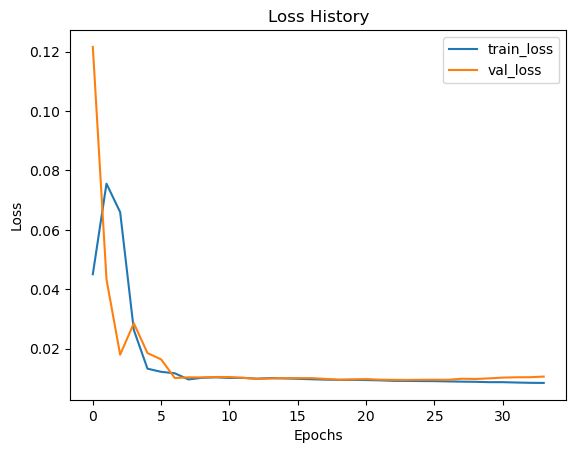

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

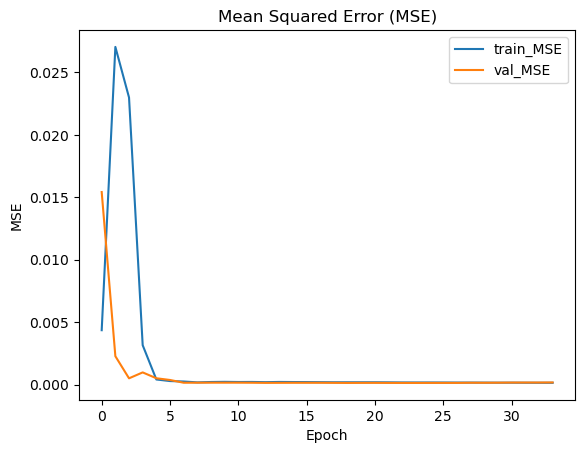

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

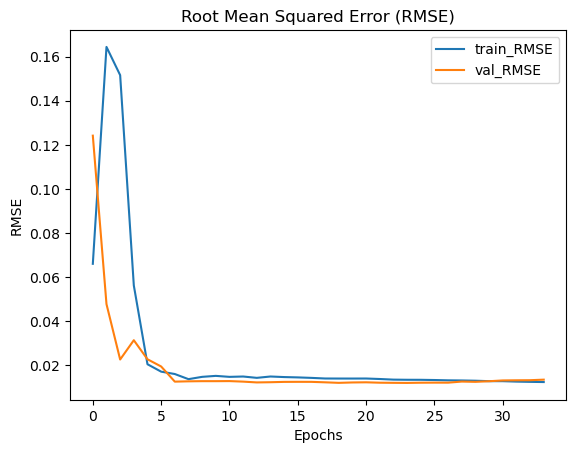

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

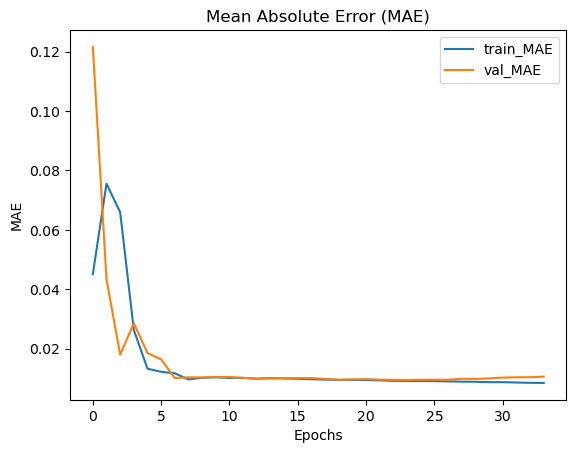

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

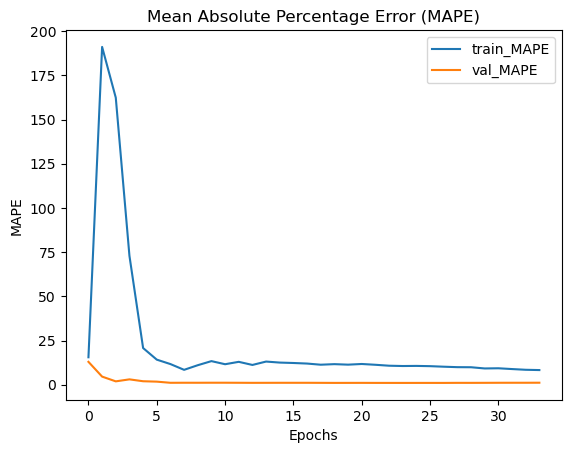

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 23:54:39.503087: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 1)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


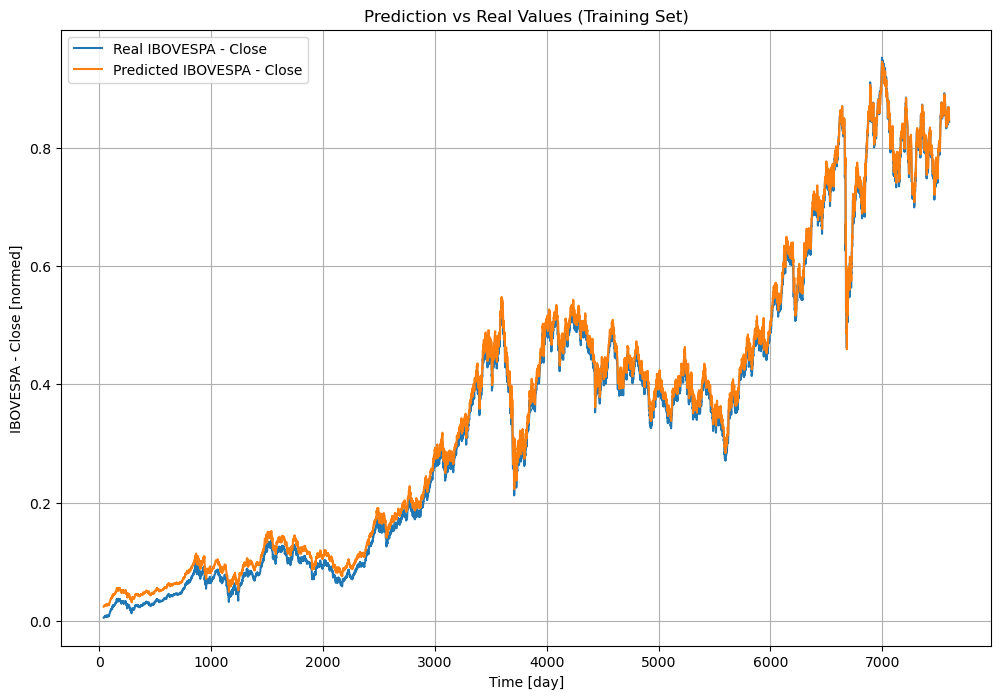

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 1)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


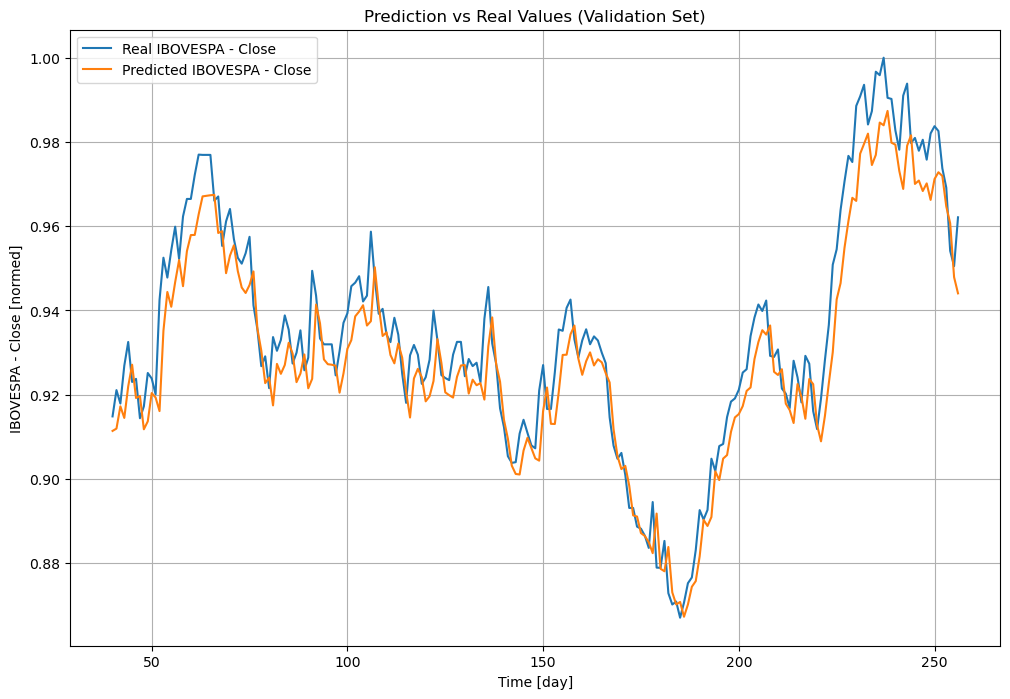

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 1)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


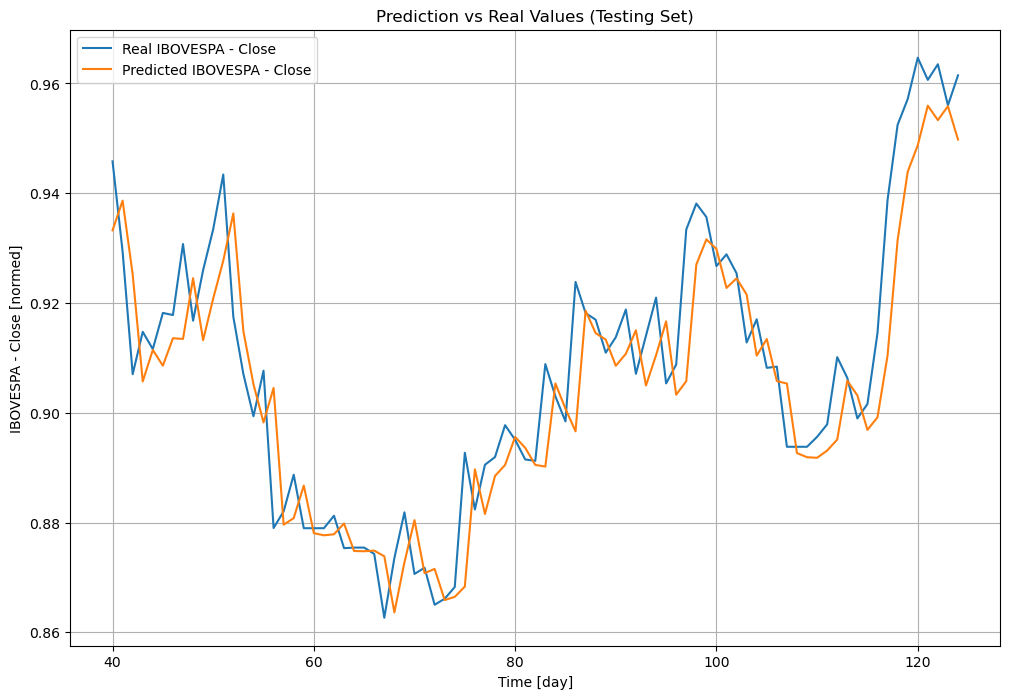

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

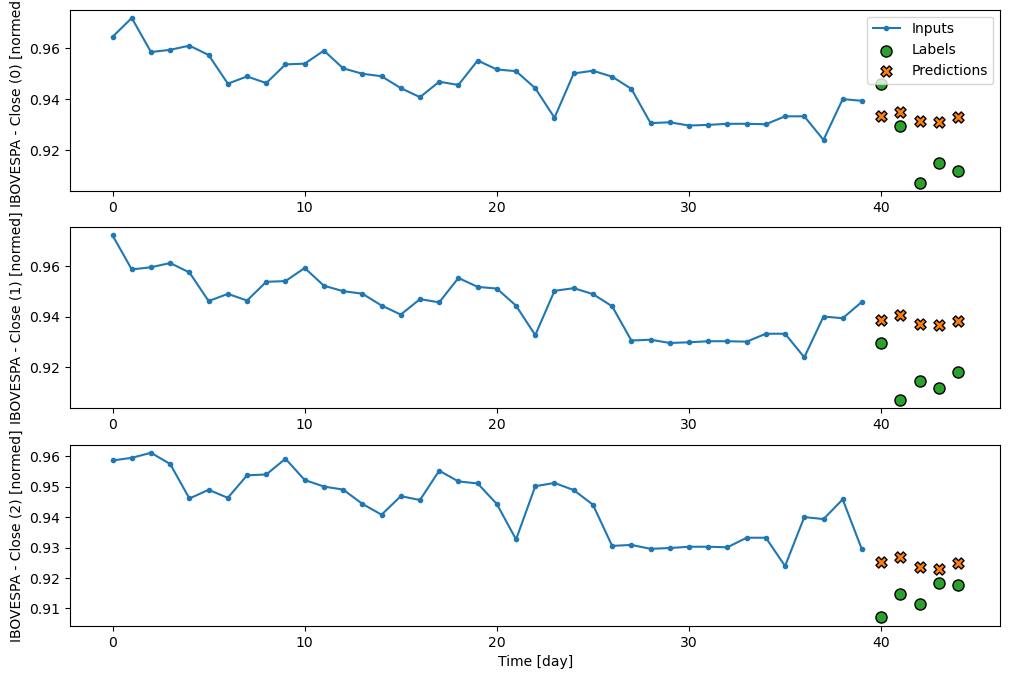

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:3s:766ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


array([[[0.9332365 , 0.9332365 , 0.9332365 , ..., 0.9332365 ,
         0.9332365 , 0.9332365 ],
        [0.93511707, 0.93511707, 0.93511707, ..., 0.93511707,
         0.93511707, 0.93511707],
        [0.93147564, 0.93147564, 0.93147564, ..., 0.93147564,
         0.93147564, 0.93147564],
        [0.9309951 , 0.9309951 , 0.9309951 , ..., 0.9309951 ,
         0.9309951 , 0.9309951 ],
        [0.93284965, 0.93284965, 0.93284965, ..., 0.93284965,
         0.9328495 , 0.9328495 ]],

       [[0.9386462 , 0.9386462 , 0.9386462 , ..., 0.9386462 ,
         0.9386462 , 0.9386462 ],
        [0.9406414 , 0.9406414 , 0.9406414 , ..., 0.9406414 ,
         0.9406414 , 0.9406414 ],
        [0.9369439 , 0.9369439 , 0.9369439 , ..., 0.9369439 ,
         0.9369439 , 0.9369439 ],
        [0.9364908 , 0.9364908 , 0.9364908 , ..., 0.9364908 ,
         0.9364908 , 0.9364908 ],
        [0.9381752 , 0.9381752 , 0.9381752 , ..., 0.9381752 ,
         0.9381751 , 0.9381751 ]],

       [[0.92522454, 0.92522454, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')